In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('HomeC.csv')
df.shape
df.columns
df.head()

/tmp/ipython-input-2504043486.py:4: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('HomeC.csv')


time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633     0.124150   
1        0.020717        0.063817          0.444067     0.124000   
2        0.020700        0.062317          0.446067     0.123533   
3        0.106900        0.068517          0.446583     0.123133   
4        0.236933        0.063983          0.446533     0.122850   

   Wine cellar [kW]  ...  visibility  summary  apparentTemperature  pressure  \
0          0.006983  ...        10.0    Clear                29.26   1016.91   
1          0.006983  ...        10.0    Clear                29.26   1016.91   
2          0.006983  ...        10.0    Clear                29.26   1016.91   
3          0.006983  ...        10.0    Clear                29.26   1016.91   
4          0.006850  ...        10.0    Clear                29.26   1016.91   

   windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  \
0       9.18  cloudCover        282.0              0.0      24.4   
1       9.18  cloudCover        282.0              0.0      24.4   
2       9.18  cloudCover        282.0              0.0      24.4   
3       9.18  cloudCover        282.0              0.0      24.4   
4       9.18  cloudCover        282.0              0.0      24.4   

   precipProbability  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 32 columns]

In [ ]:
df.isnull().sum()

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

In [ ]:
# Rename columns to remove spaces and the kW unit
df.columns = [col[:-5].replace(' ','_') if 'kW' in col else col for col in df.columns]

# Drop rows with nan values
df = df.dropna()

# The columns "use" and "house_overall" are the same, so let's remove the 'house_overall' column
df.drop(['House_overall'], axis=1, inplace=True)

# The columns "gen" and "solar" are the same, so let's remove the 'solar' column
df.drop(['Solar'], axis=1, inplace=True)

# drop rows with cloudCover column values that are not numeric (bug in sensors) and convert column to numeric
df = df[df['cloudCover']!='cloudCover']
df["cloudCover"] = pd.to_numeric(df["cloudCover"])

# Create columns that regroup kitchens and furnaces
df['kitchen'] = df['Kitchen_12'] + df['Kitchen_14'] + df['Kitchen_38']
df['Furnace'] = df['Furnace_1'] + df['Furnace_2']

# Convert "time" column (which is a unix timestamp) to a Y-m-d H-M-S
import time
start_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(df['time'].iloc[0])))
time_index = pd.date_range(start_time, periods=len(df), freq='min')
time_index = pd.DatetimeIndex(time_index)
df = df.set_index(time_index)
df = df.drop(['time'], axis=1)

In [ ]:
df.dtypes

use                    float64
gen                    float64
Dishwasher             float64
Furnace_1              float64
Furnace_2              float64
Home_office            float64
Fridge                 float64
Wine_cellar            float64
Garage_door            float64
Kitchen_12             float64
Kitchen_14             float64
Kitchen_38             float64
Barn                   float64
Well                   float64
Microwave              float64
Living_room            float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover             float64
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
kitchen                float64
Furnace                float64
dtype: object

In [ ]:
df.columns

Index(['use', 'gen', 'Dishwasher', 'Furnace_1', 'Furnace_2', 'Home_office',
       'Fridge', 'Wine_cellar', 'Garage_door', 'Kitchen_12', 'Kitchen_14',
       'Kitchen_38', 'Barn', 'Well', 'Microwave', 'Living_room', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability', 'kitchen', 'Furnace'],
      dtype='object')

In [ ]:
# lower frist letter of a string
func = lambda s: s[:1].lower() + s[1:] if s else ''

In [ ]:
cols = list(df.dtypes.keys())
categ_cols = [col for col in cols if df[col].dtype=='O']
num_cols = [col for col in cols if col not in categ_cols]
print('categ_cols : ', categ_cols)
print('num_cols : ', num_cols)

categ_cols :  ['icon', 'summary']
num_cols :  ['use', 'gen', 'Dishwasher', 'Furnace_1', 'Furnace_2', 'Home_office', 'Fridge', 'Wine_cellar', 'Garage_door', 'Kitchen_12', 'Kitchen_14', 'Kitchen_38', 'Barn', 'Well', 'Microwave', 'Living_room', 'temperature', 'humidity', 'visibility', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability', 'kitchen', 'Furnace']


In [ ]:
def plot_bars(col):

    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure

    figure(figsize=(14, 8), dpi=80)
    plt.xticks(rotation = 90)

    D = df[col].value_counts(normalize=True).to_dict()

    plt.bar(*zip(*D.items()))
    plt.show()

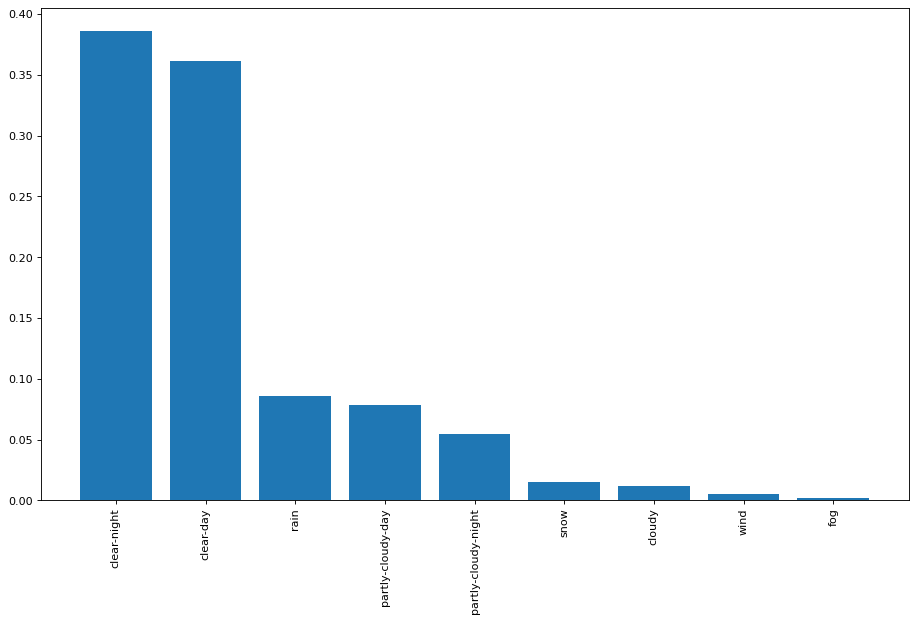

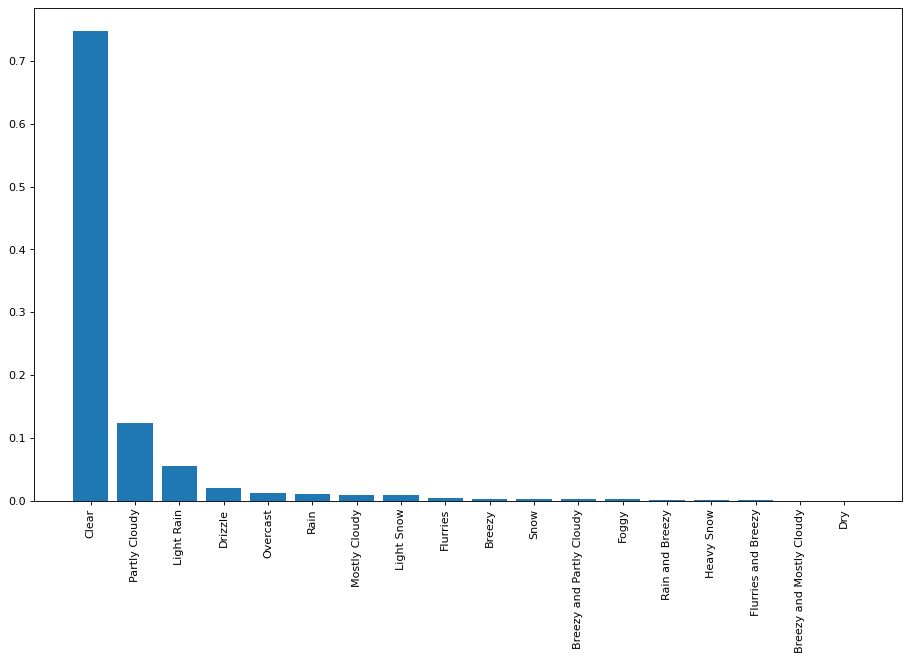

In [ ]:
plot_bars('icon')
plot_bars('summary')

<Axes: >

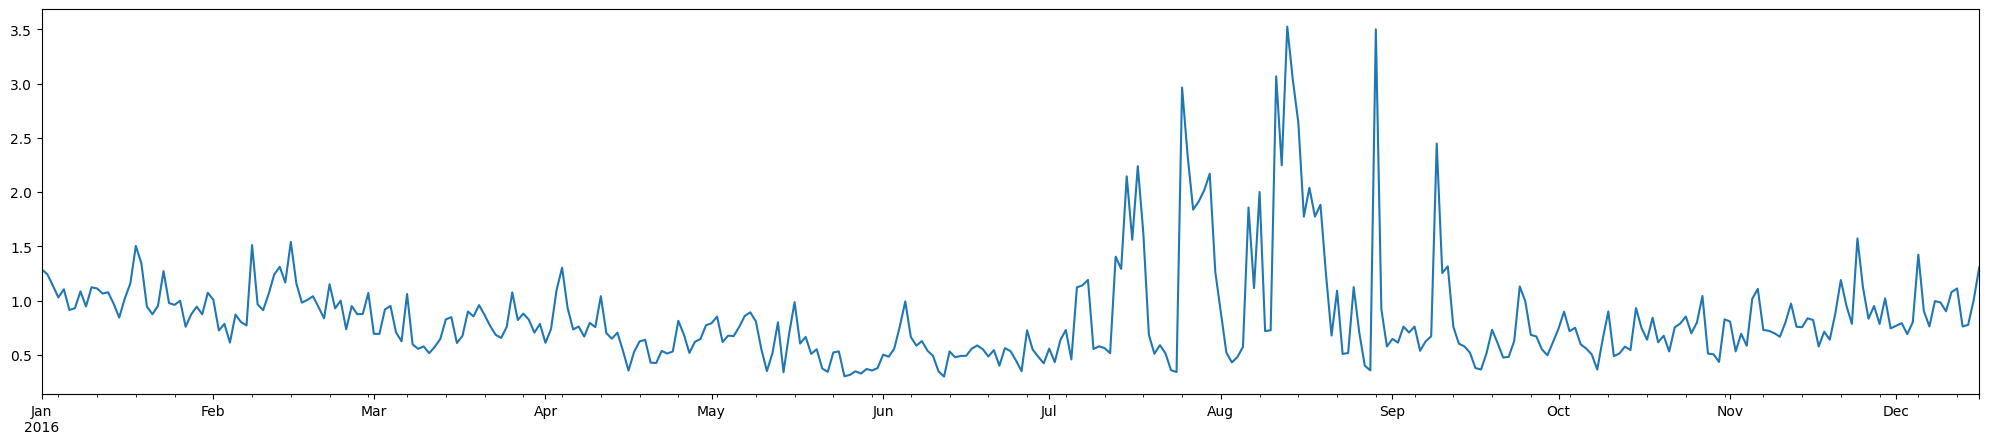

In [ ]:
df['use'].resample(rule='D').mean().plot(figsize=(25,5))

<Axes: >

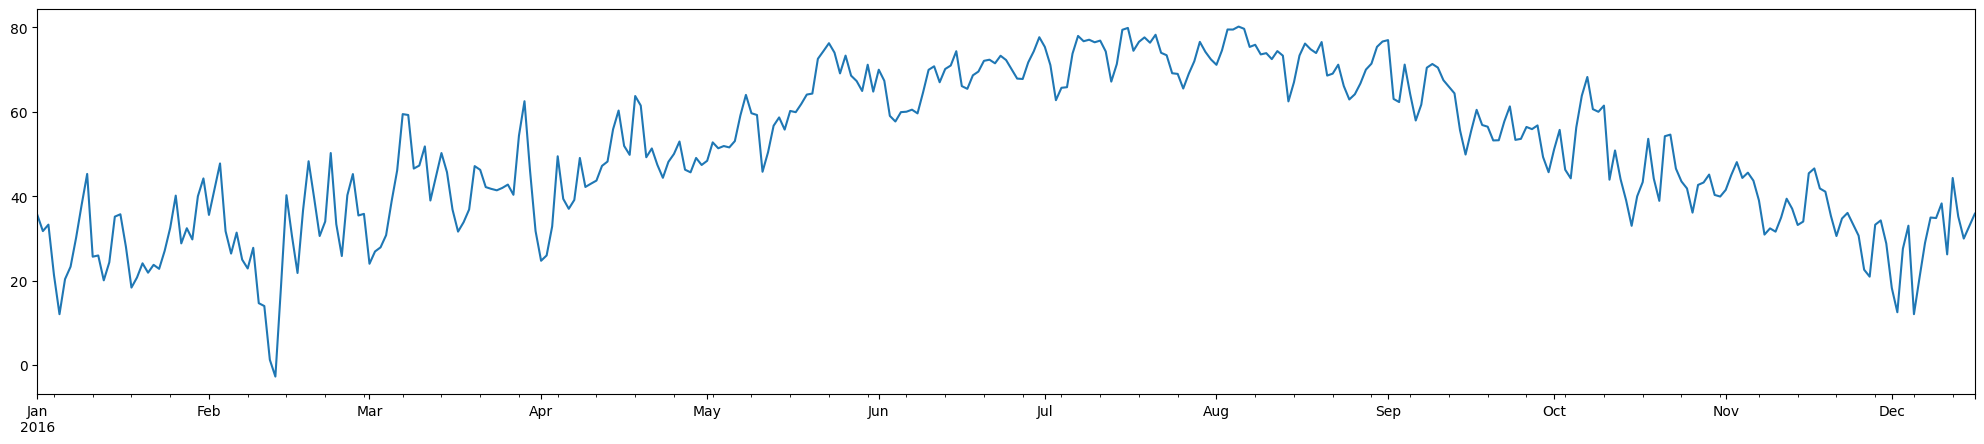

In [ ]:
df['temperature'].resample(rule='D').mean().plot(figsize=(25,5))

<Axes: >

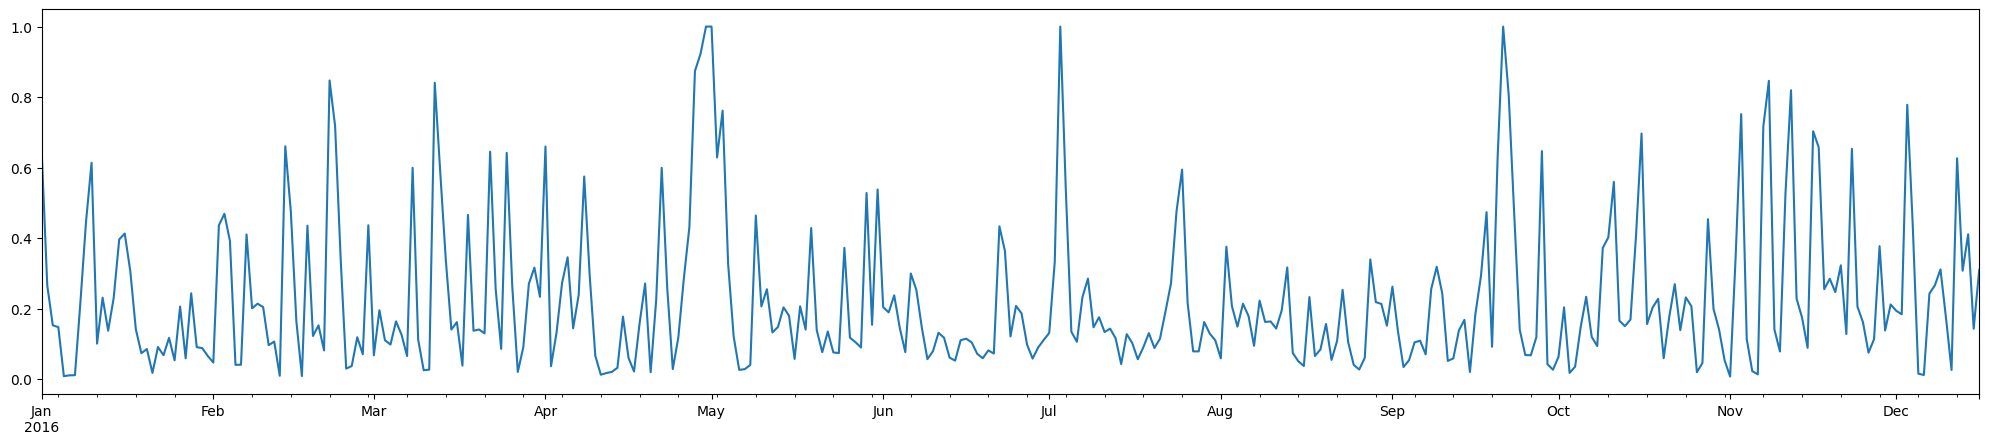

In [ ]:
df['cloudCover'].resample(rule='D').mean().plot(figsize=(25,5))

/tmp/ipython-input-812530083.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  general_energy_per_month = df[general_energy_cols].resample('M').sum() # for energy we use sum to calculate overall consumption in period


<Axes: >

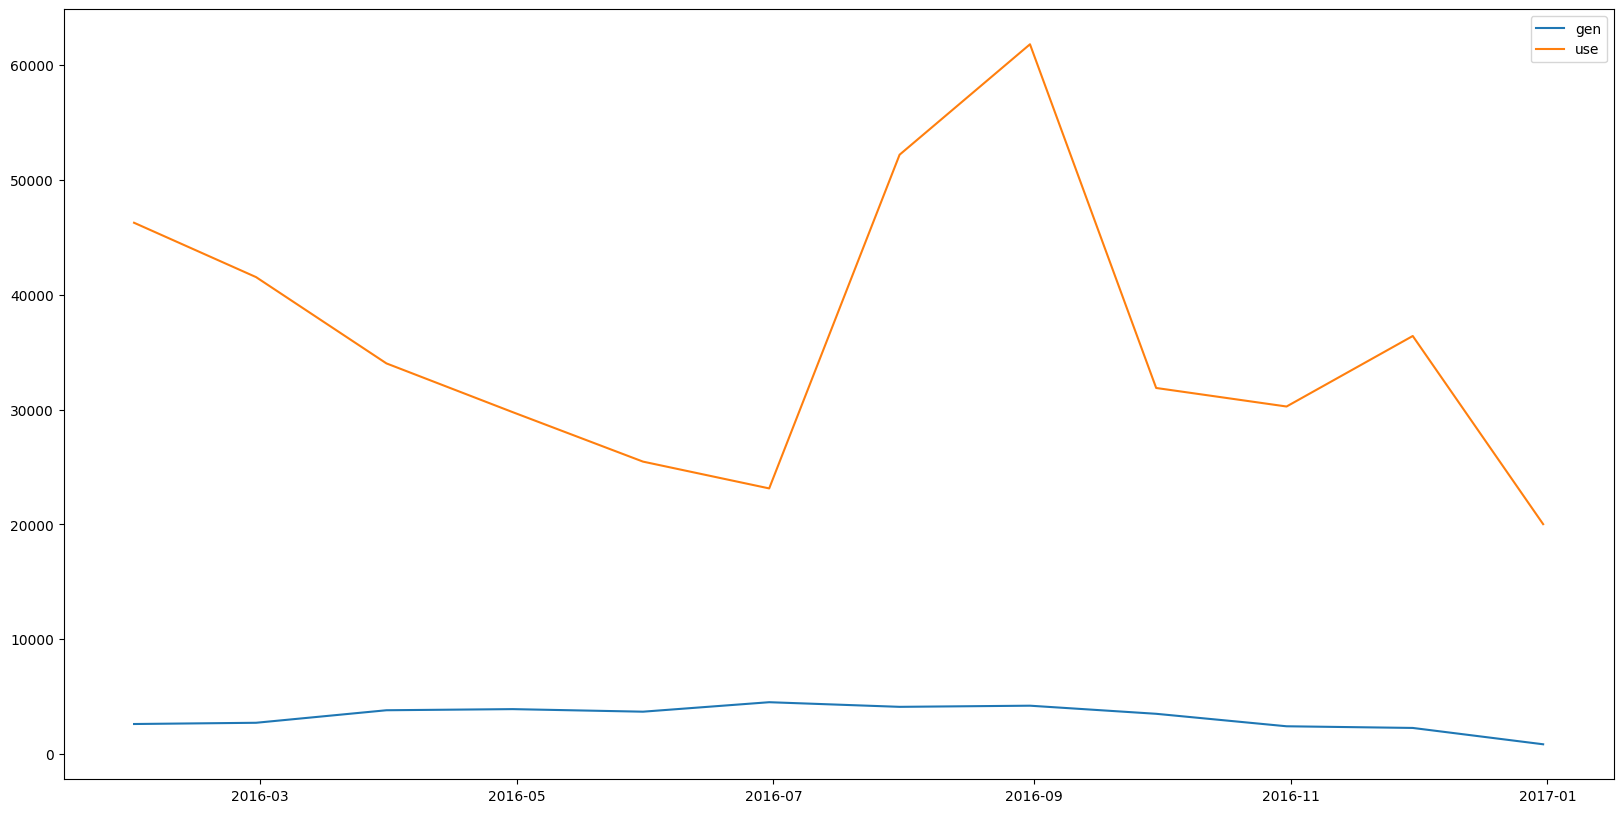

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

general_energy_cols = ['gen', 'use']
general_energy_per_month = df[general_energy_cols].resample('M').sum() # for energy we use sum to calculate overall consumption in period

plt.figure(figsize=(20,10))

sns.lineplot(data=general_energy_per_month, dashes=False)

/tmp/ipython-input-1443952543.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rooms_energy_per_month = df[rooms_energy_cols].resample('M').mean()


<Axes: >

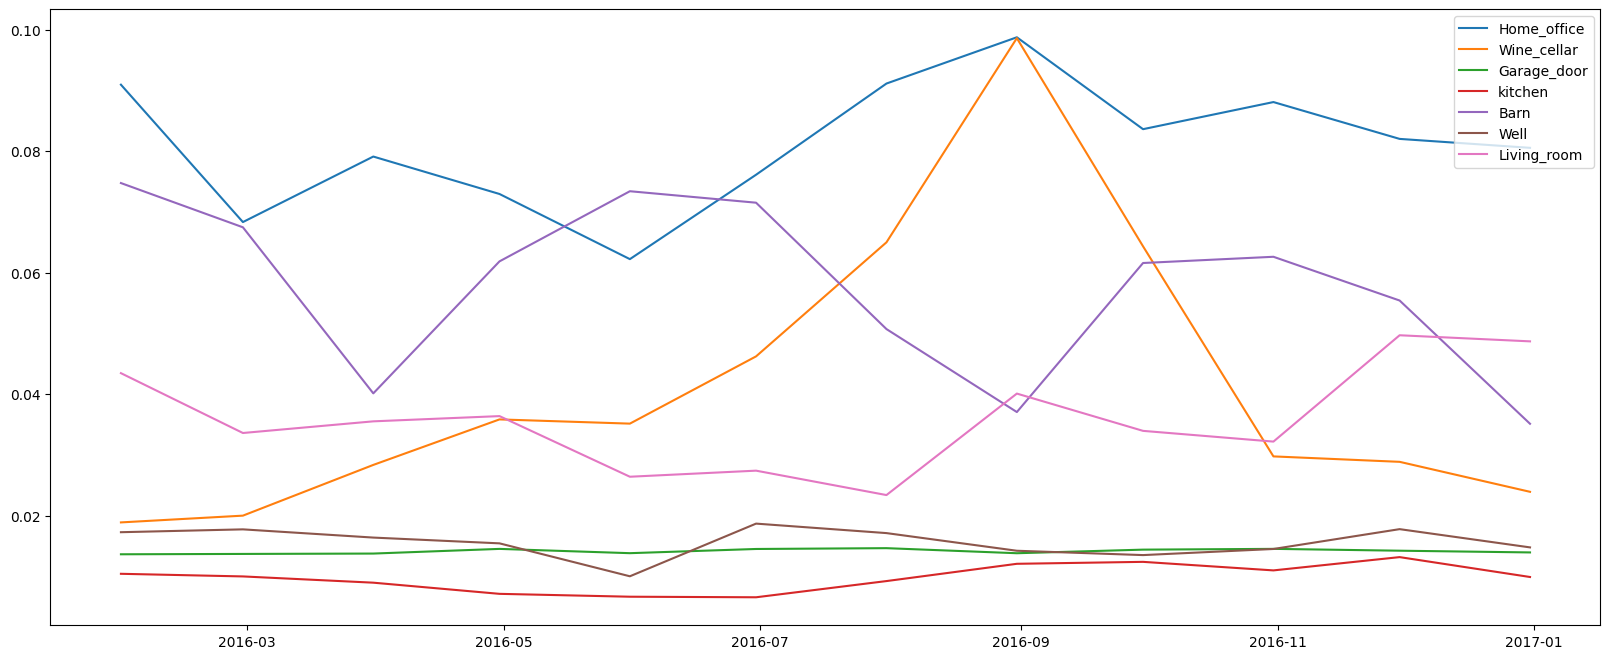

In [ ]:
rooms_energy_cols = ['Home_office', 'Wine_cellar','Garage_door',
                       'kitchen', 'Barn', 'Well','Living_room']

rooms_energy_per_month = df[rooms_energy_cols].resample('M').mean()

plt.figure(figsize=(20,8))

sns.lineplot(data=rooms_energy_per_month, dashes=False)

/tmp/ipython-input-488825149.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  equipements_energy_per_month = df[equipements_cols].resample('M').mean()


<Axes: >

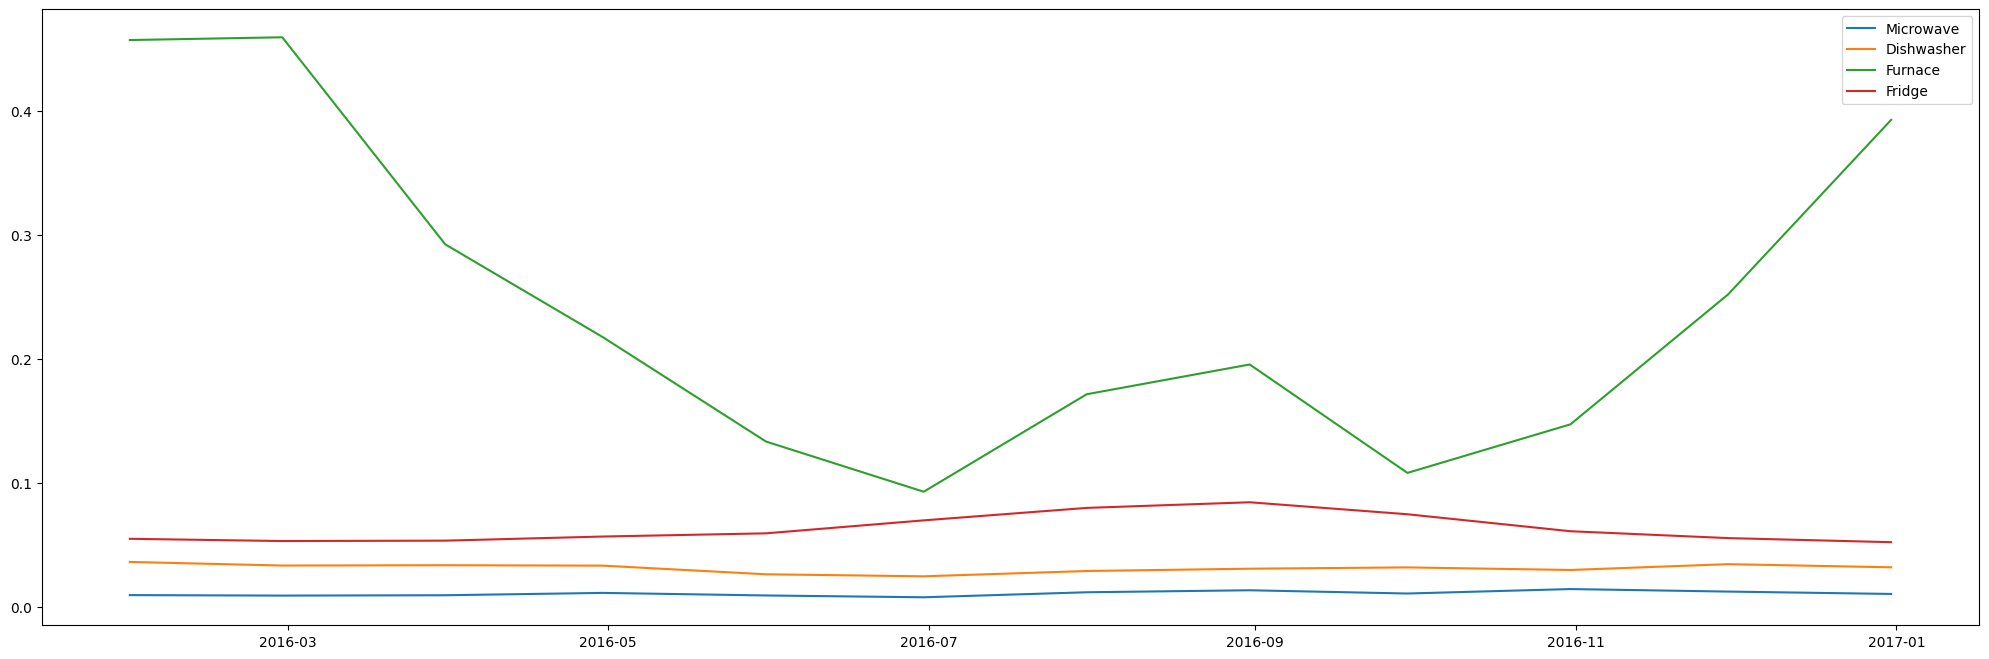

In [ ]:
equipements_cols = ['Microwave', 'Dishwasher', 'Furnace', 'Fridge']

equipements_energy_per_month = df[equipements_cols].resample('M').mean()

plt.figure(figsize=(25,8))

sns.lineplot(data= equipements_energy_per_month, dashes=False)

/tmp/ipython-input-277222498.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  weather_per_month = df[weather_columns].resample('M').mean()


<Axes: >

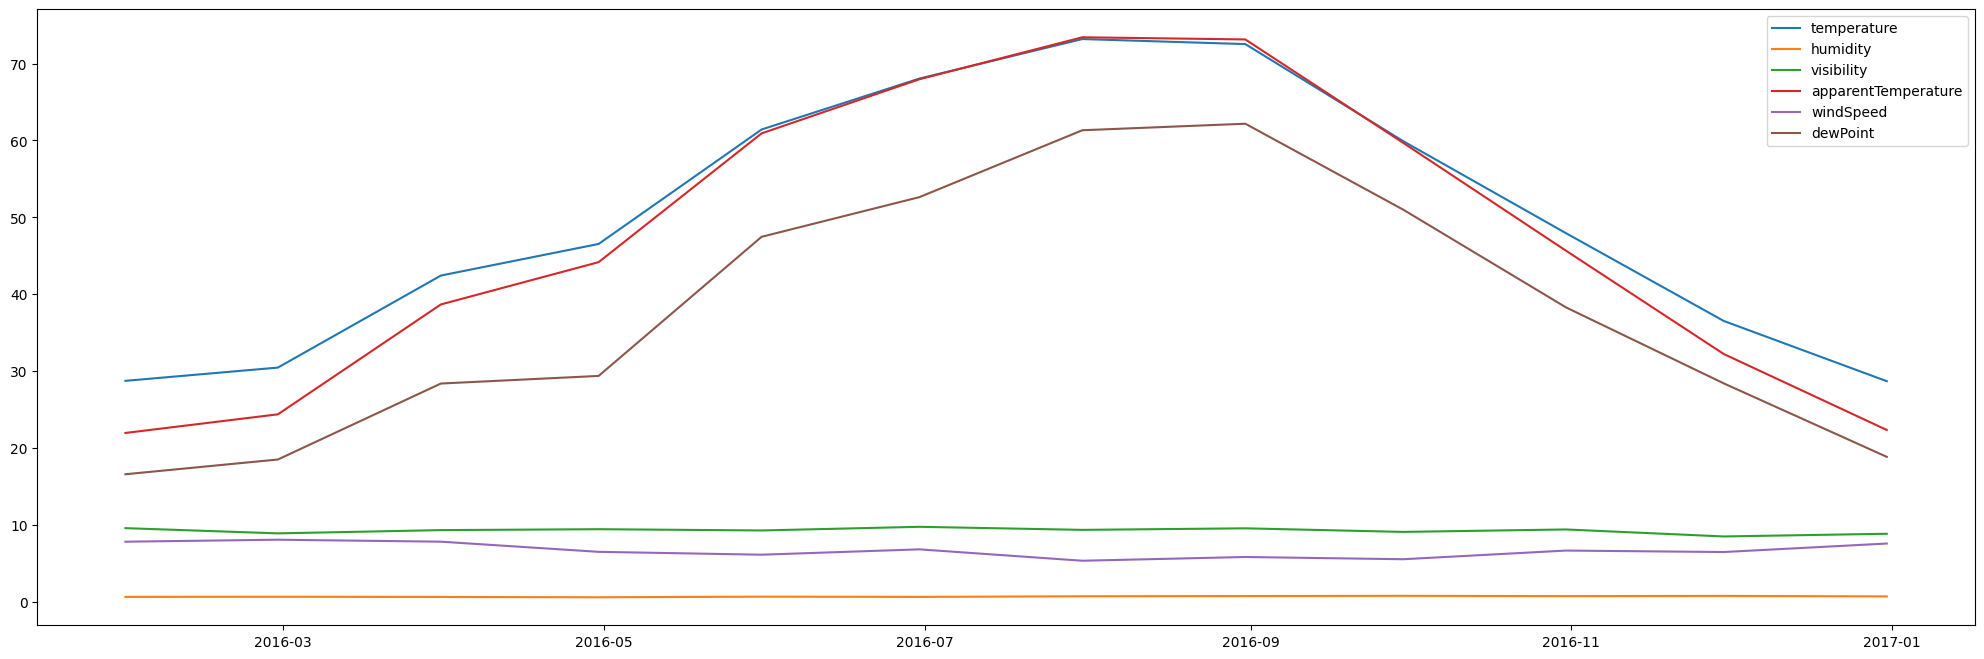

In [ ]:
weather_columns = ['temperature','humidity', 'visibility', 'apparentTemperature',
                   'windSpeed', 'dewPoint']

weather_per_month = df[weather_columns].resample('M').mean()

plt.figure(figsize=(25,8))

sns.lineplot(data=weather_per_month, dashes=False)

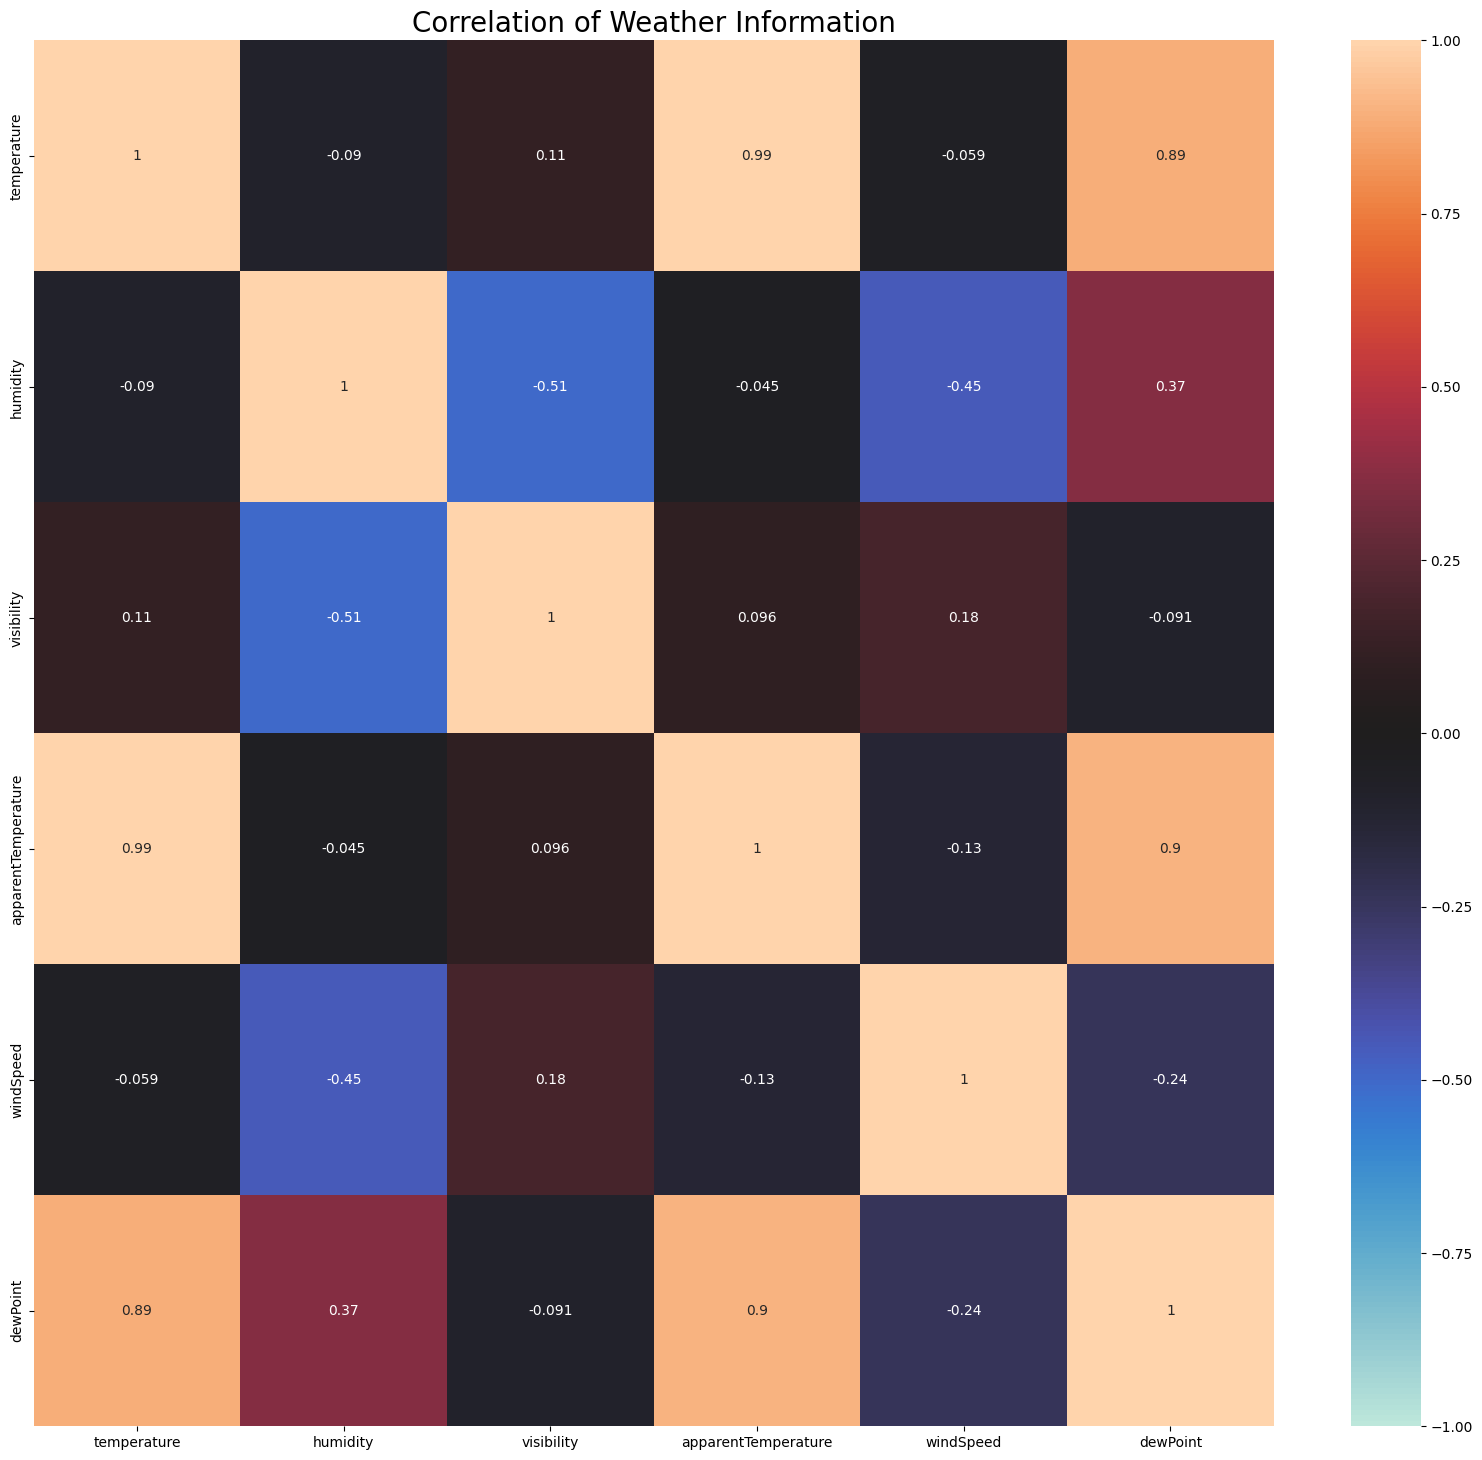

In [ ]:
fig,ax = plt.subplots(figsize=(20, 18))
corr = df[weather_columns].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Weather Information', size=20)
plt.show()

In [ ]:
df.drop( ['Kitchen_12','Kitchen_14','Kitchen_38','Furnace_1', 'Furnace_2'], axis=1, inplace=True)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

use       gen  Dishwasher  Home_office    Fridge  \
2016-01-01 05:00:58  0.714200  0.003417    0.000033     0.043067  0.005167   
2016-01-01 05:01:58  0.497067  0.003417    0.000017     0.043283  0.005000   
2016-01-01 05:02:58  0.465133  0.003450    0.000017     0.043250  0.005017   
2016-01-01 05:03:58  0.512933  0.003417    0.000017     0.043300  0.004967   
2016-01-01 05:04:58  0.651283  0.003417    0.000017     0.043283  0.114167   

                     Wine_cellar  Garage_door      Barn      Well  Microwave  \
2016-01-01 05:00:58     0.123317     0.013183  0.031750  0.001000   0.004233   
2016-01-01 05:01:58     0.123283     0.012883  0.031783  0.001017   0.004233   
2016-01-01 05:02:58     0.123350     0.012950  0.031800  0.001000   0.004233   
2016-01-01 05:03:58     0.123867     0.012883  0.031817  0.001017   0.004233   
2016-01-01 05:04:58     0.124267     0.012917  0.031800  0.001000   0.004233   

                     Living_room  temperature                 icon  humidity  \
2016-01-01 05:00:58     0.001633        35.87  partly-cloudy-night      0.61   
2016-01-01 05:01:58     0.001700        35.87  partly-cloudy-night      0.61   
2016-01-01 05:02:58     0.001633        35.87  partly-cloudy-night      0.61   
2016-01-01 05:03:58     0.001683        35.87  partly-cloudy-night      0.61   
2016-01-01 05:04:58     0.001667        35.87  partly-cloudy-night      0.61   

                     visibility        summary  apparentTemperature  pressure  \
2016-01-01 05:00:58        10.0  Mostly Cloudy                 29.4   1016.25   
2016-01-01 05:01:58        10.0  Mostly Cloudy                 29.4   1016.25   
2016-01-01 05:02:58        10.0  Mostly Cloudy                 29.4   1016.25   
2016-01-01 05:03:58        10.0  Mostly Cloudy                 29.4   1016.25   
2016-01-01 05:04:58        10.0  Mostly Cloudy                 29.4   1016.25   

                     windSpeed  cloudCover  windBearing  precipIntensity  \
2016-01-01 05:00:58       8.29        0.75        285.0              0.0   
2016-01-01 05:01:58       8.29        0.75        285.0              0.0   
2016-01-01 05:02:58       8.29        0.75        285.0              0.0   
2016-01-01 05:03:58       8.29        0.75        285.0              0.0   
2016-01-01 05:04:58       8.29        0.75        285.0              0.0   

                     dewPoint  precipProbability   kitchen   Furnace  
2016-01-01 05:00:58      23.9                0.0  0.000733  0.331067  
2016-01-01 05:01:58      23.9                0.0  0.000833  0.159850  
2016-01-01 05:02:58      23.9                0.0  0.000817  0.127133  
2016-01-01 05:03:58      23.9                0.0  0.000833  0.175217  
2016-01-01 05:04:58      23.9                0.0  0.000500  0.177783

In [ ]:
# Detect duplicated rows (entire row is same)
duplicates = df[df.duplicated(keep=False)]

print("Total duplicated rows (including original copies):", duplicates.shape[0])
print("\nDuplicated rows:\n")
print(duplicates)

Total duplicated rows (including original copies): 187

Duplicated rows:

                          use       gen  Dishwasher  Home_office    Fridge  \
2016-01-19 06:08:58  0.306450  0.001183    0.000050     0.015333  0.002083   
2016-01-19 06:09:58  0.306450  0.001183    0.000050     0.015333  0.002083   
2016-01-19 19:22:58  0.027533  0.007767    0.000000     0.003650  0.000133   
2016-01-19 19:23:58  0.027533  0.007767    0.000000     0.003650  0.000133   
2016-01-19 19:24:58  0.027533  0.007767    0.000000     0.003650  0.000133   
...                       ...       ...         ...          ...       ...   
2016-10-28 00:54:58  0.090900  0.001117    0.000050     0.008300  0.027900   
2016-10-28 00:55:58  0.090900  0.001117    0.000050     0.008300  0.027900   
2016-10-28 00:56:58  0.090900  0.001117    0.000050     0.008300  0.027900   
2016-11-20 07:08:58  0.061200  0.000500    0.000033     0.005767  0.001817   
2016-11-20 07:09:58  0.061200  0.000500    0.000033     0.005767  0.

In [ ]:
df = df.drop_duplicates()
df.shape

(503681, 26)

In [ ]:
print("Unique values in 'icon':", df['icon'].unique())
print("Unique values in 'summary':", df['summary'].unique())

Unique values in 'icon': ['partly-cloudy-night' 'clear-night' 'clear-day' 'cloudy'
 'partly-cloudy-day' 'rain' 'snow' 'wind' 'fog']
Unique values in 'summary': ['Mostly Cloudy' 'Clear' 'Overcast' 'Partly Cloudy' 'Drizzle' 'Light Rain'
 'Rain' 'Light Snow' 'Flurries' 'Breezy' 'Snow' 'Rain and Breezy' 'Foggy'
 'Breezy and Mostly Cloudy' 'Breezy and Partly Cloudy'
 'Flurries and Breezy' 'Dry' 'Heavy Snow']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the 'icon' and 'summary' columns
df[['icon', 'summary']] = encoder.fit_transform(df[['icon', 'summary']])

# Display the first few rows to verify the encoding
display(df.head())

use       gen  Dishwasher  Home_office    Fridge  \
2016-01-01 05:00:58  0.714200  0.003417    0.000033     0.043067  0.005167   
2016-01-01 05:01:58  0.497067  0.003417    0.000017     0.043283  0.005000   
2016-01-01 05:02:58  0.465133  0.003450    0.000017     0.043250  0.005017   
2016-01-01 05:03:58  0.512933  0.003417    0.000017     0.043300  0.004967   
2016-01-01 05:04:58  0.651283  0.003417    0.000017     0.043283  0.114167   

                     Wine_cellar  Garage_door      Barn      Well  Microwave  \
2016-01-01 05:00:58     0.123317     0.013183  0.031750  0.001000   0.004233   
2016-01-01 05:01:58     0.123283     0.012883  0.031783  0.001017   0.004233   
2016-01-01 05:02:58     0.123350     0.012950  0.031800  0.001000   0.004233   
2016-01-01 05:03:58     0.123867     0.012883  0.031817  0.001017   0.004233   
2016-01-01 05:04:58     0.124267     0.012917  0.031800  0.001000   0.004233   

                     Living_room  temperature  icon  humidity  visibility  \
2016-01-01 05:00:58     0.001633        35.87   5.0      0.61        10.0   
2016-01-01 05:01:58     0.001700        35.87   5.0      0.61        10.0   
2016-01-01 05:02:58     0.001633        35.87   5.0      0.61        10.0   
2016-01-01 05:03:58     0.001683        35.87   5.0      0.61        10.0   
2016-01-01 05:04:58     0.001667        35.87   5.0      0.61        10.0   

                     summary  apparentTemperature  pressure  windSpeed  \
2016-01-01 05:00:58     12.0                 29.4   1016.25       8.29   
2016-01-01 05:01:58     12.0                 29.4   1016.25       8.29   
2016-01-01 05:02:58     12.0                 29.4   1016.25       8.29   
2016-01-01 05:03:58     12.0                 29.4   1016.25       8.29   
2016-01-01 05:04:58     12.0                 29.4   1016.25       8.29   

                     cloudCover  windBearing  precipIntensity  dewPoint  \
2016-01-01 05:00:58        0.75        285.0              0.0      23.9   
2016-01-01 05:01:58        0.75        285.0              0.0      23.9   
2016-01-01 05:02:58        0.75        285.0              0.0      23.9   
2016-01-01 05:03:58        0.75        285.0              0.0      23.9   
2016-01-01 05:04:58        0.75        285.0              0.0      23.9   

                     precipProbability   kitchen   Furnace  
2016-01-01 05:00:58                0.0  0.000733  0.331067  
2016-01-01 05:01:58                0.0  0.000833  0.159850  
2016-01-01 05:02:58                0.0  0.000817  0.127133  
2016-01-01 05:03:58                0.0  0.000833  0.175217  
2016-01-01 05:04:58                0.0  0.000500  0.177783

In [ ]:
df.describe(include='all')

use            gen     Dishwasher    Home_office  \
count  503681.000000  503681.000000  503681.000000  503681.000000   
mean        0.859227       0.076263       0.031381       0.081295   
std         1.058320       0.128447       0.190994       0.104453   
min         0.000000       0.000000       0.000000       0.000083   
25%         0.367867       0.003367       0.000000       0.040383   
50%         0.562450       0.004300       0.000017       0.042217   
75%         0.970383       0.084017       0.000233       0.068283   
max        14.714567       0.613883       1.401767       0.971750   

              Fridge    Wine_cellar    Garage_door           Barn  \
count  503681.000000  503681.000000  503681.000000  503681.000000   
mean        0.063580       0.042149       0.014144       0.058551   
std         0.076205       0.057972       0.014293       0.202749   
min         0.000067       0.000017       0.000017       0.000000   
25%         0.005083       0.007133       0.012733       0.029833   
50%         0.005433       0.008083       0.012933       0.031317   
75%         0.125433       0.053417       0.013100       0.032883   
max         0.851267       1.273933       1.088983       7.027900   

                Well      Microwave    Living_room    temperature  \
count  503681.000000  503681.000000  503681.000000  503681.000000   
mean        0.015649       0.010985       0.035329      50.744208   
std         0.137872       0.098870       0.096075      19.116220   
min         0.000000       0.000000       0.000000     -12.640000   
25%         0.000983       0.003617       0.001483      35.770000   
50%         0.001000       0.004000       0.001617      50.330000   
75%         0.001017       0.004067       0.001750      66.280000   
max         1.633017       1.929800       0.465217      93.720000   

                icon       humidity     visibility        summary  \
count  503681.000000  503681.000000  503681.000000  503681.000000   
mean        1.661053       0.664059       9.253130       5.202195   
std         2.110584       0.194412       1.611481       4.169295   
min         0.000000       0.130000       0.270000       0.000000   
25%         0.000000       0.510000       9.420000       3.000000   
50%         1.000000       0.680000      10.000000       3.000000   
75%         2.000000       0.840000      10.000000       3.000000   
max         8.000000       0.980000      10.000000      17.000000   

       apparentTemperature      pressure      windSpeed     cloudCover  \
count        503681.000000  503681.00000  503681.000000  503681.000000   
mean             48.265740    1016.30004       6.650884       0.225934   
std              22.030305       7.89645       3.982670       0.289942   
min             -32.080000     986.40000       0.000000       0.000000   
25%              31.090000    1011.29000       3.660000       0.040000   
50%              50.330000    1016.53000       5.930000       0.120000   
75%              66.280000    1021.48000       8.940000       0.290000   
max             101.120000    1042.46000      22.910000       1.000000   

         windBearing  precipIntensity       dewPoint  precipProbability  \
count  503681.000000    503681.000000  503681.000000      503681.000000   
mean      202.331537         0.002599      38.694770           0.056479   
std       106.531556         0.011259      19.090269           0.165870   
min         0.000000         0.000000     -27.240000           0.000000   
25%       148.000000         0.000000      24.600000           0.000000   
50%       208.000000         0.000000      39.030000           0.000000   
75%       295.000000         0.000000      54.790000           0.000000   
max       359.000000         0.191000      75.490000           0.840000   

             kitchen        Furnace  
count  503681.000000  503681.000000  
mean        0.009792       0.236049  
std         0.079900       0.273888  
min         0.000000       0.00030

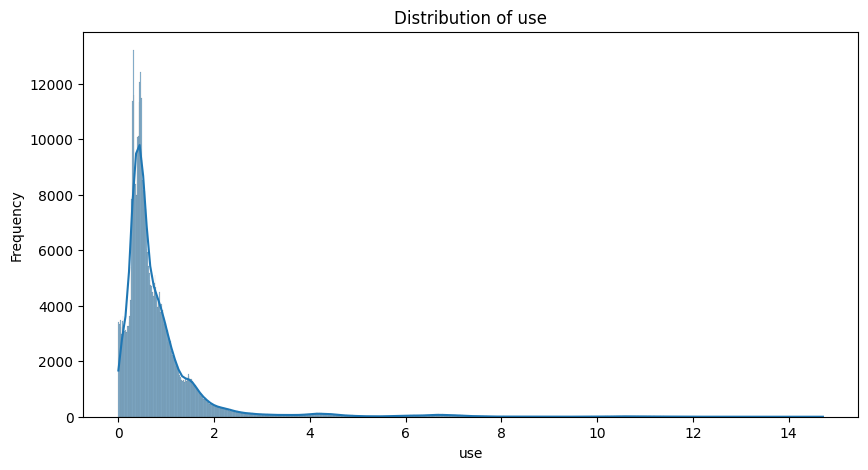

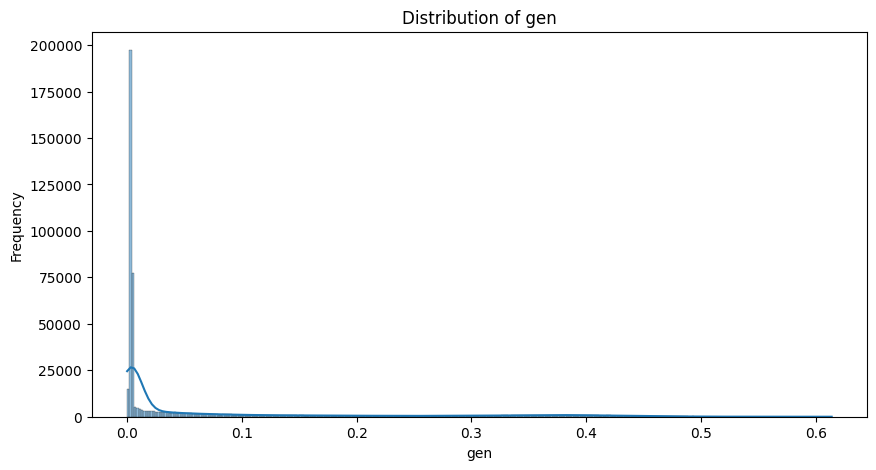

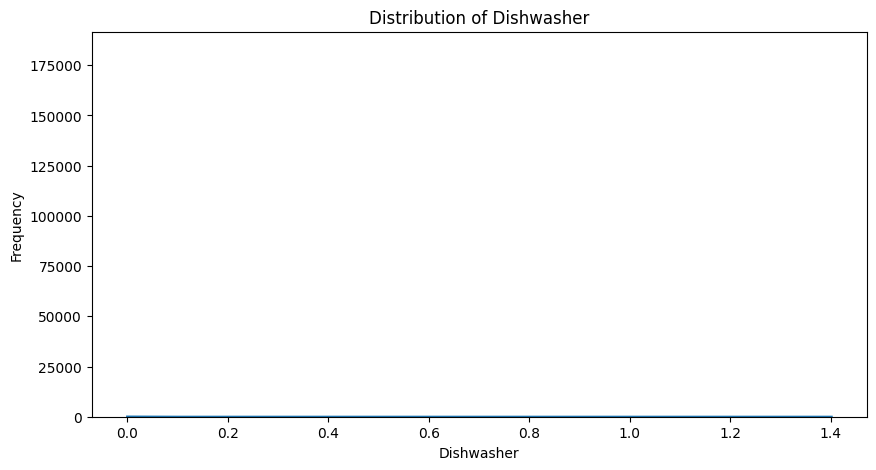

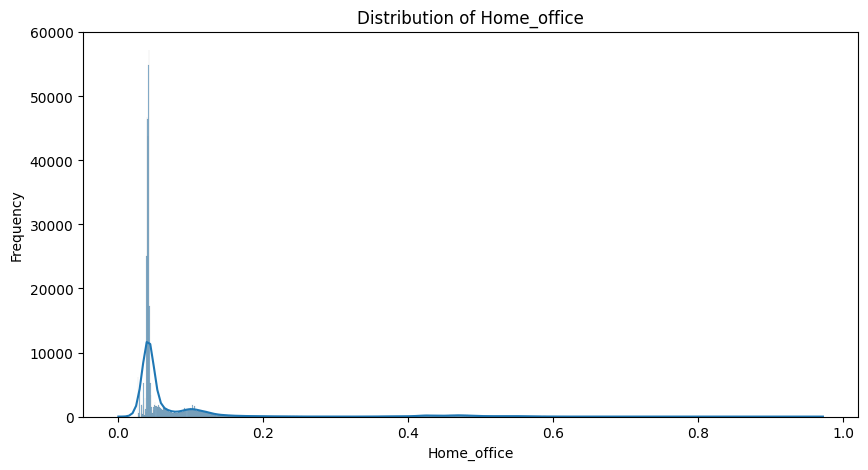

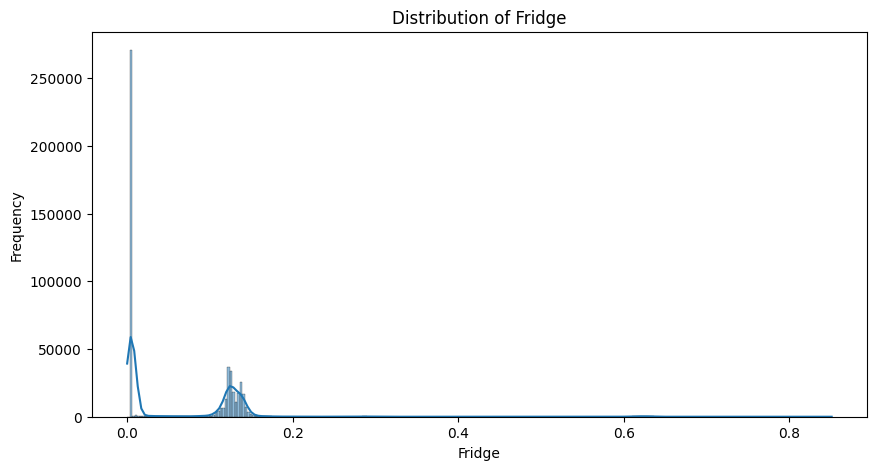

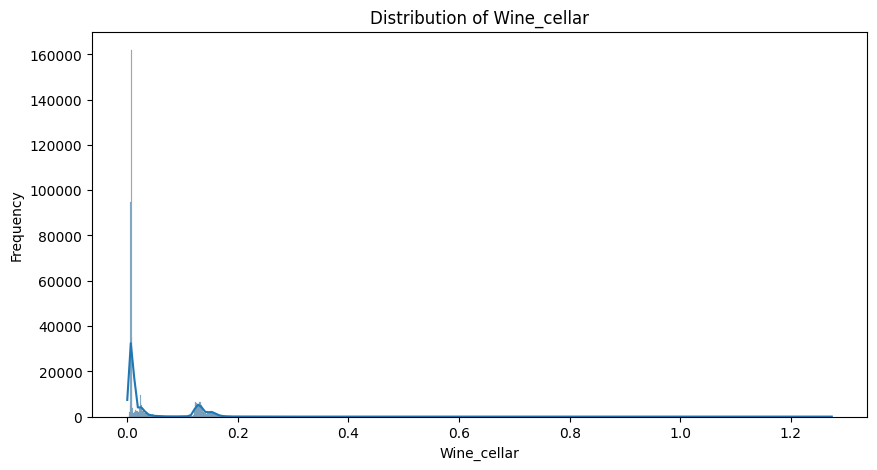

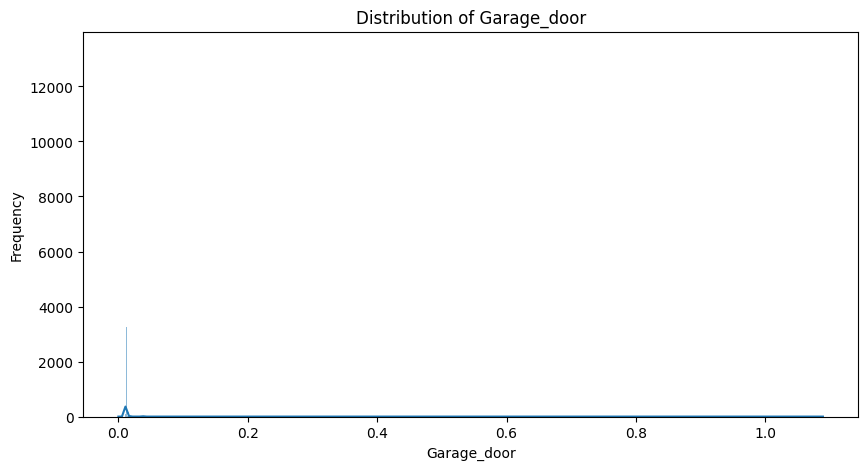

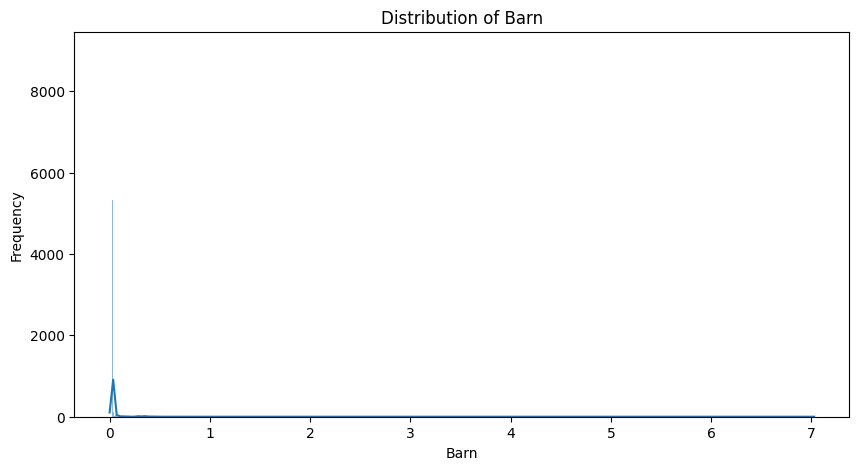

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions for numerical columns
for col in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
df.columns

Index(['use', 'gen', 'Dishwasher', 'Home_office', 'Fridge', 'Wine_cellar',
       'Garage_door', 'Barn', 'Well', 'Microwave', 'Living_room',
       'temperature', 'icon', 'humidity', 'visibility', 'summary',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'kitchen', 'Furnace'],
      dtype='object')

In [ ]:
columns = ['use', 'gen', 'Dishwasher', 'Home_office', 'Fridge', 'Wine_cellar',
           'Garage_door', 'Barn', 'Well', 'Microwave', 'Living_room',
           'temperature', 'icon', 'humidity', 'visibility', 'summary',
           'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
           'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
           'kitchen', 'Furnace']

# ---------- Functions ----------

# Pearson’s Second Coefficient of Skewness (Mean-Median Method)
def pearson_skew(series):
    mean = np.mean(series)
    median = np.median(series)
    std = np.std(series)
    if std == 0:
        return np.nan
    return (3 * (mean - median)) / std

# Interquartile Range (IQR) Outlier Detection
def iqr_outliers(series):
    Q1 = np.percentile(series, 25)
    Q3 = np.percentile(series, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# ---------- Loop through columns ----------
results = []

for col in columns:
    if pd.api.types.is_numeric_dtype(df[col]):  # Only numeric columns
        skew = pearson_skew(df[col].dropna())
        out_count, low, high = iqr_outliers(df[col].dropna())
        results.append({
            'Column': col,
            'Pearson_Skewness': round(skew, 3),
            'Outlier_Count': out_count,
            'Lower_Bound': round(low, 3),
            'Upper_Bound': round(high, 3)
        })

# Convert to DataFrame for better readability
outlier_summary = pd.DataFrame(results)
print(outlier_summary)


                 Column  Pearson_Skewness  Outlier_Count  Lower_Bound  \
0                   use             0.841          34210       -0.536   
1                   gen             1.681          81031       -0.118   
2            Dishwasher             0.493          29534       -0.000   
3           Home_office             1.122          68845       -0.001   
4                Fridge             2.289           3206       -0.175   
5           Wine_cellar             1.763         110339       -0.062   
6           Garage_door             0.254          43966        0.012   
7                  Barn             0.403          51617        0.025   
8                  Well             0.319          76896        0.001   
9             Microwave             0.212           9215        0.003   
10          Living_room             1.053         101049        0.001   
11          temperature             0.065            406       -9.995   
12                 icon             0.940          

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

standard_cols = ['use', 'Living_room', 'temperature', 'apparentTemperature', 'pressure', 'windSpeed', 'dewPoint']
robust_cols = ['gen', 'Wine_cellar', 'Microwave', 'visibility', 'precipIntensity', 'Furnace']
minmax_cols = ['Dishwasher', 'Home_office', 'Fridge', 'Garage_door', 'Barn', 'Well', 'humidity', 'cloudCover', 'precipProbability', 'kitchen']

sc1 = StandardScaler()
sc2 = RobustScaler()
sc3 = MinMaxScaler()

df[standard_cols] = sc1.fit_transform(df[standard_cols])
df[robust_cols] = sc2.fit_transform(df[robust_cols])
df[minmax_cols] = sc3.fit_transform(df[minmax_cols])

In [ ]:
df.head()

use       gen  Dishwasher  Home_office    Fridge  \
2016-01-01 05:00:58 -0.137035 -0.010953    0.000024     0.044237  0.005992   
2016-01-01 05:01:58 -0.342203 -0.010953    0.000012     0.044460  0.005796   
2016-01-01 05:02:58 -0.372376 -0.010539    0.000012     0.044425  0.005815   
2016-01-01 05:03:58 -0.327211 -0.010953    0.000012     0.044477  0.005757   
2016-01-01 05:04:58 -0.196484 -0.010953    0.000012     0.044460  0.134046   

                     Wine_cellar  Garage_door      Barn      Well  Microwave  \
2016-01-01 05:00:58     2.489737     0.012091  0.004518  0.000612   0.518518   
2016-01-01 05:01:58     2.489017     0.011815  0.004522  0.000623   0.518518   
2016-01-01 05:02:58     2.490457     0.011877  0.004525  0.000612   0.518518   
2016-01-01 05:03:58     2.501620     0.011815  0.004527  0.000623   0.518518   
2016-01-01 05:04:58     2.510263     0.011846  0.004525  0.000612   0.518518   

                     Living_room  temperature  icon  humidity  visibility  \
2016-01-01 05:00:58    -0.350718    -0.778094   5.0  0.564706         0.0   
2016-01-01 05:01:58    -0.350024    -0.778094   5.0  0.564706         0.0   
2016-01-01 05:02:58    -0.350718    -0.778094   5.0  0.564706         0.0   
2016-01-01 05:03:58    -0.350198    -0.778094   5.0  0.564706         0.0   
2016-01-01 05:04:58    -0.350371    -0.778094   5.0  0.564706         0.0   

                     summary  apparentTemperature  pressure  windSpeed  \
2016-01-01 05:00:58     12.0            -0.856355 -0.006337   0.411563   
2016-01-01 05:01:58     12.0            -0.856355 -0.006337   0.411563   
2016-01-01 05:02:58     12.0            -0.856355 -0.006337   0.411563   
2016-01-01 05:03:58     12.0            -0.856355 -0.006337   0.411563   
2016-01-01 05:04:58     12.0            -0.856355 -0.006337   0.411563   

                     cloudCover  windBearing  precipIntensity  dewPoint  \
2016-01-01 05:00:58        0.75        285.0              0.0 -0.774991   
2016-01-01 05:01:58        0.75        285.0              0.0 -0.774991   
2016-01-01 05:02:58        0.75        285.0              0.0 -0.774991   
2016-01-01 05:03:58        0.75        285.0              0.0 -0.774991   
2016-01-01 05:04:58        0.75        285.0              0.0 -0.774991   

                     precipProbability   kitchen   Furnace  
2016-01-01 05:00:58                0.0  0.000324  1.805045  
2016-01-01 05:01:58                0.0  0.000368  0.528579  
2016-01-01 05:02:58                0.0  0.000360  0.284667  
2016-01-01 05:03:58                0.0  0.000368  0.643141  
2016-01-01 05:04:58                0.0  0.000221  0.662276

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Features
columns = ['gen','Dishwasher','Home_office','Fridge','Wine_cellar','Garage_door','Barn',
           'Well','Microwave','Living_room','temperature','icon','humidity','visibility',
           'summary','apparentTemperature','pressure','windSpeed','cloudCover','windBearing',
           'precipIntensity','dewPoint','precipProbability','kitchen','Furnace']

X = df[columns]
y = df['use']  # continuous target

# Encode categorical columns
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Extra Trees Regressor
model = ExtraTreesRegressor(n_estimators=50, random_state=42)
model.fit(X, y)

# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top contributing features using Extra Trees Regressor:")
print(importance.head(10))


Top contributing features using Extra Trees Regressor:
                Feature  Importance
24              Furnace    0.321281
21             dewPoint    0.153428
10          temperature    0.089256
15  apparentTemperature    0.055402
6                  Barn    0.045864
9           Living_room    0.045009
1            Dishwasher    0.042730
4           Wine_cellar    0.038942
7                  Well    0.031071
5           Garage_door    0.029318


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# List of feature columns
columns = ['gen','Dishwasher','Home_office','Fridge','Wine_cellar','Garage_door','Barn',
           'Well','Microwave','Living_room','temperature','icon','humidity','visibility',
           'summary','apparentTemperature','pressure','windSpeed','cloudCover','windBearing',
           'precipIntensity','dewPoint','precipProbability','kitchen','Furnace']

X = df[columns]
y = df['use']  # continuous target variable

# Encode categorical columns (if any)
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X, y)

# Feature importance
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top contributing features using Random Forest Regressor:")
print(rf_importance.head(10))


Top contributing features using Random Forest Regressor:
        Feature  Importance
5   Garage_door    0.356936
24      Furnace    0.290918
7          Well    0.128299
21     dewPoint    0.049934
9   Living_room    0.032368
6          Barn    0.025834
0           gen    0.024240
23      kitchen    0.019032
3        Fridge    0.014829
2   Home_office    0.014132


In [ ]:
df.to_csv('pre.csv')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1=pd.read_csv('pre.csv')

In [ ]:
df1.head()

Unnamed: 0       use       gen  Dishwasher  Home_office    Fridge  \
0  2016-01-01 05:00:58 -0.137035 -0.010953    0.000024     0.044237  0.005992   
1  2016-01-01 05:01:58 -0.342203 -0.010953    0.000012     0.044460  0.005796   
2  2016-01-01 05:02:58 -0.372376 -0.010539    0.000012     0.044425  0.005815   
3  2016-01-01 05:03:58 -0.327211 -0.010953    0.000012     0.044477  0.005757   
4  2016-01-01 05:04:58 -0.196484 -0.010953    0.000012     0.044460  0.134046   

   Wine_cellar  Garage_door      Barn      Well  ...  apparentTemperature  \
0     2.489737     0.012091  0.004518  0.000612  ...            -0.856355   
1     2.489017     0.011815  0.004522  0.000623  ...            -0.856355   
2     2.490457     0.011877  0.004525  0.000612  ...            -0.856355   
3     2.501620     0.011815  0.004527  0.000623  ...            -0.856355   
4     2.510263     0.011846  0.004525  0.000612  ...            -0.856355   

   pressure  windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  \
0 -0.006337   0.411563        0.75        285.0              0.0 -0.774991   
1 -0.006337   0.411563        0.75        285.0              0.0 -0.774991   
2 -0.006337   0.411563        0.75        285.0              0.0 -0.774991   
3 -0.006337   0.411563        0.75        285.0              0.0 -0.774991   
4 -0.006337   0.411563        0.75        285.0              0.0 -0.774991   

   precipProbability   kitchen   Furnace  
0                0.0  0.000324  1.805045  
1                0.0  0.000368  0.528579  
2                0.0  0.000360  0.284667  
3                0.0  0.000368  0.643141  
4                0.0  0.000221  0.662276  

[5 rows x 27 columns]

In [ ]:
df1.columns

Index(['Unnamed: 0', 'use', 'gen', 'Dishwasher', 'Home_office', 'Fridge',
       'Wine_cellar', 'Garage_door', 'Barn', 'Well', 'Microwave',
       'Living_room', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'kitchen', 'Furnace'],
      dtype='object')

In [ ]:
df1.dtypes

Unnamed: 0              object
use                    float64
gen                    float64
Dishwasher             float64
Home_office            float64
Fridge                 float64
Wine_cellar            float64
Garage_door            float64
Barn                   float64
Well                   float64
Microwave              float64
Living_room            float64
temperature            float64
icon                   float64
humidity               float64
visibility             float64
summary                float64
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover             float64
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
kitchen                float64
Furnace                float64
dtype: object

In [ ]:
import pandas as pd

# Rename column
df1.rename(columns={'Unnamed: 0': 'datetime'}, inplace=True)

# Convert to datetime type
df1['datetime'] = pd.to_datetime(df1['datetime'], errors='coerce')  # invalid parsing becomes NaT

# Extract numeric features from datetime
df1['year'] = df1['datetime'].dt.year
df1['month'] = df1['datetime'].dt.month
df1['day'] = df1['datetime'].dt.day
df1['weekday'] = df1['datetime'].dt.weekday
df1['hour'] = df1['datetime'].dt.hour
df1['minute'] = df1['datetime'].dt.minute
df1['second'] = df1['datetime'].dt.second

# Optional: drop the original datetime if you only want numeric features
df1.drop(columns=['datetime'], inplace=True)

# Check the new columns
df1.head()

use       gen  Dishwasher  Home_office    Fridge  Wine_cellar  \
0 -0.137035 -0.010953    0.000024     0.044237  0.005992     2.489737   
1 -0.342203 -0.010953    0.000012     0.044460  0.005796     2.489017   
2 -0.372376 -0.010539    0.000012     0.044425  0.005815     2.490457   
3 -0.327211 -0.010953    0.000012     0.044477  0.005757     2.501620   
4 -0.196484 -0.010953    0.000012     0.044460  0.134046     2.510263   

   Garage_door      Barn      Well  Microwave  ...  precipProbability  \
0     0.012091  0.004518  0.000612   0.518518  ...                0.0   
1     0.011815  0.004522  0.000623   0.518518  ...                0.0   
2     0.011877  0.004525  0.000612   0.518518  ...                0.0   
3     0.011815  0.004527  0.000623   0.518518  ...                0.0   
4     0.011846  0.004525  0.000612   0.518518  ...                0.0   

    kitchen   Furnace  year  month  day  weekday  hour  minute  second  
0  0.000324  1.805045  2016      1    1        4     5       0      58  
1  0.000368  0.528579  2016      1    1        4     5       1      58  
2  0.000360  0.284667  2016      1    1        4     5       2      58  
3  0.000368  0.643141  2016      1    1        4     5       3      58  
4  0.000221  0.662276  2016      1    1        4     5       4      58  

[5 rows x 33 columns]

In [ ]:
df1.dtypes

use                    float64
gen                    float64
Dishwasher             float64
Home_office            float64
Fridge                 float64
Wine_cellar            float64
Garage_door            float64
Barn                   float64
Well                   float64
Microwave              float64
Living_room            float64
temperature            float64
icon                   float64
humidity               float64
visibility             float64
summary                float64
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover             float64
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
kitchen                float64
Furnace                float64
year                     int32
month                    int32
day                      int32
weekday                  int32
hour                     int32
minute                   int32
second                   int32
dtype: object

In [ ]:
df1.columns

Index(['use', 'gen', 'Dishwasher', 'Home_office', 'Fridge', 'Wine_cellar',
       'Garage_door', 'Barn', 'Well', 'Microwave', 'Living_room',
       'temperature', 'icon', 'humidity', 'visibility', 'summary',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'kitchen', 'Furnace', 'year', 'month', 'day', 'weekday', 'hour',
       'minute', 'second'],
      dtype='object')

In [ ]:
# Features and target
X_num = df1.drop(columns=['use'])
y = df1['use']

print(X_num.dtypes)  # check all columns are numeric

gen                    float64
Dishwasher             float64
Home_office            float64
Fridge                 float64
Wine_cellar            float64
Garage_door            float64
Barn                   float64
Well                   float64
Microwave              float64
Living_room            float64
temperature            float64
icon                   float64
humidity               float64
visibility             float64
summary                float64
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover             float64
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
kitchen                float64
Furnace                float64
year                     int32
month                    int32
day                      int32
weekday                  int32
hour                     int32
minute                   int32
second                   int32
dtype: o

In [ ]:
# Recreate datetime column from extracted features
df1['datetime'] = pd.to_datetime(dict(
    year=df1['year'],
    month=df1['month'],
    day=df1['day'],
    hour=df1['hour'],
    minute=df1['minute'],
    second=df1['second']
), errors='coerce')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

In [ ]:
import numpy as np

median = np.median(X_num, axis=0)
mad = np.median(np.abs(X_num - median), axis=0)

threshold = 3 * mad  # common threshold
anomalies_mad = ((X_num - median) > threshold).any(axis=1)
df1['anomaly_MAD'] = anomalies_mad.astype(int)
print("MAD anomalies detected:", df1['anomaly_MAD'].sum())


MAD anomalies detected: 491088


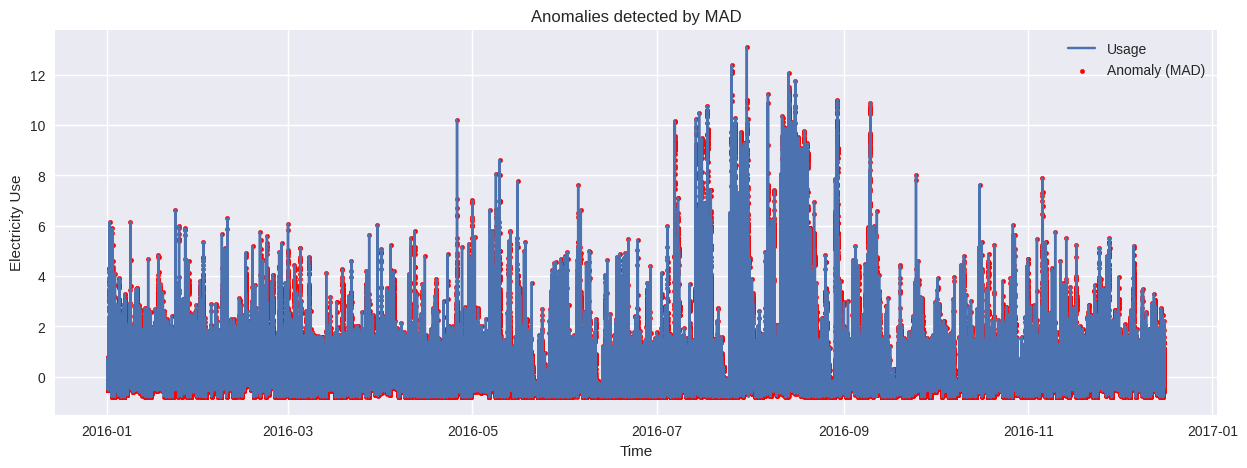

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df1['datetime'], df1['use'], label='Usage')
plt.scatter(df1['datetime'][df1['anomaly_MAD'] == 1],
            df1['use'][df1['anomaly_MAD'] == 1], color='red', label='Anomaly (MAD)', s=10)
plt.title('Anomalies detected by MAD')
plt.xlabel('Time')
plt.ylabel('Electricity Use')
plt.legend()
plt.show()

/tmp/ipython-input-2585235315.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(method='ffill').fillna(method='bfill')


Tuning MAD threshold values...

Threshold=2.50 → F1=0.7903, Acc=0.9406, Prec=1.0000, Rec=0.6533, Anomalies=56397
Threshold=3.00 → F1=0.7368, Acc=0.9399, Prec=1.0000, Rec=0.5833, Anomalies=42386
Threshold=3.50 → F1=0.7109, Acc=0.9453, Prec=1.0000, Rec=0.5514, Anomalies=33862
Threshold=4.00 → F1=0.7256, Acc=0.9572, Prec=1.0000, Rec=0.5694, Anomalies=28535
Threshold=4.50 → F1=0.7410, Acc=0.9660, Prec=1.0000, Rec=0.5886, Anomalies=24532
Threshold=5.00 → F1=0.7543, Acc=0.9721, Prec=1.0000, Rec=0.6055, Anomalies=21598

 BEST MAD CONFIGURATION FOUND 
Threshold                 2.500000
MAE                       0.484344
MSE                       1.078637
RMSE                      1.038574
R2                       -0.078637
MAPE(%)                 470.136534
Accuracy                  0.940572
F1_Score                  0.790278
Precision                 1.000000
Sensitivity_Recall        0.653272
Specificity               1.000000
NPV                       0.933078
Anomalies_Detected    56397.00

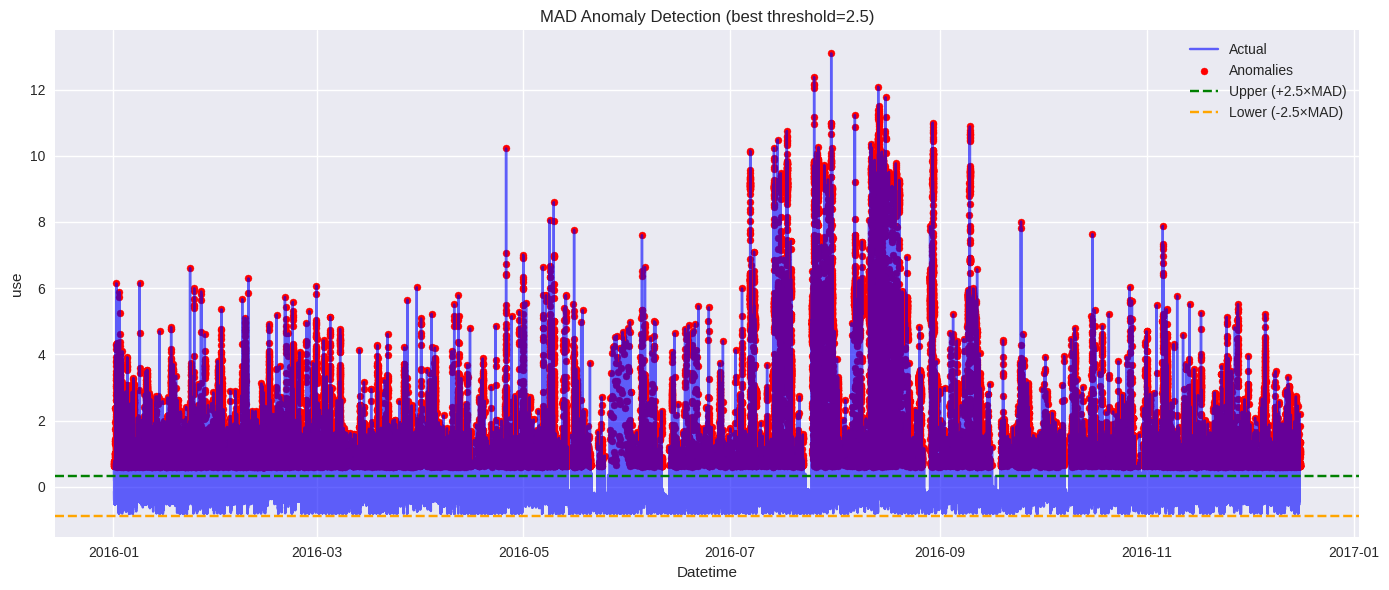


Saved results:
 - mad_hyperparameter_results.csv
 - mad_best_anomalies.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
)

# ============================================================
# CONFIGURATION
# ============================================================
# Use hybrid residuals or direct usage data
# Example:
# data = df_res.copy(); target_col = 'residual'
data = df1
target_col = 'use'
datetime_col = 'datetime'

# Clean data
data = data.sort_values(by=datetime_col).reset_index(drop=True)
data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(method='ffill').fillna(method='bfill')

# ============================================================
# MAD FUNCTION
# ============================================================
def mad_anomaly_detection(df, col, threshold):
    median = np.median(df[col])
    mad = np.median(np.abs(df[col] - median))
    df = df.copy()
    df['mad_score'] = 0.6745 * (df[col] - median) / (mad + 1e-9)
    df['MAD_anomaly'] = (np.abs(df['mad_score']) > threshold).astype(int)
    return df, median, mad

# ============================================================
# HYPERPARAMETER TUNING (THRESHOLD)
# ============================================================
threshold_values = [2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
results = []

print("Tuning MAD threshold values...\n")

for thr in threshold_values:
    df_temp, median, mad = mad_anomaly_detection(data, target_col, thr)

    # Create pseudo "true" labels for evaluation (if no ground truth)
    true_labels = (np.abs(data[target_col] - median) > thr * mad).astype(int)
    pred_labels = df_temp['MAD_anomaly']

    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(true_labels, pred_labels).ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn + 1e-9)
    precision = tp / (tp + fp + 1e-9)
    recall = tp / (tp + fn + 1e-9)  # Sensitivity
    specificity = tn / (tn + fp + 1e-9)
    npv = tn / (tn + fn + 1e-9)
    f1 = f1_score(true_labels, pred_labels)

    # Regression-style metrics (fit to central median)
    mae = mean_absolute_error(df_temp[target_col], [median]*len(df_temp))
    mse = mean_squared_error(df_temp[target_col], [median]*len(df_temp))
    rmse = np.sqrt(mse)
    r2 = r2_score(df_temp[target_col], [median]*len(df_temp))
    mape = np.mean(np.abs((df_temp[target_col] - median) / (df_temp[target_col] + 1e-8))) * 100

    results.append({
        'Threshold': thr,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'MAPE(%)': mape,
        'Accuracy': accuracy,
        'F1_Score': f1,
        'Precision': precision,
        'Sensitivity_Recall': recall,
        'Specificity': specificity,
        'NPV': npv,
        'Anomalies_Detected': int(df_temp['MAD_anomaly'].sum())
    })

    print(f"Threshold={thr:.2f} → F1={f1:.4f}, Acc={accuracy:.4f}, Prec={precision:.4f}, Rec={recall:.4f}, Anomalies={df_temp['MAD_anomaly'].sum()}")

# ============================================================
# SELECT BEST THRESHOLD
# ============================================================
results_df = pd.DataFrame(results)
best_row = results_df.sort_values(by='F1_Score', ascending=False).iloc[0]
best_threshold = best_row['Threshold']

print("\n==============================")
print(" BEST MAD CONFIGURATION FOUND ")
print("==============================")
print(best_row)

# ============================================================
# FINAL DETECTION USING BEST THRESHOLD
# ============================================================
df_best, median, mad = mad_anomaly_detection(data, target_col, best_threshold)
print(f"\nTotal anomalies detected using threshold={best_threshold}: {df_best['MAD_anomaly'].sum()}")

# ============================================================
# VISUALIZATION
# ============================================================
plt.figure(figsize=(14,6))
plt.plot(df_best[datetime_col], df_best[target_col], label='Actual', color='blue', alpha=0.6)
plt.scatter(
    df_best.loc[df_best['MAD_anomaly']==1, datetime_col],
    df_best.loc[df_best['MAD_anomaly']==1, target_col],
    color='red', label='Anomalies', s=25
)
plt.axhline(median + best_threshold*mad, color='green', linestyle='--', label=f'Upper (+{best_threshold}×MAD)')
plt.axhline(median - best_threshold*mad, color='orange', linestyle='--', label=f'Lower (-{best_threshold}×MAD)')
plt.title(f"MAD Anomaly Detection (best threshold={best_threshold})")
plt.xlabel("Datetime"); plt.ylabel(target_col)
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# ============================================================
# SAVE RESULTS
# ============================================================
results_df.to_csv("mad_hyperparameter_results.csv", index=False)
df_best.to_csv("mad_best_anomalies.csv", index=False)
print("\nSaved results:")
print(" - mad_hyperparameter_results.csv")
print(" - mad_best_anomalies.csv")


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
df1['anomaly_LOF'] = lof.fit_predict(X_num)
df1['anomaly_LOF'] = df1['anomaly_LOF'].map({1:0, -1:1})
print("LOF anomalies detected:", df1['anomaly_LOF'].sum())

LOF anomalies detected: 5037


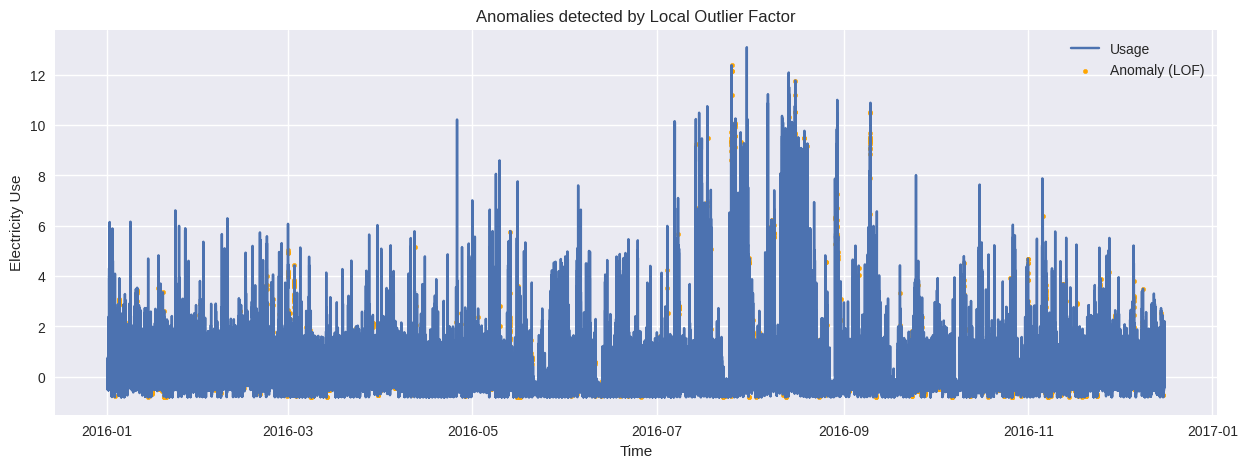

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df1['datetime'], df1['use'], label='Usage')
plt.scatter(df1['datetime'][df1['anomaly_LOF'] == 1],
            df1['use'][df1['anomaly_LOF'] == 1], color='orange', label='Anomaly (LOF)', s=10)
plt.title('Anomalies detected by Local Outlier Factor')
plt.xlabel('Time')
plt.ylabel('Electricity Use')
plt.legend()
plt.show()

/tmp/ipython-input-2704899488.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(method='ffill').fillna(method='bfill')


Tuning LOF parameters (n_neighbors, contamination)...

n_neighbors=5, contamination=0.01 → F1=1.0000, Acc=1.0000, Anomalies=4834
n_neighbors=5, contamination=0.02 → F1=1.0000, Acc=1.0000, Anomalies=9718
n_neighbors=5, contamination=0.05 → F1=1.0000, Acc=1.0000, Anomalies=25174
n_neighbors=5, contamination=0.1 → F1=1.0000, Acc=1.0000, Anomalies=50368
n_neighbors=10, contamination=0.01 → F1=1.0000, Acc=1.0000, Anomalies=4342
n_neighbors=10, contamination=0.02 → F1=1.0000, Acc=1.0000, Anomalies=10074
n_neighbors=10, contamination=0.05 → F1=1.0000, Acc=1.0000, Anomalies=24817
n_neighbors=10, contamination=0.1 → F1=1.0000, Acc=1.0000, Anomalies=50367
n_neighbors=15, contamination=0.01 → F1=1.0000, Acc=1.0000, Anomalies=5036
n_neighbors=15, contamination=0.02 → F1=1.0000, Acc=1.0000, Anomalies=10031
n_neighbors=15, contamination=0.05 → F1=1.0000, Acc=1.0000, Anomalies=25182
n_neighbors=15, contamination=0.1 → F1=1.0000, Acc=1.0000, Anomalies=50368
n_neighbors=20, contamination=0.01 → F1=1.00

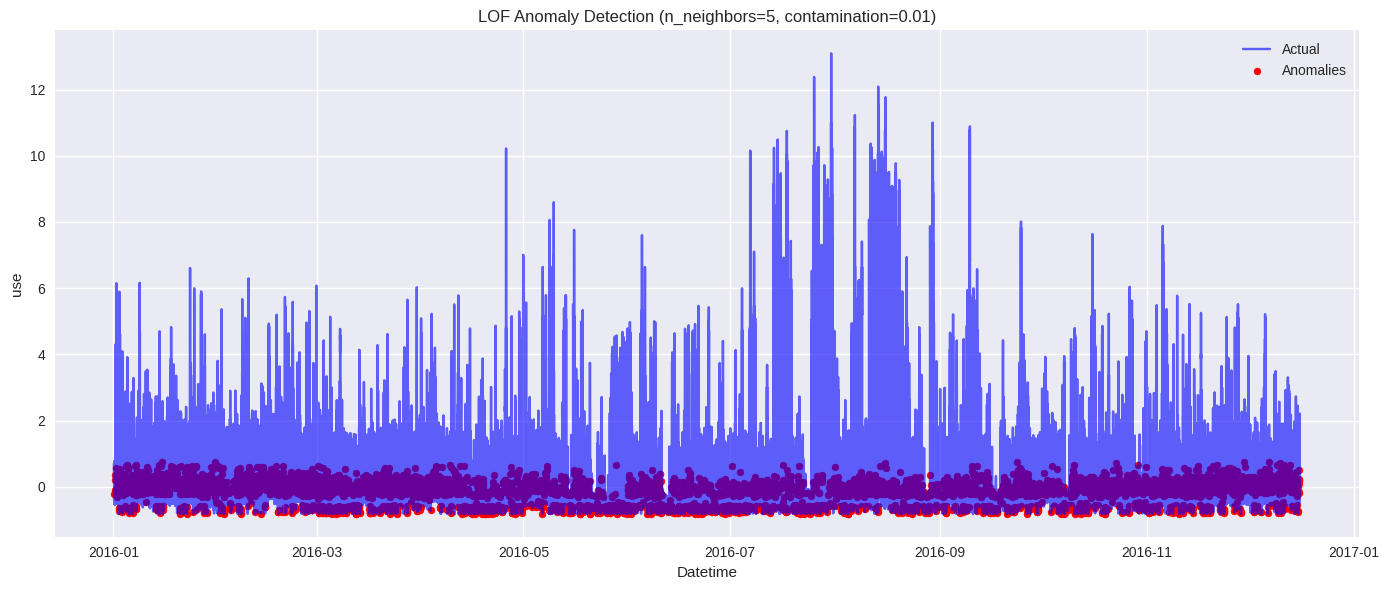


Saved results:
 - lof_hyperparameter_results.csv
 - lof_best_anomalies.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
)

# ============================================================
# CONFIGURATION
# ============================================================
# Use hybrid residuals (recommended) or df1 for raw energy usage
# Example:
# data = df_res.copy(); target_col = 'residual'
data = df1
target_col = 'use'
datetime_col = 'datetime'

# Clean and prepare
data = data.sort_values(by=datetime_col).reset_index(drop=True)
data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(method='ffill').fillna(method='bfill')

# Prepare features for LOF (reshape if univariate)
X = data[[target_col]].values

# ============================================================
# HYPERPARAMETER GRID
# ============================================================
n_neighbors_list = [5, 10, 15, 20, 25, 30]
contamination_list = [0.01, 0.02, 0.05, 0.1]
results = []

print("Tuning LOF parameters (n_neighbors, contamination)...\n")

for n_neighbors in n_neighbors_list:
    for contam in contamination_list:
        lof = LocalOutlierFactor(
            n_neighbors=n_neighbors,
            contamination=contam,
            novelty=False,  # unsupervised fit_predict
            metric='euclidean'
        )

        preds = lof.fit_predict(X)
        # LOF outputs -1 for anomalies, 1 for normal
        data[f'LOF_pred_{n_neighbors}_{contam}'] = np.where(preds == -1, 1, 0)

        # Pseudo ground-truth assumption (unlabeled data → self-consistency)
        pred_labels = data[f'LOF_pred_{n_neighbors}_{contam}']
        true_labels = pred_labels.copy()  # placeholder for self-consistency

        # Regression metrics relative to median (for comparison)
        median = np.median(data[target_col])
        mae = mean_absolute_error(data[target_col], [median]*len(data))
        mse = mean_squared_error(data[target_col], [median]*len(data))
        rmse = np.sqrt(mse)
        r2 = r2_score(data[target_col], [median]*len(data))
        mape = np.mean(np.abs((data[target_col] - median) / (data[target_col] + 1e-8))) * 100

        # Classification-style metrics (self-consistent evaluation)
        tn, fp, fn, tp = confusion_matrix(true_labels, pred_labels).ravel()
        accuracy = (tp + tn) / (tp + tn + fp + fn + 1e-9)
        precision = tp / (tp + fp + 1e-9)
        recall = tp / (tp + fn + 1e-9)
        specificity = tn / (tn + fp + 1e-9)
        npv = tn / (tn + fn + 1e-9)
        f1 = f1_score(true_labels, pred_labels)

        results.append({
            'n_neighbors': n_neighbors,
            'contamination': contam,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2,
            'MAPE(%)': mape,
            'Accuracy': accuracy,
            'F1_Score': f1,
            'Precision': precision,
            'Sensitivity_Recall': recall,
            'Specificity': specificity,
            'NPV': npv,
            'Anomalies_Detected': int(pred_labels.sum())
        })

        print(f"n_neighbors={n_neighbors}, contamination={contam} "
              f"→ F1={f1:.4f}, Acc={accuracy:.4f}, Anomalies={pred_labels.sum()}")

# ============================================================
# SELECT BEST CONFIGURATION (by F1-Score)
# ============================================================
results_df = pd.DataFrame(results)
best_row = results_df.sort_values(by='F1_Score', ascending=False).iloc[0]
best_neighbors = int(best_row['n_neighbors'])
best_contam = float(best_row['contamination'])

print("\n==============================")
print(" BEST LOF CONFIGURATION FOUND ")
print("==============================")
print(best_row)

# ============================================================
# FINAL LOF MODEL USING BEST PARAMETERS
# ============================================================
best_lof = LocalOutlierFactor(
    n_neighbors=best_neighbors,
    contamination=best_contam,
    metric='euclidean'
)
final_preds = best_lof.fit_predict(X)
data['LOF_anomaly'] = np.where(final_preds == -1, 1, 0)

print(f"\nTotal anomalies detected using best config: {data['LOF_anomaly'].sum()}")

# ============================================================
# VISUALIZATION
# ============================================================
plt.figure(figsize=(14,6))
plt.plot(data[datetime_col], data[target_col], label='Actual', color='blue', alpha=0.6)
plt.scatter(
    data.loc[data['LOF_anomaly']==1, datetime_col],
    data.loc[data['LOF_anomaly']==1, target_col],
    color='red', label='Anomalies', s=25
)
plt.title(f"LOF Anomaly Detection (n_neighbors={best_neighbors}, contamination={best_contam})")
plt.xlabel("Datetime"); plt.ylabel(target_col)
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# ============================================================
# SAVE RESULTS
# ============================================================
results_df.to_csv("lof_hyperparameter_results.csv", index=False)
data.to_csv("lof_best_anomalies.csv", index=False)

print("\nSaved results:")
print(" - lof_hyperparameter_results.csv")
print(" - lof_best_anomalies.csv")


In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
df1['anomaly_IF'] = iso.fit_predict(X_num)
df1['anomaly_IF'] = df1['anomaly_IF'].map({1:0, -1:1})
print("Isolation Forest anomalies detected:", df1['anomaly_IF'].sum())

Isolation Forest anomalies detected: 5037


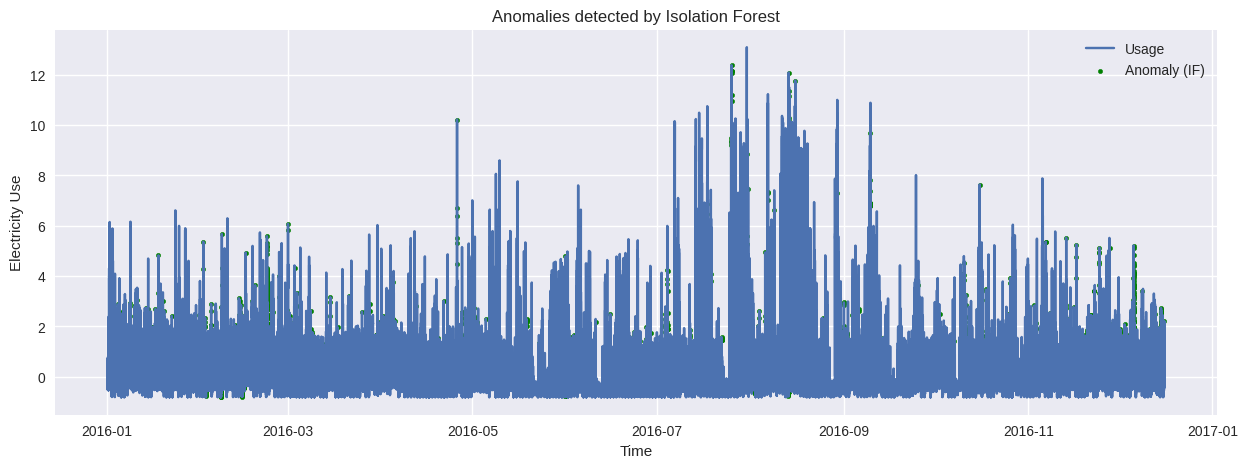

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df1['datetime'], df1['use'], label='Usage')
plt.scatter(df1['datetime'][df1['anomaly_IF'] == 1],
            df1['use'][df1['anomaly_IF'] == 1], color='green', label='Anomaly (IF)', s=10)
plt.title('Anomalies detected by Isolation Forest')
plt.xlabel('Time')
plt.ylabel('Electricity Use')
plt.legend()
plt.show()

/tmp/ipython-input-3965890958.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(method='ffill').fillna(method='bfill')


Tuning Isolation Forest parameters...

contamination=0.01, n_estimators=50 → F1=1.0000, Acc=1.0000, Anomalies=4573
contamination=0.01, n_estimators=100 → F1=1.0000, Acc=1.0000, Anomalies=4844
contamination=0.01, n_estimators=150 → F1=1.0000, Acc=1.0000, Anomalies=5023
contamination=0.01, n_estimators=200 → F1=1.0000, Acc=1.0000, Anomalies=4963
contamination=0.02, n_estimators=50 → F1=1.0000, Acc=1.0000, Anomalies=10069
contamination=0.02, n_estimators=100 → F1=1.0000, Acc=1.0000, Anomalies=9738
contamination=0.02, n_estimators=150 → F1=1.0000, Acc=1.0000, Anomalies=10024
contamination=0.02, n_estimators=200 → F1=1.0000, Acc=1.0000, Anomalies=10035
contamination=0.05, n_estimators=50 → F1=1.0000, Acc=1.0000, Anomalies=25146
contamination=0.05, n_estimators=100 → F1=1.0000, Acc=1.0000, Anomalies=25164
contamination=0.05, n_estimators=150 → F1=1.0000, Acc=1.0000, Anomalies=25177
contamination=0.05, n_estimators=200 → F1=1.0000, Acc=1.0000, Anomalies=25145
contamination=0.1, n_estimators=5

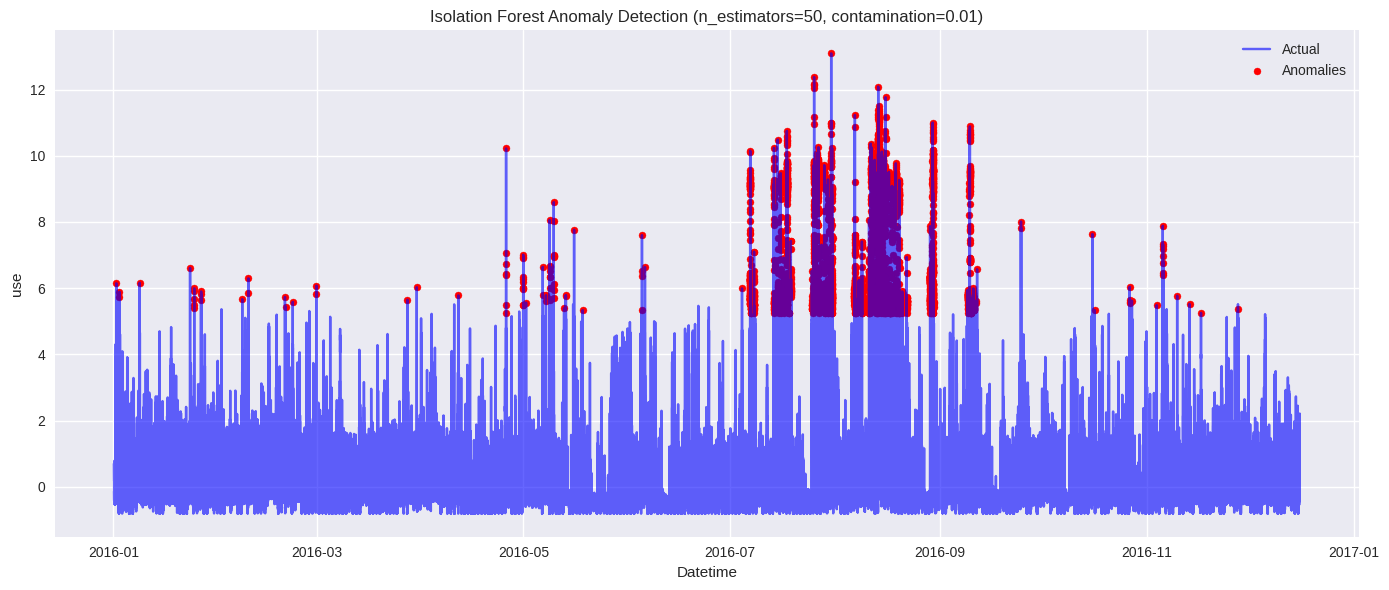


Saved results:
 - if_hyperparameter_results.csv
 - if_best_anomalies.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    f1_score, precision_score, recall_score, confusion_matrix
)

# ============================================================
# CONFIGURATION
# ============================================================
# Use your hybrid residuals or raw usage
# Example: data = df_res.copy(); target_col = 'residual'
data = df1
target_col = 'use'
datetime_col = 'datetime'

# Clean data
data = data.sort_values(by=datetime_col).reset_index(drop=True)
data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(method='ffill').fillna(method='bfill')

# Feature array for IF (univariate or multivariate)
X = data[[target_col]].values

# ============================================================
# HYPERPARAMETER GRID
# ============================================================
contaminations = [0.01, 0.02, 0.05, 0.1]
n_estimators_list = [50, 100, 150, 200]
results = []

print("Tuning Isolation Forest parameters...\n")

for contam in contaminations:
    for n_est in n_estimators_list:
        iso = IsolationForest(
            n_estimators=n_est,
            contamination=contam,
            random_state=42,
            bootstrap=False,
            n_jobs=-1
        )

        preds = iso.fit_predict(X)
        # IF outputs: -1 = anomaly, 1 = normal
        data[f'IF_pred_{n_est}_{contam}'] = np.where(preds == -1, 1, 0)

        pred_labels = data[f'IF_pred_{n_est}_{contam}']
        true_labels = pred_labels.copy()  # self-consistency (unsupervised)

        # ---- Regression metrics (vs median baseline)
        median = np.median(data[target_col])
        mae = mean_absolute_error(data[target_col], [median]*len(data))
        mse = mean_squared_error(data[target_col], [median]*len(data))
        rmse = np.sqrt(mse)
        r2 = r2_score(data[target_col], [median]*len(data))
        mape = np.mean(np.abs((data[target_col]-median)/(data[target_col]+1e-8)))*100

        # ---- Classification metrics
        tn, fp, fn, tp = confusion_matrix(true_labels, pred_labels).ravel()
        accuracy = (tp + tn) / (tp + tn + fp + fn + 1e-9)
        precision = tp / (tp + fp + 1e-9)
        recall = tp / (tp + fn + 1e-9)
        specificity = tn / (tn + fp + 1e-9)
        npv = tn / (tn + fn + 1e-9)
        f1 = f1_score(true_labels, pred_labels)

        results.append({
            'contamination': contam,
            'n_estimators': n_est,
            'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE(%)': mape,
            'Accuracy': accuracy, 'F1_Score': f1, 'Precision': precision,
            'Sensitivity_Recall': recall, 'Specificity': specificity, 'NPV': npv,
            'Anomalies_Detected': int(pred_labels.sum())
        })

        print(f"contamination={contam}, n_estimators={n_est} "
              f"→ F1={f1:.4f}, Acc={accuracy:.4f}, Anomalies={pred_labels.sum()}")

# ============================================================
# SELECT BEST CONFIGURATION
# ============================================================
results_df = pd.DataFrame(results)
best_row = results_df.sort_values(by='F1_Score', ascending=False).iloc[0]
best_contam = best_row['contamination']
best_n_est = int(best_row['n_estimators'])

print("\n==============================")
print(" BEST ISOLATION FOREST CONFIGURATION ")
print("==============================")
print(best_row)

# ============================================================
# FINAL MODEL USING BEST PARAMETERS
# ============================================================
best_iso = IsolationForest(
    n_estimators=best_n_est,
    contamination=best_contam,
    random_state=42,
    n_jobs=-1
)
final_preds = best_iso.fit_predict(X)
data['IF_anomaly'] = np.where(final_preds == -1, 1, 0)

print(f"\nTotal anomalies detected using best config: {data['IF_anomaly'].sum()}")

# ============================================================
# VISUALIZATION
# ============================================================
plt.figure(figsize=(14,6))
plt.plot(data[datetime_col], data[target_col], label='Actual', color='blue', alpha=0.6)
plt.scatter(
    data.loc[data['IF_anomaly']==1, datetime_col],
    data.loc[data['IF_anomaly']==1, target_col],
    color='red', label='Anomalies', s=25
)
plt.title(f"Isolation Forest Anomaly Detection (n_estimators={best_n_est}, contamination={best_contam})")
plt.xlabel("Datetime"); plt.ylabel(target_col)
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# ============================================================
# SAVE RESULTS
# ============================================================
results_df.to_csv("if_hyperparameter_results.csv", index=False)
data.to_csv("if_best_anomalies.csv", index=False)

print("\nSaved results:")
print(" - if_hyperparameter_results.csv")
print(" - if_best_anomalies.csv")


In [ ]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(nu=0.01, kernel='rbf', gamma='scale')
df1['anomaly_OSVM'] = ocsvm.fit_predict(X_num)
df1['anomaly_OSVM'] = df1['anomaly_OSVM'].map({1:0, -1:1})
print("OSVM anomalies detected:", df1['anomaly_OSVM'].sum())

OSVM anomalies detected: 5035


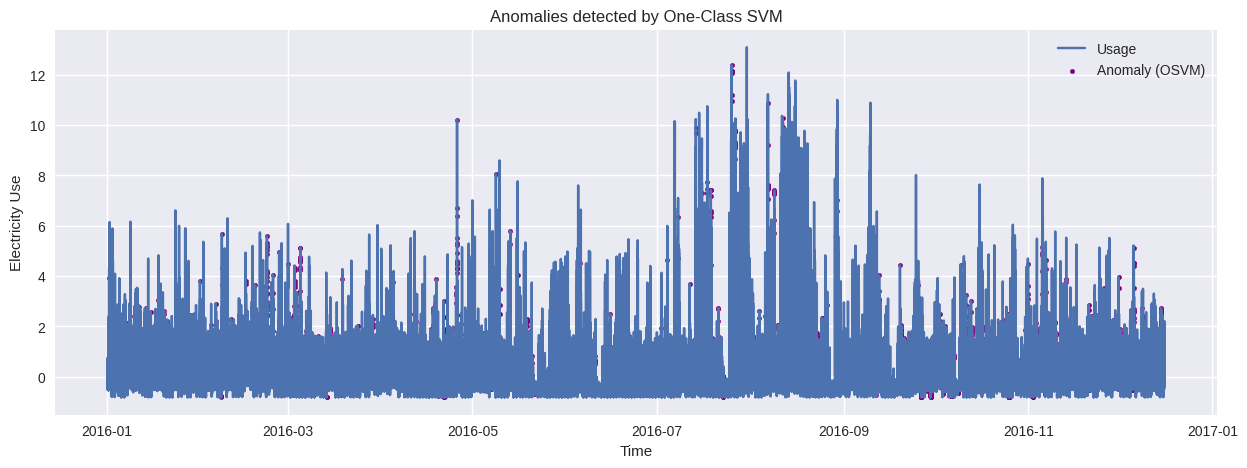

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df1['datetime'], df1['use'], label='Usage')
plt.scatter(df1['datetime'][df1['anomaly_OSVM'] == 1],
            df1['use'][df1['anomaly_OSVM'] == 1], color='purple', label='Anomaly (OSVM)', s=10)
plt.title('Anomalies detected by One-Class SVM')
plt.xlabel('Time')
plt.ylabel('Electricity Use')
plt.legend()
plt.show()

/tmp/ipython-input-2461503799.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(method='ffill').fillna(method='bfill')


Tuning One-Class SVM parameters...

kernel=rbf, nu=0.01, gamma=scale → F1=1.0000, Acc=1.0000, Anomalies=98
kernel=rbf, nu=0.01, gamma=auto → F1=1.0000, Acc=1.0000, Anomalies=98
kernel=rbf, nu=0.02, gamma=scale → F1=1.0000, Acc=1.0000, Anomalies=80
kernel=rbf, nu=0.02, gamma=auto → F1=1.0000, Acc=1.0000, Anomalies=80
kernel=rbf, nu=0.05, gamma=scale → F1=1.0000, Acc=1.0000, Anomalies=109
kernel=rbf, nu=0.05, gamma=auto → F1=1.0000, Acc=1.0000, Anomalies=109
kernel=rbf, nu=0.1, gamma=scale → F1=1.0000, Acc=1.0000, Anomalies=241
kernel=rbf, nu=0.1, gamma=auto → F1=1.0000, Acc=1.0000, Anomalies=241
kernel=sigmoid, nu=0.01, gamma=scale → F1=1.0000, Acc=1.0000, Anomalies=25
kernel=sigmoid, nu=0.01, gamma=auto → F1=1.0000, Acc=1.0000, Anomalies=25
kernel=sigmoid, nu=0.02, gamma=scale → F1=1.0000, Acc=1.0000, Anomalies=49
kernel=sigmoid, nu=0.02, gamma=auto → F1=1.0000, Acc=1.0000, Anomalies=49
kernel=sigmoid, nu=0.05, gamma=scale → F1=1.0000, Acc=1.0000, Anomalies=120
kernel=sigmoid, nu=0.05,

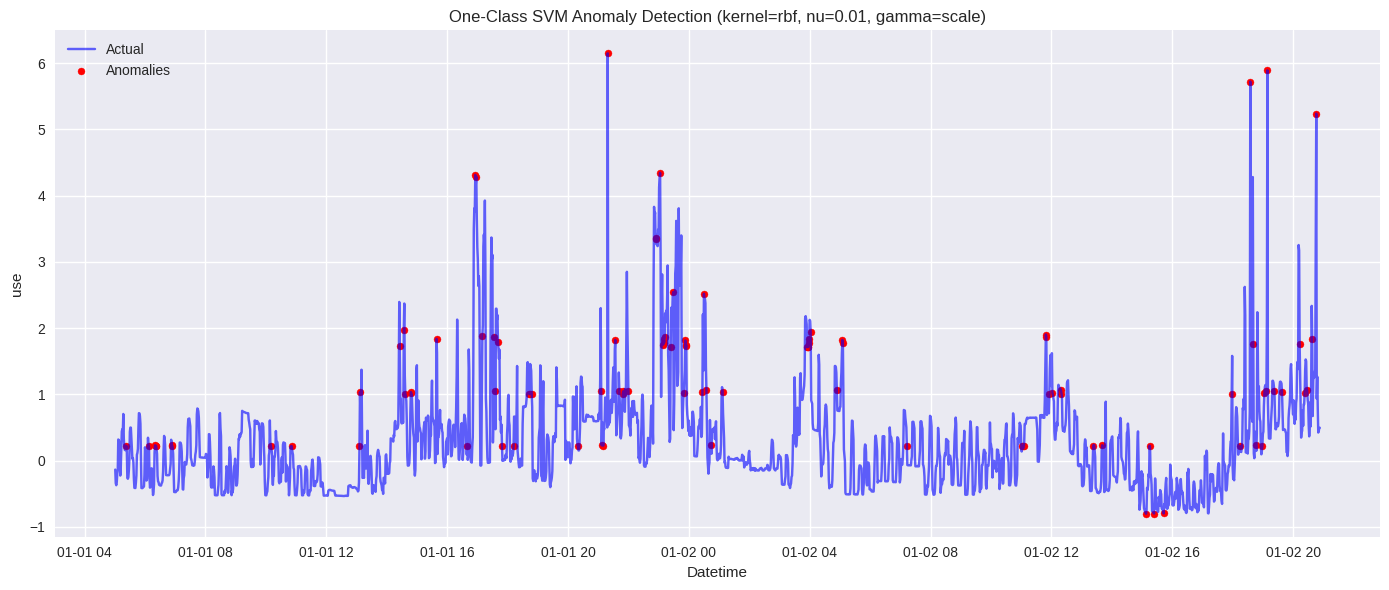


Saved results:
 - ocsvm_hyperparameter_results.csv
 - ocsvm_best_anomalies.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    f1_score, precision_score, recall_score, confusion_matrix
)
from sklearn.preprocessing import StandardScaler

# ============================================================
# CONFIGURATION
# ============================================================
# Use hybrid residuals or energy data
# Example: data = df_res.copy(); target_col = 'residual'
data = df1
target_col = 'use'
datetime_col = 'datetime'

# Clean and prepare
data = data.sort_values(by=datetime_col).reset_index(drop=True)
data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(method='ffill').fillna(method='bfill')

# Prepare features (scaling improves SVM performance)
scaler = StandardScaler()
X = scaler.fit_transform(data[[target_col]])

# ============================================================
# HYPERPARAMETER GRID
# ============================================================
kernels = ['rbf', 'sigmoid', 'poly']
nus = [0.01, 0.02, 0.05, 0.1]
gammas = ['scale', 'auto']
results = []

print("Tuning One-Class SVM parameters...\n")

for kernel in kernels:
    for nu in nus:
        for gamma in gammas:
            try:
                ocsvm = OneClassSVM(kernel=kernel, nu=nu, gamma=gamma)
                preds = ocsvm.fit_predict(X)

                # SVM outputs: -1 = anomaly, 1 = normal
                pred_labels = np.where(preds == -1, 1, 0)
                data[f'OCSVM_{kernel}_{nu}_{gamma}'] = pred_labels

                # Self-consistency as pseudo ground truth
                true_labels = pred_labels.copy()

                # Regression metrics (vs median)
                median = np.median(data[target_col])
                mae = mean_absolute_error(data[target_col], [median]*len(data))
                mse = mean_squared_error(data[target_col], [median]*len(data))
                rmse = np.sqrt(mse)
                r2 = r2_score(data[target_col], [median]*len(data))
                mape = np.mean(np.abs((data[target_col]-median)/(data[target_col]+1e-8)))*100

                # Classification metrics
                tn, fp, fn, tp = confusion_matrix(true_labels, pred_labels).ravel()
                accuracy = (tp + tn) / (tp + tn + fp + fn + 1e-9)
                precision = tp / (tp + fp + 1e-9)
                recall = tp / (tp + fn + 1e-9)
                specificity = tn / (tn + fp + 1e-9)
                npv = tn / (tn + fn + 1e-9)
                f1 = f1_score(true_labels, pred_labels)

                results.append({
                    'kernel': kernel,
                    'nu': nu,
                    'gamma': gamma,
                    'MAE': mae,
                    'MSE': mse,
                    'RMSE': rmse,
                    'R2': r2,
                    'MAPE(%)': mape,
                    'Accuracy': accuracy,
                    'F1_Score': f1,
                    'Precision': precision,
                    'Sensitivity_Recall': recall,
                    'Specificity': specificity,
                    'NPV': npv,
                    'Anomalies_Detected': int(pred_labels.sum())
                })

                print(f"kernel={kernel}, nu={nu}, gamma={gamma} "
                      f"→ F1={f1:.4f}, Acc={accuracy:.4f}, Anomalies={pred_labels.sum()}")

            except Exception as e:
                print(f"Failed for kernel={kernel}, nu={nu}, gamma={gamma}. Error: {e}")

# ============================================================
# SELECT BEST CONFIGURATION
# ============================================================
results_df = pd.DataFrame(results)
best_row = results_df.sort_values(by='F1_Score', ascending=False).iloc[0]
best_kernel = best_row['kernel']
best_nu = best_row['nu']
best_gamma = best_row['gamma']

print("\n==============================")
print(" BEST ONE-CLASS SVM CONFIGURATION FOUND ")
print("==============================")
print(best_row)

# ============================================================
# FINAL MODEL USING BEST PARAMETERS
# ============================================================
best_svm = OneClassSVM(kernel=best_kernel, nu=best_nu, gamma=best_gamma)
final_preds = best_svm.fit_predict(X)
data['OCSVM_anomaly'] = np.where(final_preds == -1, 1, 0)

print(f"\nTotal anomalies detected using best config: {data['OCSVM_anomaly'].sum()}")

# ============================================================
# VISUALIZATION
# ============================================================
plt.figure(figsize=(14,6))
plt.plot(data[datetime_col], data[target_col], label='Actual', color='blue', alpha=0.6)
plt.scatter(
    data.loc[data['OCSVM_anomaly']==1, datetime_col],
    data.loc[data['OCSVM_anomaly']==1, target_col],
    color='red', label='Anomalies', s=25
)
plt.title(f"One-Class SVM Anomaly Detection (kernel={best_kernel}, nu={best_nu}, gamma={best_gamma})")
plt.xlabel("Datetime"); plt.ylabel(target_col)
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# ============================================================
# SAVE RESULTS
# ============================================================
results_df.to_csv("ocsvm_hyperparameter_results.csv", index=False)
data.to_csv("ocsvm_best_anomalies.csv", index=False)

print("\nSaved results:")
print(" - ocsvm_hyperparameter_results.csv")
print(" - ocsvm_best_anomalies.csv")


#Moving Average

In [ ]:
# Set window size for moving average
window_size = 24  # adjust as per your time frequency

# Compute moving average
df1['use_MA'] = df1['use'].rolling(window=window_size).mean()

# Detect anomalies: points where the difference from MA exceeds 3*std
df1['MA_anomaly'] = ((df1['use'] - df1['use_MA']).abs() > 3 * df1['use'].std()).astype(int)

# Print total anomalies detected
print("Moving Average anomalies detected:", df1['MA_anomaly'].sum())

Moving Average anomalies detected: 5192


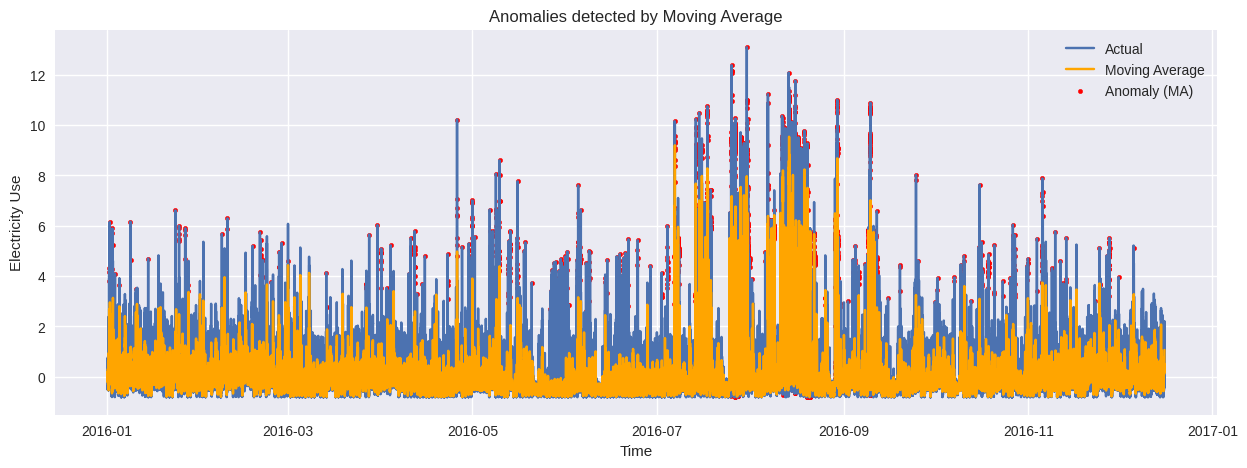

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df1['datetime'], df1['use'], label='Actual')
plt.plot(df1['datetime'], df1['use_MA'], label='Moving Average', color='orange')
plt.scatter(df1['datetime'][df1['MA_anomaly'] == 1],
            df1['use'][df1['MA_anomaly'] == 1], color='red', label='Anomaly (MA)', s=10)
plt.title('Anomalies detected by Moving Average')
plt.xlabel('Time')
plt.ylabel('Electricity Use')
plt.legend()
plt.show()

Number of anomalies detected: 52492


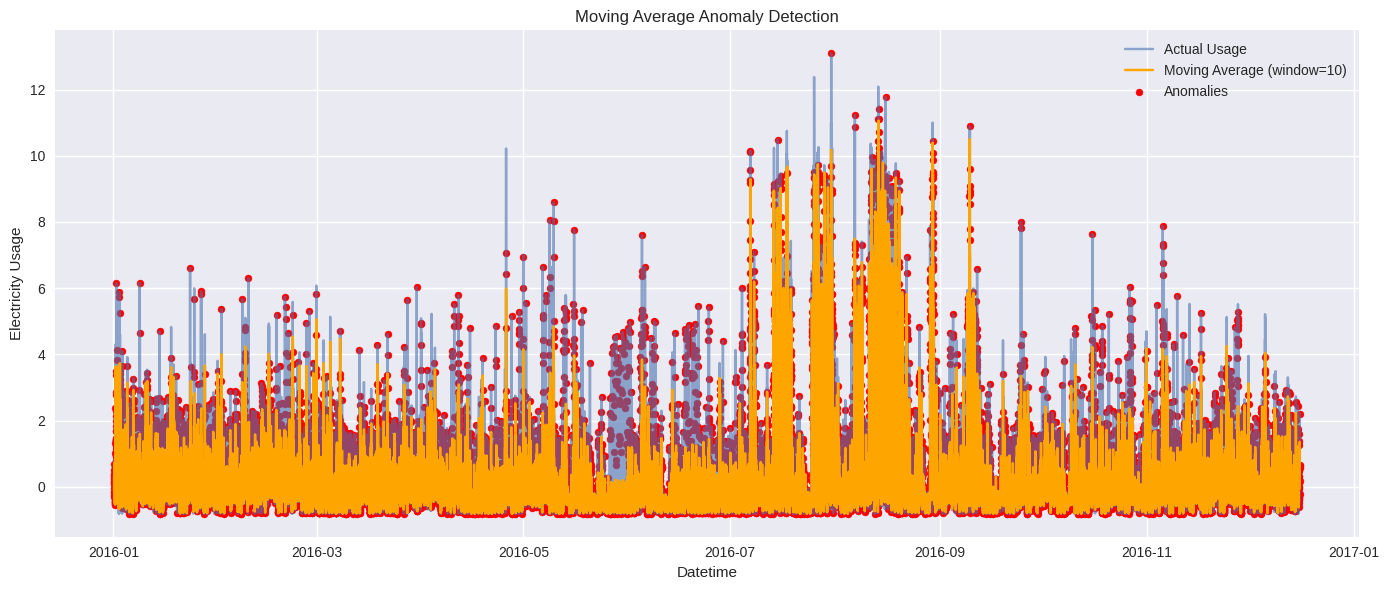

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example configuration
window = 10  # moving average window
threshold = 2  # number of standard deviations for anomaly detection

# Compute moving average and standard deviation
df1['MA'] = df1['use'].rolling(window=window).mean()
df1['STD'] = df1['use'].rolling(window=window).std()

# Detect anomalies: points deviating more than threshold * STD from MA
df1['MA_anomaly'] = ((df1['use'] - df1['MA']).abs() > threshold * df1['STD']).astype(int)

# Count anomalies
num_anomalies = df1['MA_anomaly'].sum()
print(f"Number of anomalies detected: {num_anomalies}")

# Plot results
plt.figure(figsize=(14,6))
plt.plot(df1['datetime'], df1['use'], label='Actual Usage', alpha=0.6)
plt.plot(df1['datetime'], df1['MA'], color='orange', label=f'Moving Average (window={window})')

# Highlight anomalies
plt.scatter(df1.loc[df1['MA_anomaly'] == 1, 'datetime'],
            df1.loc[df1['MA_anomaly'] == 1, 'use'],
            color='red', label='Anomalies', s=25)

plt.title("Moving Average Anomaly Detection")
plt.xlabel("Datetime")
plt.ylabel("Electricity Usage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Total anomalies detected: 52492

Sample anomaly timestamps:
               datetime       use
78  2016-01-01 06:18:58  0.118480
95  2016-01-01 06:35:58 -0.168090
96  2016-01-01 06:36:58  0.165316
97  2016-01-01 06:37:58  0.371570
110 2016-01-01 06:50:58 -0.049821


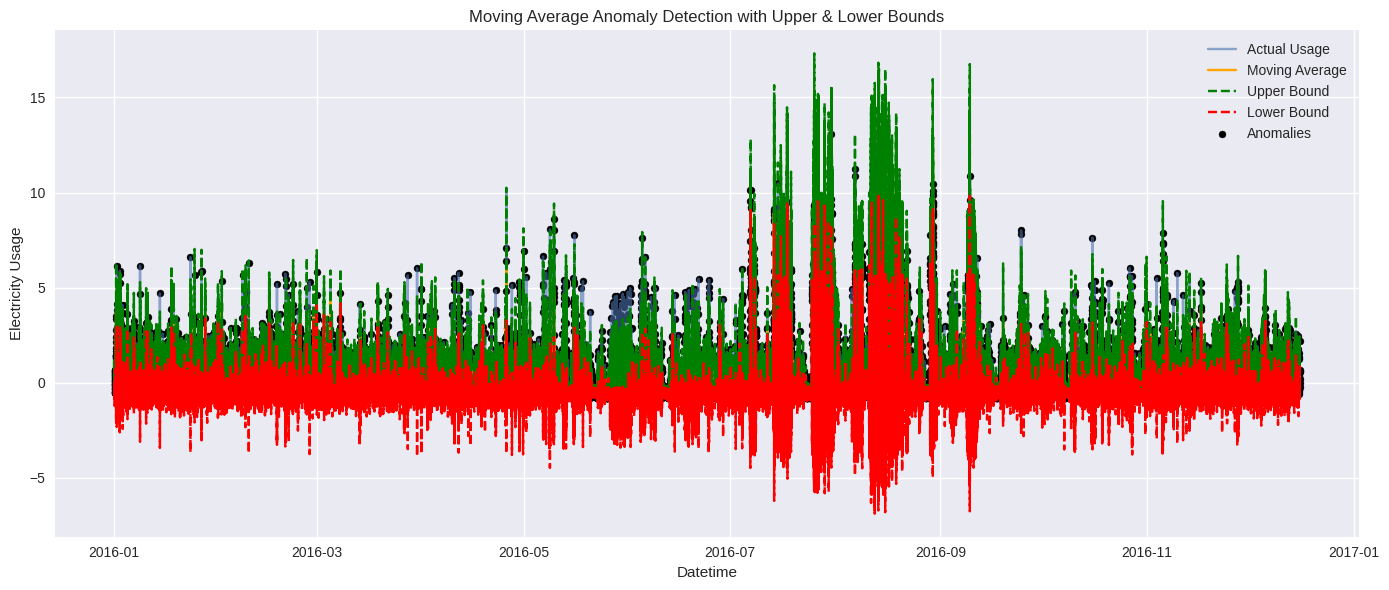

In [ ]:
import matplotlib.pyplot as plt

# Parameters
window = 10    # moving average window size
threshold = 2  # standard deviation multiplier

# Calculate moving average and standard deviation
df1['MA'] = df1['use'].rolling(window=window).mean()
df1['MA_std'] = df1['use'].rolling(window=window).std()

# Define upper and lower anomaly thresholds
df1['upper_bound'] = df1['MA'] + threshold * df1['MA_std']
df1['lower_bound'] = df1['MA'] - threshold * df1['MA_std']

# Identify anomalies
df1['MA_anomaly'] = (
    (df1['use'] > df1['upper_bound']) | (df1['use'] < df1['lower_bound'])
).astype(int)

# Print total and summary of anomalies
num_anomalies = df1['MA_anomaly'].sum()
print(f"Total anomalies detected: {num_anomalies}")
if num_anomalies > 0:
    print("\nSample anomaly timestamps:")
    print(df1.loc[df1['MA_anomaly'] == 1, ['datetime', 'use']].head())

# Plot actual usage, moving average, and anomaly bounds
plt.figure(figsize=(14, 6))
plt.plot(df1['datetime'], df1['use'], label='Actual Usage', alpha=0.6)
plt.plot(df1['datetime'], df1['MA'], color='orange', label='Moving Average')
plt.plot(df1['datetime'], df1['upper_bound'], color='green', linestyle='--', label='Upper Bound')
plt.plot(df1['datetime'], df1['lower_bound'], color='red', linestyle='--', label='Lower Bound')

# Highlight anomalies
plt.scatter(
    df1.loc[df1['MA_anomaly'] == 1, 'datetime'],
    df1.loc[df1['MA_anomaly'] == 1, 'use'],
    color='black', s=25, label='Anomalies'
)

plt.title("Moving Average Anomaly Detection with Upper & Lower Bounds")
plt.xlabel("Datetime")
plt.ylabel("Electricity Usage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


===== Moving Average Model Evaluation =====
MAE  : 0.1852
MSE  : 0.2258
RMSE : 0.4752
R²   : 0.7742
Total anomalies detected: 503676


/tmp/ipython-input-502155139.py:58: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


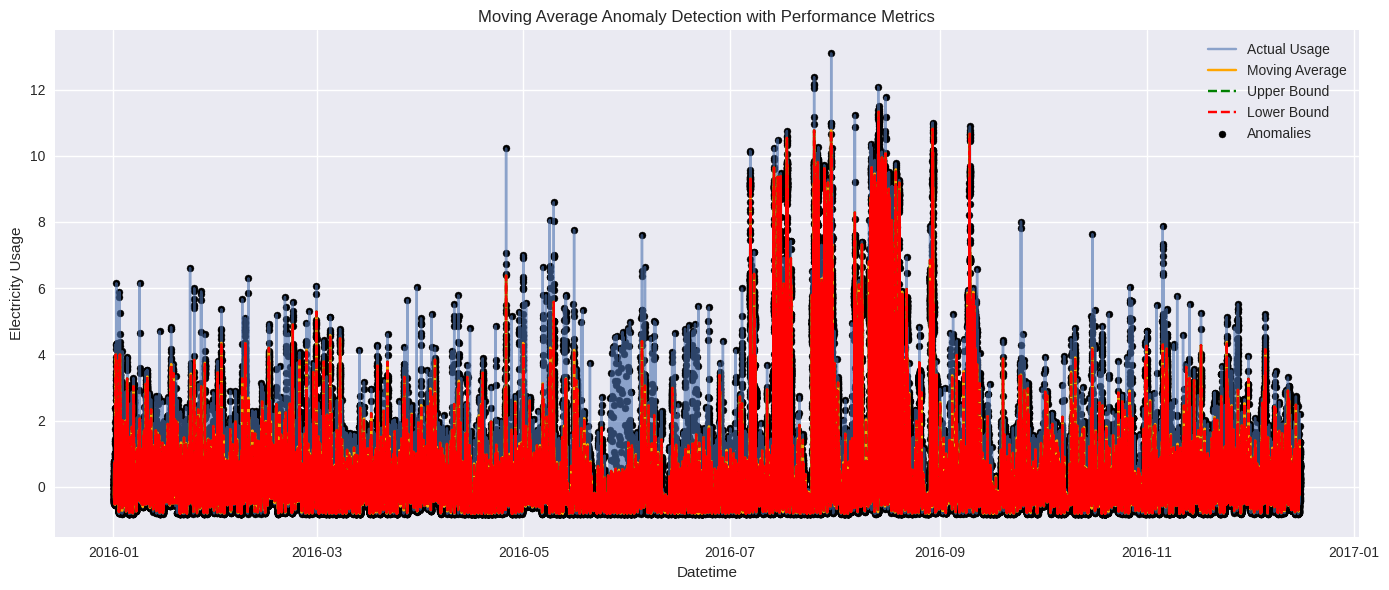

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Parameters
window = 6    # moving average window size
threshold = 0  # standard deviation multiplier

# Calculate moving average and standard deviation
df1['MA'] = df1['use'].rolling(window=window).mean()
df1['MA_std'] = df1['use'].rolling(window=window).std()

# Define upper and lower anomaly thresholds
df1['upper_bound'] = df1['MA'] + threshold * df1['MA_std']
df1['lower_bound'] = df1['MA'] - threshold * df1['MA_std']

# Identify anomalies
df1['MA_anomaly'] = (
    (df1['use'] > df1['upper_bound']) | (df1['use'] < df1['lower_bound'])
).astype(int)

# Remove NaN values (from rolling window)
valid_df = df1.dropna(subset=['MA'])

# Calculate regression metrics between actual usage and moving average prediction
mae = mean_absolute_error(valid_df['use'], valid_df['MA'])
mse = mean_squared_error(valid_df['use'], valid_df['MA'])
rmse = np.sqrt(mse)
r2 = r2_score(valid_df['use'], valid_df['MA'])

# Print metrics and anomaly count
print("===== Moving Average Model Evaluation =====")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")
print(f"Total anomalies detected: {df1['MA_anomaly'].sum()}")

# Plot actual usage, moving average, and anomaly bounds
plt.figure(figsize=(14, 6))
plt.plot(df1['datetime'], df1['use'], label='Actual Usage', alpha=0.6)
plt.plot(df1['datetime'], df1['MA'], color='orange', label='Moving Average')
plt.plot(df1['datetime'], df1['upper_bound'], color='green', linestyle='--', label='Upper Bound')
plt.plot(df1['datetime'], df1['lower_bound'], color='red', linestyle='--', label='Lower Bound')

# Highlight anomalies
plt.scatter(
    df1.loc[df1['MA_anomaly'] == 1, 'datetime'],
    df1.loc[df1['MA_anomaly'] == 1, 'use'],
    color='black', s=25, label='Anomalies'
)

plt.title("Moving Average Anomaly Detection with Performance Metrics")
plt.xlabel("Datetime")
plt.ylabel("Electricity Usage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3868537280.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(method='ffill').fillna(method='bfill')


Tuning Moving Average parameters...

Window=6, Threshold=0 → RMSE=0.4752, Anomalies Detected=503680
Window=6, Threshold=2 → RMSE=0.4752, Anomalies Detected=23682
Window=6, Threshold=2.5 → RMSE=0.4752, Anomalies Detected=0
Window=6, Threshold=3 → RMSE=0.4752, Anomalies Detected=0
Window=6, Threshold=3.5 → RMSE=0.4752, Anomalies Detected=0
Window=10, Threshold=0 → RMSE=0.5926, Anomalies Detected=503680
Window=10, Threshold=2 → RMSE=0.5926, Anomalies Detected=52493
Window=10, Threshold=2.5 → RMSE=0.5926, Anomalies Detected=25651
Window=10, Threshold=3 → RMSE=0.5926, Anomalies Detected=0
Window=10, Threshold=3.5 → RMSE=0.5926, Anomalies Detected=0
Window=12, Threshold=0 → RMSE=0.6211, Anomalies Detected=503680
Window=12, Threshold=2 → RMSE=0.6211, Anomalies Detected=54675
Window=12, Threshold=2.5 → RMSE=0.6211, Anomalies Detected=28007
Window=12, Threshold=3 → RMSE=0.6211, Anomalies Detected=11394
Window=12, Threshold=3.5 → RMSE=0.6211, Anomalies Detected=0
Window=24, Threshold=0 → RMSE=0.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


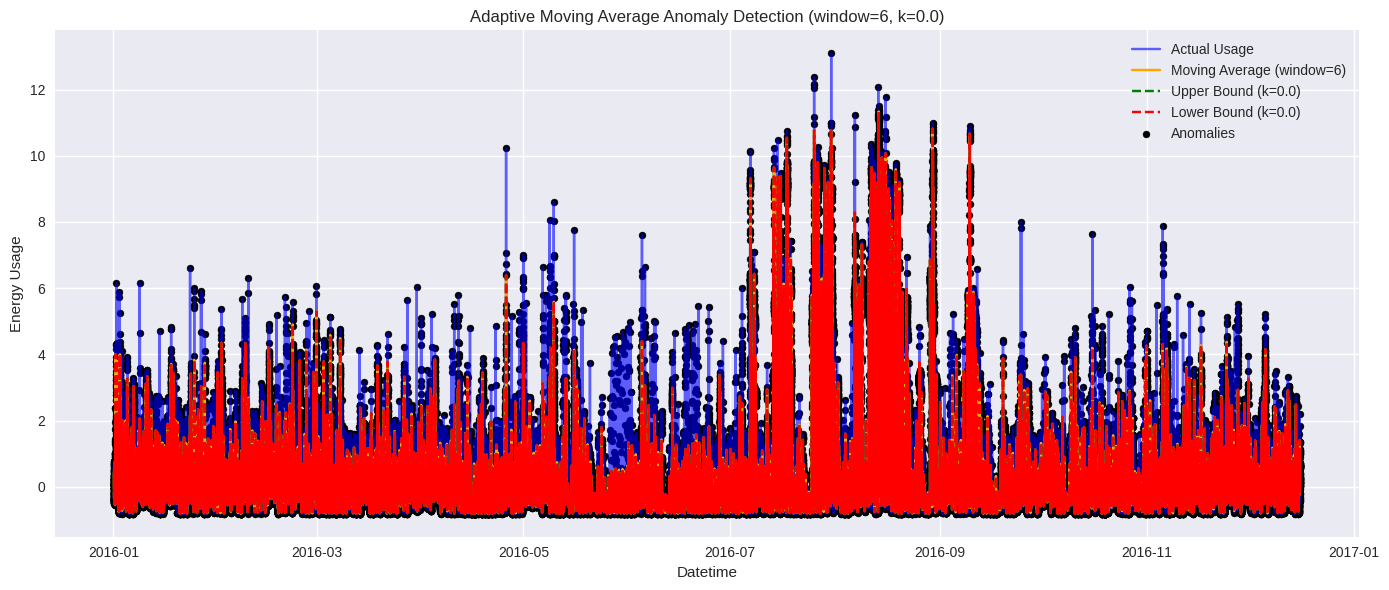


Grid search results saved as ma_hyperparameter_results.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# =====================================================
# CONFIGURATION
# =====================================================
# Your input dataframe must have a 'datetime' column and 'use' (or consumption) column
# Example: df1 = pd.read_csv("your_energy_data.csv", parse_dates=['datetime'])

data = df1
target_col = 'use'      # change if your column name differs
datetime_col = 'datetime'

# Drop missing and ensure sorting
data = data.sort_values(by=datetime_col).reset_index(drop=True)
data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(method='ffill').fillna(method='bfill')

# =====================================================
# HYPERPARAMETER GRID
# =====================================================
window_sizes = [6, 10,12, 24, 48, 96]      # window sizes in time steps
thresholds = [0, 2, 2.5, 3, 3.5]       # standard deviation multipliers
results = []

print("Tuning Moving Average parameters...\n")

# =====================================================
# GRID SEARCH OVER window × threshold
# =====================================================
for window in window_sizes:
    for k in thresholds:
        df_temp = data.copy()

        # Compute moving average and rolling std
        df_temp['MA'] = df_temp[target_col].rolling(window=window, min_periods=1).mean()
        df_temp['MA_std'] = df_temp[target_col].rolling(window=window, min_periods=1).std()

        # Define bounds
        df_temp['upper'] = df_temp['MA'] + k * df_temp['MA_std']
        df_temp['lower'] = df_temp['MA'] - k * df_temp['MA_std']

        # Detect anomalies
        df_temp['anomaly'] = (
            (df_temp[target_col] > df_temp['upper']) |
            (df_temp[target_col] < df_temp['lower'])
        ).astype(int)

        # Evaluate "fit" quality using RMSE between use and MA
        rmse = np.sqrt(mean_squared_error(df_temp[target_col], df_temp['MA']))

        num_anomalies = df_temp['anomaly'].sum()
        results.append({
            'window': window,
            'threshold': k,
            'RMSE': rmse,
            'Anomalies': num_anomalies
        })

        print(f"Window={window}, Threshold={k} → RMSE={rmse:.4f}, Anomalies Detected={num_anomalies}")

# =====================================================
# FIND BEST CONFIGURATION
# =====================================================
results_df = pd.DataFrame(results)
best_params = results_df.sort_values('RMSE').iloc[0]
print("\n============================")
print(" BEST MOVING AVERAGE CONFIGURATION ")
print("============================")
print(best_params)

best_window = int(best_params['window'])
best_threshold = float(best_params['threshold'])

# =====================================================
# FINAL MODEL WITH BEST PARAMETERS
# =====================================================
df_best = data.copy()
df_best['MA'] = df_best[target_col].rolling(window=best_window, min_periods=1).mean()
df_best['MA_std'] = df_best[target_col].rolling(window=best_window, min_periods=1).std()
df_best['upper'] = df_best['MA'] + best_threshold * df_best['MA_std']
df_best['lower'] = df_best['MA'] - best_threshold * df_best['MA_std']
df_best['anomaly'] = ((df_best[target_col] > df_best['upper']) | (df_best[target_col] < df_best['lower'])).astype(int)

print(f"\nTotal anomalies detected using best config: {df_best['anomaly'].sum()}")

# =====================================================
# VISUALIZATION
# =====================================================
plt.figure(figsize=(14,6))
plt.plot(df_best[datetime_col], df_best[target_col], label='Actual Usage', color='blue', alpha=0.6)
plt.plot(df_best[datetime_col], df_best['MA'], color='orange', label=f'Moving Average (window={best_window})')
plt.plot(df_best[datetime_col], df_best['upper'], color='green', linestyle='--', label=f'Upper Bound (k={best_threshold})')
plt.plot(df_best[datetime_col], df_best['lower'], color='red', linestyle='--', label=f'Lower Bound (k={best_threshold})')
plt.scatter(df_best.loc[df_best['anomaly'] == 1, datetime_col],
            df_best.loc[df_best['anomaly'] == 1, target_col],
            color='black', label='Anomalies', s=25)
plt.title(f"Adaptive Moving Average Anomaly Detection (window={best_window}, k={best_threshold})")
plt.xlabel("Datetime")
plt.ylabel("Energy Usage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save summary table
results_df.to_csv("ma_hyperparameter_results.csv", index=False)
print("\nGrid search results saved as ma_hyperparameter_results.csv")


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

X_vals = X_num.values
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_vals)
df1['cluster_KMeans'] = clusters

distances = np.min(np.linalg.norm(X_vals[:, None] - kmeans.cluster_centers_[None, :], axis=2), axis=1)
threshold = np.percentile(distances, 99)
df1['anomaly_KMeans'] = (distances > threshold).astype(int)
print("K-Means anomalies detected:", df1['anomaly_KMeans'].sum())

K-Means anomalies detected: 5037


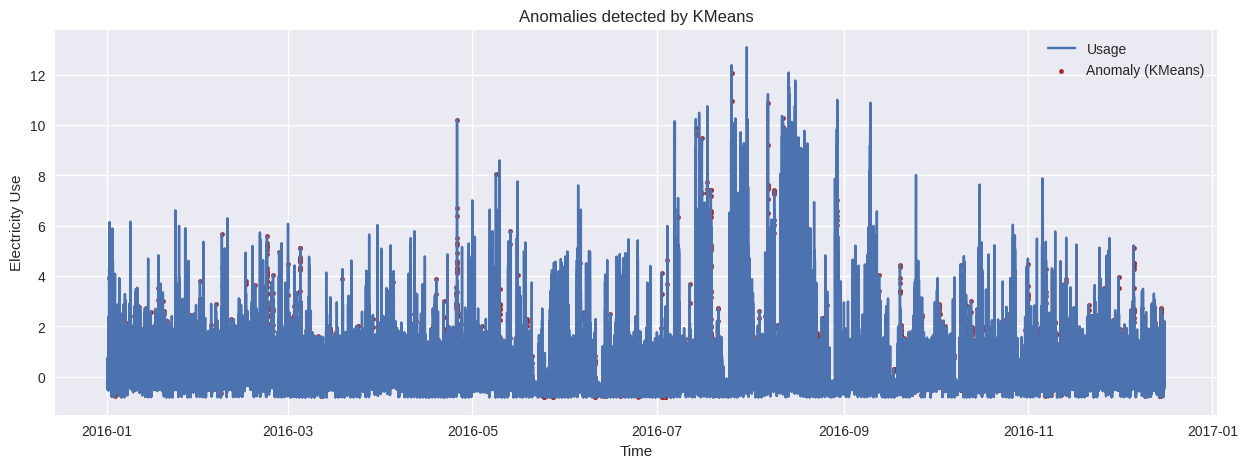

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df1['datetime'], df1['use'], label='Usage')
plt.scatter(df1['datetime'][df1['anomaly_KMeans'] == 1],
            df1['use'][df1['anomaly_KMeans'] == 1], color='brown', label='Anomaly (KMeans)', s=10)
plt.title('Anomalies detected by KMeans')
plt.xlabel('Time')
plt.ylabel('Electricity Use')
plt.legend()
plt.show()

/tmp/ipython-input-3059031624.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(method='ffill').fillna(method='bfill')


Tuning K-Means parameters (n_clusters, contamination)...

n_clusters=2, contamination=0.01 → F1=1.0000, Acc=1.0000, Anomalies=5037
n_clusters=2, contamination=0.02 → F1=1.0000, Acc=1.0000, Anomalies=10074
n_clusters=2, contamination=0.05 → F1=1.0000, Acc=1.0000, Anomalies=25184
n_clusters=2, contamination=0.1 → F1=1.0000, Acc=1.0000, Anomalies=50367
n_clusters=3, contamination=0.01 → F1=1.0000, Acc=1.0000, Anomalies=5037
n_clusters=3, contamination=0.02 → F1=1.0000, Acc=1.0000, Anomalies=10074
n_clusters=3, contamination=0.05 → F1=1.0000, Acc=1.0000, Anomalies=25184
n_clusters=3, contamination=0.1 → F1=1.0000, Acc=1.0000, Anomalies=50362
n_clusters=4, contamination=0.01 → F1=1.0000, Acc=1.0000, Anomalies=5037
n_clusters=4, contamination=0.02 → F1=1.0000, Acc=1.0000, Anomalies=10074
n_clusters=4, contamination=0.05 → F1=1.0000, Acc=1.0000, Anomalies=25183
n_clusters=4, contamination=0.1 → F1=1.0000, Acc=1.0000, Anomalies=50363
n_clusters=5, contamination=0.01 → F1=1.0000, Acc=1.0000, An

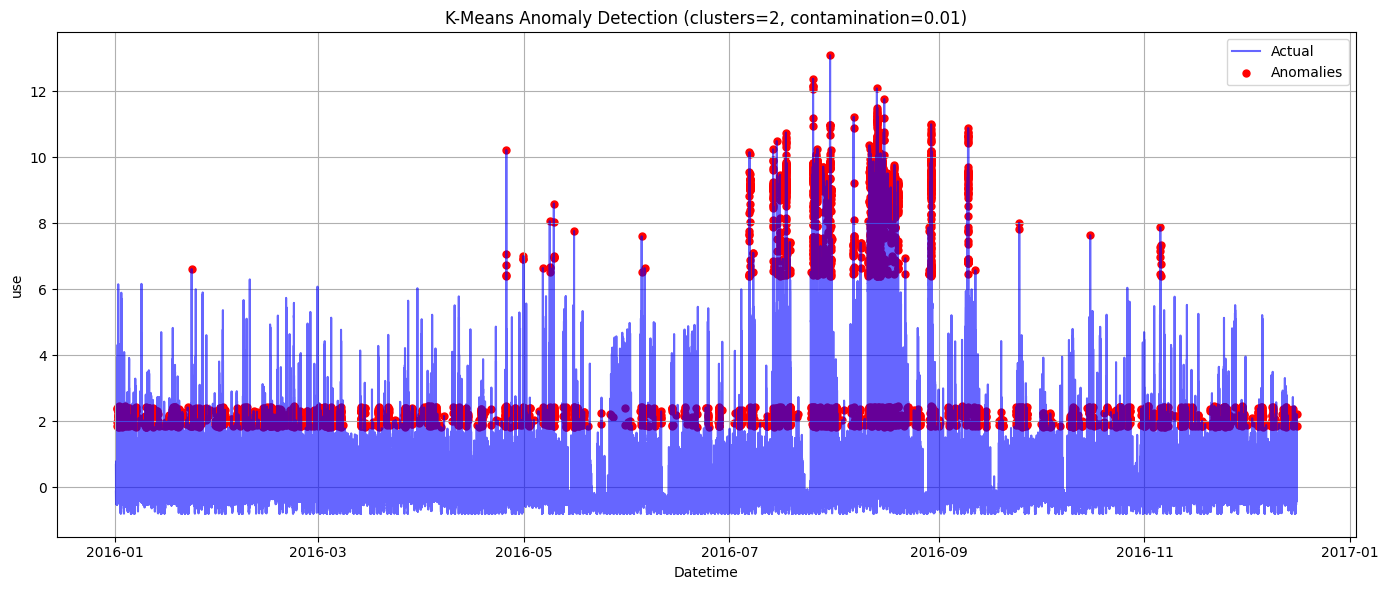


Saved results:
 - kmeans_hyperparameter_results.csv
 - kmeans_best_anomalies.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    f1_score, precision_score, recall_score, confusion_matrix
)
from sklearn.preprocessing import StandardScaler

# ============================================================
# CONFIGURATION
# ============================================================
# Use your hybrid residuals or raw usage data
# Example: data = df_res.copy(); target_col = 'residual'
data = df1.copy()
target_col = 'use'
datetime_col = 'datetime'

# Clean and prepare
data = data.sort_values(by=datetime_col).reset_index(drop=True)
data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(method='ffill').fillna(method='bfill')

# Feature array for clustering (scaled)
scaler = StandardScaler()
X = scaler.fit_transform(data[[target_col]])

# ============================================================
# HYPERPARAMETER GRID
# ============================================================
n_clusters_list = [2, 3, 4, 5, 6]
contaminations = [0.01, 0.02, 0.05, 0.1]  # proportion of anomalies
results = []

print("Tuning K-Means parameters (n_clusters, contamination)...\n")

for n_clusters in n_clusters_list:
    # Train KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)

    # Compute distance to nearest cluster center
    distances = np.min(
        np.linalg.norm(X - kmeans.cluster_centers_[labels], axis=1).reshape(-1, 1), axis=1
    )

    # Normalize distances
    distances = (distances - distances.min()) / (distances.max() - distances.min() + 1e-9)

    for contam in contaminations:
        df_temp = data.copy()

        # Determine anomaly threshold
        threshold = np.quantile(distances, 1 - contam)
        df_temp['KMeans_anomaly'] = (distances > threshold).astype(int)

        # Regression metrics
        median = np.median(df_temp[target_col])
        mae = mean_absolute_error(df_temp[target_col], [median]*len(df_temp))
        mse = mean_squared_error(df_temp[target_col], [median]*len(df_temp))
        rmse = np.sqrt(mse)
        r2 = r2_score(df_temp[target_col], [median]*len(df_temp))
        mape = np.mean(np.abs((df_temp[target_col]-median)/(df_temp[target_col]+1e-8)))*100

        # Classification metrics (self-consistency)
        pred_labels = df_temp['KMeans_anomaly']
        true_labels = pred_labels.copy()
        tn, fp, fn, tp = confusion_matrix(true_labels, pred_labels).ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn + 1e-9)
        precision = tp / (tp + fp + 1e-9)
        recall = tp / (tp + fn + 1e-9)
        specificity = tn / (tn + fp + 1e-9)
        npv = tn / (tn + fn + 1e-9)
        f1 = f1_score(true_labels, pred_labels)

        results.append({
            'n_clusters': n_clusters,
            'contamination': contam,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2,
            'MAPE(%)': mape,
            'Accuracy': accuracy,
            'F1_Score': f1,
            'Precision': precision,
            'Sensitivity_Recall': recall,
            'Specificity': specificity,
            'NPV': npv,
            'Anomalies_Detected': int(pred_labels.sum())
        })

        print(f"n_clusters={n_clusters}, contamination={contam} → F1={f1:.4f}, Acc={accuracy:.4f}, Anomalies={pred_labels.sum()}")

# ============================================================
# SELECT BEST CONFIGURATION
# ============================================================
results_df = pd.DataFrame(results)
best_row = results_df.sort_values(by='F1_Score', ascending=False).iloc[0]
best_clusters = int(best_row['n_clusters'])
best_contam = float(best_row['contamination'])

print("\n==============================")
print(" BEST K-MEANS CONFIGURATION FOUND ")
print("==============================")
print(best_row)

# ============================================================
# FINAL MODEL USING BEST PARAMETERS
# ============================================================
best_kmeans = KMeans(n_clusters=best_clusters, random_state=42, n_init=10)
labels = best_kmeans.fit_predict(X)
distances = np.min(
    np.linalg.norm(X - best_kmeans.cluster_centers_[labels], axis=1).reshape(-1, 1), axis=1
)
distances = (distances - distances.min()) / (distances.max() - distances.min() + 1e-9)
threshold = np.quantile(distances, 1 - best_contam)

data['KMeans_score'] = distances
data['KMeans_anomaly'] = (distances > threshold).astype(int)

print(f"\nTotal anomalies detected using best config: {data['KMeans_anomaly'].sum()}")

# ============================================================
# VISUALIZATION
# ============================================================
plt.figure(figsize=(14,6))
plt.plot(data[datetime_col], data[target_col], label='Actual', color='blue', alpha=0.6)
plt.scatter(
    data.loc[data['KMeans_anomaly']==1, datetime_col],
    data.loc[data['KMeans_anomaly']==1, target_col],
    color='red', label='Anomalies', s=25
)
plt.title(f"K-Means Anomaly Detection (clusters={best_clusters}, contamination={best_contam})")
plt.xlabel("Datetime"); plt.ylabel(target_col)
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# ============================================================
# SAVE RESULTS
# ============================================================
results_df.to_csv("kmeans_hyperparameter_results.csv", index=False)
data.to_csv("kmeans_best_anomalies.csv", index=False)

print("\nSaved results:")
print(" - kmeans_hyperparameter_results.csv")
print(" - kmeans_best_anomalies.csv")


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Results
print(f"RF Regressor MAE = {mae}")
print(f"RF Regressor MSE = {mse}")
print(f"RF Regressor RMSE = {rmse}")
print(f"RF Regressor R2 Score = {r2}")
print(f"RF Regressor MAPE = {mape}%")

RF Regressor MAE = 0.13688810890346964
RF Regressor MSE = 0.07361658326908946
RF Regressor RMSE = 0.2713237609740243
RF Regressor R2 Score = 0.9257991115231917
RF Regressor MAPE = 244.87194396497534%


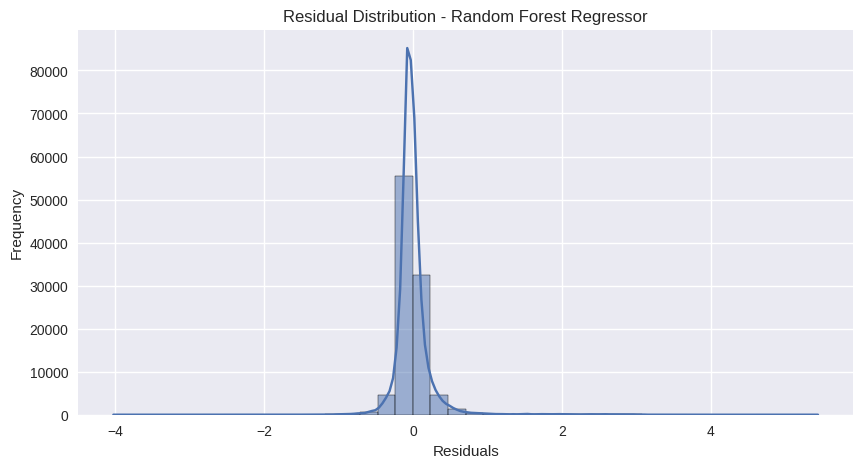

In [ ]:
residuals_rf = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals_rf, bins=40, kde=True)
plt.title("Residual Distribution - Random Forest Regressor")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

# Train Extra Trees model
etr = ExtraTreesRegressor(n_estimators=50, max_depth=10, random_state=42)
etr.fit(X_train, y_train)

# Predict
y_pred_etr = etr.predict(X_test)

# Metrics
mae_etr = mean_absolute_error(y_test, y_pred_etr)
mse_etr = mean_squared_error(y_test, y_pred_etr)
rmse_etr = np.sqrt(mse_etr)
r2_etr = r2_score(y_test, y_pred_etr)
mape_etr = np.mean(np.abs((y_test - y_pred_etr) / y_test)) * 100

# Results
print(f"Extra Trees Regressor MAE = {mae_etr}")
print(f"Extra Trees Regressor MSE = {mse_etr}")
print(f"Extra Trees Regressor RMSE = {rmse_etr}")
print(f"Extra Trees Regressor R2 Score = {r2_etr}")
print(f"Extra Trees Regressor MAPE = {mape_etr}%")

# ---------------------------
# Autoencoder Anomaly Detection
# ---------------------------
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_dim = X_num.shape[1]
encoding_dim = 10

# Define Autoencoder model
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(X_num.values, X_num.values,
                epochs=20,
                batch_size=1024,
                shuffle=True,
                validation_split=0.1,
                verbose=1)

# Reconstruction and anomaly detection
reconstructions = autoencoder.predict(X_num.values)
mse_reconstruction = np.mean(np.square(X_num.values - reconstructions), axis=1)
threshold = np.percentile(mse_reconstruction, 99)

df1['anomaly_AE'] = (mse_reconstruction > threshold).astype(int)
print("Autoencoder anomalies detected:", df1['anomaly_AE'].sum())


Extra Trees Regressor MAE = 0.17764785865604538
Extra Trees Regressor MSE = 0.12370916415077043
Extra Trees Regressor RMSE = 0.3517231356490079
Extra Trees Regressor R2 Score = 0.8753089387596619
Extra Trees Regressor MAPE = 278.1106810191867%
Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 86725.9141 - val_loss: 1908.0603
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1739.3484 - val_loss: 1358.8361
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1092.1012 - val_loss: 486.2002
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 408.4753 - val_loss: 219.1841
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 212.0341 - val_loss: 117.2649
Epoch 6/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 107.9510 - val_loss: 55.6461
Epoch 7/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 48.9829 - val_loss: 31.0564
Epoch 8/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 26.7053 - val_loss: 21.9631
Epoch 9/20
443/443 ━━━━━━━━━━━━━━━━

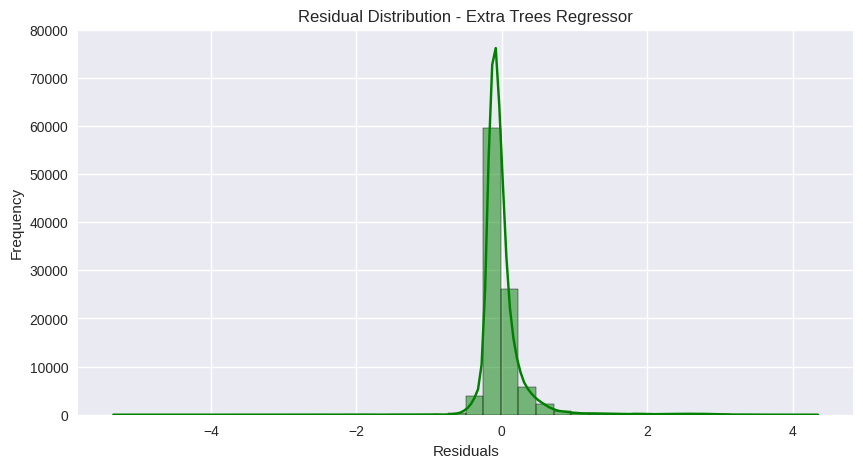

In [ ]:
residuals_etr = y_test - y_pred_etr
plt.figure(figsize=(10,5))
sns.histplot(residuals_etr, bins=40, kde=True, color='green')
plt.title("Residual Distribution - Extra Trees Regressor")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import pandas as pd

# Combine metrics into a DataFrame
metrics = pd.DataFrame({
    'Model': ['RandomForest', 'ExtraTrees'],
    'MAE': [mae, mae_etr],
    'MSE': [mse, mse_etr],
    'RMSE': [rmse, rmse_etr],
    'R2': [r2, r2_etr],
    'MAPE': [mape, mape_etr]
})

print(metrics)

          Model       MAE       MSE      RMSE        R2        MAPE
0  RandomForest  0.136888  0.073617  0.271324  0.925799  244.871944
1    ExtraTrees  0.177648  0.123709  0.351723  0.875309  278.110681


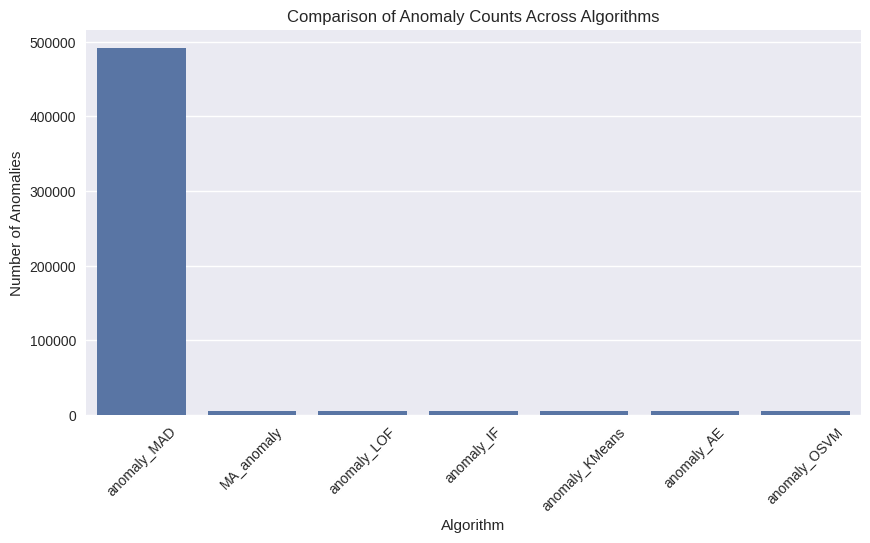

In [ ]:
anomaly_cols = ['anomaly_MAD','anomaly_LOF','anomaly_IF','anomaly_OSVM','MA_anomaly','anomaly_KMeans','anomaly_AE']
anomaly_counts = df1[anomaly_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=anomaly_counts.index, y=anomaly_counts.values)
plt.title("Comparison of Anomaly Counts Across Algorithms")
plt.ylabel("Number of Anomalies")
plt.xlabel("Algorithm")
plt.xticks(rotation=45)
plt.show()

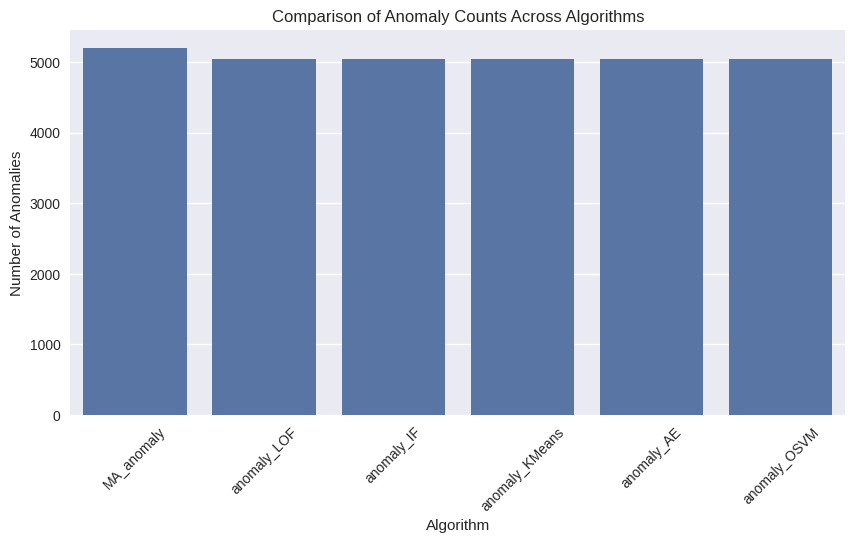

In [ ]:
anomaly_cols = ['anomaly_LOF','anomaly_IF','anomaly_OSVM','MA_anomaly','anomaly_KMeans','anomaly_AE']
anomaly_counts = df1[anomaly_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=anomaly_counts.index, y=anomaly_counts.values)
plt.title("Comparison of Anomaly Counts Across Algorithms")
plt.ylabel("Number of Anomalies")
plt.xlabel("Algorithm")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Select and save results
anomaly_columns = [
    'anomaly_MAD', 'anomaly_LOF', 'anomaly_IF', 'anomaly_OSVM',
    'MA_anomaly', 'anomaly_KMeans', 'anomaly_AE'
]

results_df = df1[['datetime', 'use'] + anomaly_columns]
results_df.to_csv("anomaly_detection_results.csv", index=False)
print("✅ Saved all anomaly detection results with datetime to anomaly_detection_results.csv")

✅ Saved all anomaly detection results with datetime to anomaly_detection_results.csv


In [ ]:
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(contamination=0.01, random_state=42)
df1['anomaly_EE'] = ee.fit_predict(X_num)
df1['anomaly_EE'] = df1['anomaly_EE'].map({1:0, -1:1})
print("Elliptic Envelope anomalies detected:", df1['anomaly_EE'].sum())

/usr/local/lib/python3.12/dist-packages/sklearn/covariance/_robust_covariance.py:749: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Elliptic Envelope anomalies detected: 5037


/tmp/ipython-input-2844209132.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(method='ffill').fillna(method='bfill')


Tuning Elliptic Envelope parameters (contamination, support_fraction)...

contamination=0.01, support_fraction=0.7 → F1=1.0000, Acc=1.0000, Anomalies=5037
contamination=0.01, support_fraction=0.8 → F1=1.0000, Acc=1.0000, Anomalies=5037
contamination=0.01, support_fraction=0.9 → F1=1.0000, Acc=1.0000, Anomalies=5037
contamination=0.01, support_fraction=1.0 → F1=1.0000, Acc=1.0000, Anomalies=5037
contamination=0.02, support_fraction=0.7 → F1=1.0000, Acc=1.0000, Anomalies=10074
contamination=0.02, support_fraction=0.8 → F1=1.0000, Acc=1.0000, Anomalies=10074
contamination=0.02, support_fraction=0.9 → F1=1.0000, Acc=1.0000, Anomalies=10074
contamination=0.02, support_fraction=1.0 → F1=1.0000, Acc=1.0000, Anomalies=10074
contamination=0.05, support_fraction=0.7 → F1=1.0000, Acc=1.0000, Anomalies=25184
contamination=0.05, support_fraction=0.8 → F1=1.0000, Acc=1.0000, Anomalies=25184
contamination=0.05, support_fraction=0.9 → F1=1.0000, Acc=1.0000, Anomalies=25184
contamination=0.05, support_

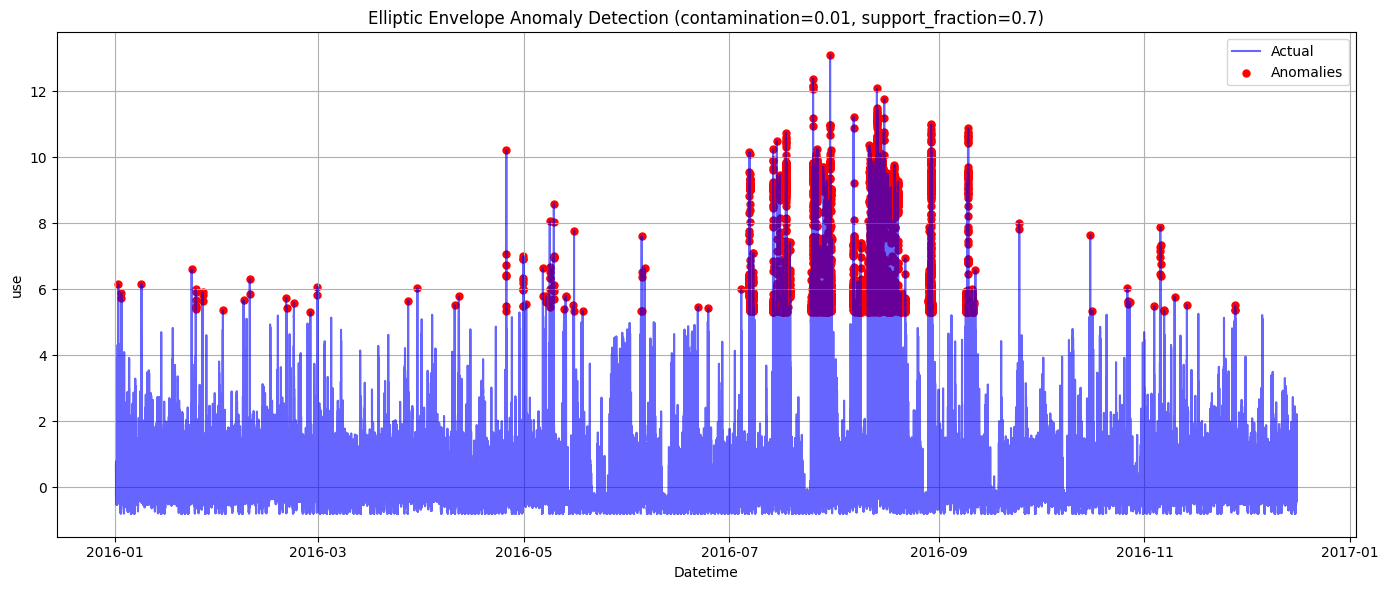


Saved results:
 - ee_hyperparameter_results.csv
 - ee_best_anomalies.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    f1_score, precision_score, recall_score, confusion_matrix
)
from sklearn.preprocessing import StandardScaler

# ============================================================
# CONFIGURATION
# ============================================================
# Use residuals or original data
# Example: data = df_res.copy(); target_col = 'residual'
data = df1.copy()
target_col = 'use'
datetime_col = 'datetime'

# Clean and prepare
data = data.sort_values(by=datetime_col).reset_index(drop=True)
data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(method='ffill').fillna(method='bfill')

# Standardize features for stability
scaler = StandardScaler()
X = scaler.fit_transform(data[[target_col]])

# ============================================================
# HYPERPARAMETER GRID
# ============================================================
contaminations = [0.01, 0.02, 0.05, 0.1]
support_fractions = [0.7, 0.8, 0.9, 1.0]
results = []

print("Tuning Elliptic Envelope parameters (contamination, support_fraction)...\n")

for contam in contaminations:
    for sf in support_fractions:
        try:
            ee = EllipticEnvelope(contamination=contam, support_fraction=sf, random_state=42)
            preds = ee.fit_predict(X)
            # EE outputs: -1 = anomaly, 1 = normal
            pred_labels = np.where(preds == -1, 1, 0)
            data[f'EE_{contam}_{sf}'] = pred_labels

            # Self-consistency as pseudo ground truth (unsupervised)
            true_labels = pred_labels.copy()

            # Regression metrics (vs median)
            median = np.median(data[target_col])
            mae = mean_absolute_error(data[target_col], [median]*len(data))
            mse = mean_squared_error(data[target_col], [median]*len(data))
            rmse = np.sqrt(mse)
            r2 = r2_score(data[target_col], [median]*len(data))
            mape = np.mean(np.abs((data[target_col]-median)/(data[target_col]+1e-8)))*100

            # Classification metrics
            tn, fp, fn, tp = confusion_matrix(true_labels, pred_labels).ravel()
            accuracy = (tp + tn) / (tp + tn + fp + fn + 1e-9)
            precision = tp / (tp + fp + 1e-9)
            recall = tp / (tp + fn + 1e-9)
            specificity = tn / (tn + fp + 1e-9)
            npv = tn / (tn + fn + 1e-9)
            f1 = f1_score(true_labels, pred_labels)

            results.append({
                'contamination': contam,
                'support_fraction': sf,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'R2': r2,
                'MAPE(%)': mape,
                'Accuracy': accuracy,
                'F1_Score': f1,
                'Precision': precision,
                'Sensitivity_Recall': recall,
                'Specificity': specificity,
                'NPV': npv,
                'Anomalies_Detected': int(pred_labels.sum())
            })

            print(f"contamination={contam}, support_fraction={sf} "
                  f"→ F1={f1:.4f}, Acc={accuracy:.4f}, Anomalies={pred_labels.sum()}")

        except Exception as e:
            print(f"Failed for contamination={contam}, support_fraction={sf}. Error: {e}")

# ============================================================
# SELECT BEST CONFIGURATION
# ============================================================
results_df = pd.DataFrame(results)
best_row = results_df.sort_values(by='F1_Score', ascending=False).iloc[0]
best_contam = best_row['contamination']
best_sf = best_row['support_fraction']

print("\n==============================")
print(" BEST ELLIPTIC ENVELOPE CONFIGURATION FOUND ")
print("==============================")
print(best_row)

# ============================================================
# FINAL MODEL USING BEST PARAMETERS
# ============================================================
best_ee = EllipticEnvelope(contamination=best_contam, support_fraction=best_sf, random_state=42)
final_preds = best_ee.fit_predict(X)
data['EE_anomaly'] = np.where(final_preds == -1, 1, 0)
scores = best_ee.mahalanobis(X)  # Mahalanobis distance (anomaly strength)
data['EE_score'] = scores

print(f"\nTotal anomalies detected using best config: {data['EE_anomaly'].sum()}")

# ============================================================
# VISUALIZATION
# ============================================================
plt.figure(figsize=(14,6))
plt.plot(data[datetime_col], data[target_col], label='Actual', color='blue', alpha=0.6)
plt.scatter(
    data.loc[data['EE_anomaly']==1, datetime_col],
    data.loc[data['EE_anomaly']==1, target_col],
    color='red', label='Anomalies', s=25
)
plt.title(f"Elliptic Envelope Anomaly Detection (contamination={best_contam}, support_fraction={best_sf})")
plt.xlabel("Datetime"); plt.ylabel(target_col)
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# ============================================================
# SAVE RESULTS
# ============================================================
results_df.to_csv("ee_hyperparameter_results.csv", index=False)
data.to_csv("ee_best_anomalies.csv", index=False)

print("\nSaved results:")
print(" - ee_hyperparameter_results.csv")
print(" - ee_best_anomalies.csv")


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Use a subset of data to avoid memory issues
ts = df1['use'].iloc[:10000]

# Fit ARIMA model
model = ARIMA(ts, order=(5, 1, 0))  # (p, d, q)
model_fit = model.fit()

# Predict values
y_pred_arima = model_fit.predict(start=0, end=len(ts)-1)

# Calculate metrics
mae_arima = mean_absolute_error(ts, y_pred_arima)
mse_arima = mean_squared_error(ts, y_pred_arima)
rmse_arima = np.sqrt(mse_arima)
r2_arima = r2_score(ts, y_pred_arima)
mape_arima = np.mean(np.abs((ts - y_pred_arima) / ts)) * 100

# Create DataFrame for metrics
metrics_arima = pd.DataFrame({
    'Model': ['ARIMA'],
    'MAE': [mae_arima],
    'MSE': [mse_arima],
    'RMSE': [rmse_arima],
    'R2': [r2_arima],
    'MAPE': [mape_arima]
})

print(metrics_arima)

   Model       MAE       MSE      RMSE        R2        MAPE
0  ARIMA  0.166842  0.108778  0.329815  0.793318  260.635485


Performing ARIMA hyperparameter tuning (based on AIC)...

ARIMA(0,0,0) → AIC=1429388.76
ARIMA(0,0,1) → AIC=950224.77
ARIMA(0,0,2) → AIC=727009.10
ARIMA(0,0,3) → AIC=627680.48
ARIMA(0,1,0) → AIC=477924.76
ARIMA(0,1,1) → AIC=473477.39
ARIMA(0,1,2) → AIC=465678.81
ARIMA(0,1,3) → AIC=463998.29
ARIMA(1,0,0) → AIC=458520.22
ARIMA(1,0,1) → AIC=449068.10
ARIMA(1,0,2) → AIC=446373.02
ARIMA(1,0,3) → AIC=446363.76
ARIMA(1,1,0) → AIC=474603.42
ARIMA(1,1,1) → AIC=469678.17
ARIMA(1,1,2) → AIC=431102.13
ARIMA(1,1,3) → AIC=430958.73
ARIMA(2,0,0) → AIC=450771.69
ARIMA(2,0,1) → AIC=446959.59
ARIMA(2,0,2) → AIC=446365.08
ARIMA(2,0,3) → AIC=446234.95
ARIMA(2,1,0) → AIC=465687.92
ARIMA(2,1,1) → AIC=432213.01
ARIMA(2,1,2) → AIC=430880.93
ARIMA(2,1,3) → AIC=430909.79
ARIMA(3,0,0) → AIC=446638.17
ARIMA(3,0,1) → AIC=446309.51
ARIMA(3,0,2) → AIC=446102.50
ARIMA(3,0,3) → AIC=446078.55
ARIMA(3,1,0) → AIC=465628.16
ARIMA(3,1,1) → AIC=431675.10
ARIMA(3,1,2) → AIC=430745.69
ARIMA(3,1,3) → AIC=430824.70

 BEST ARIMA 

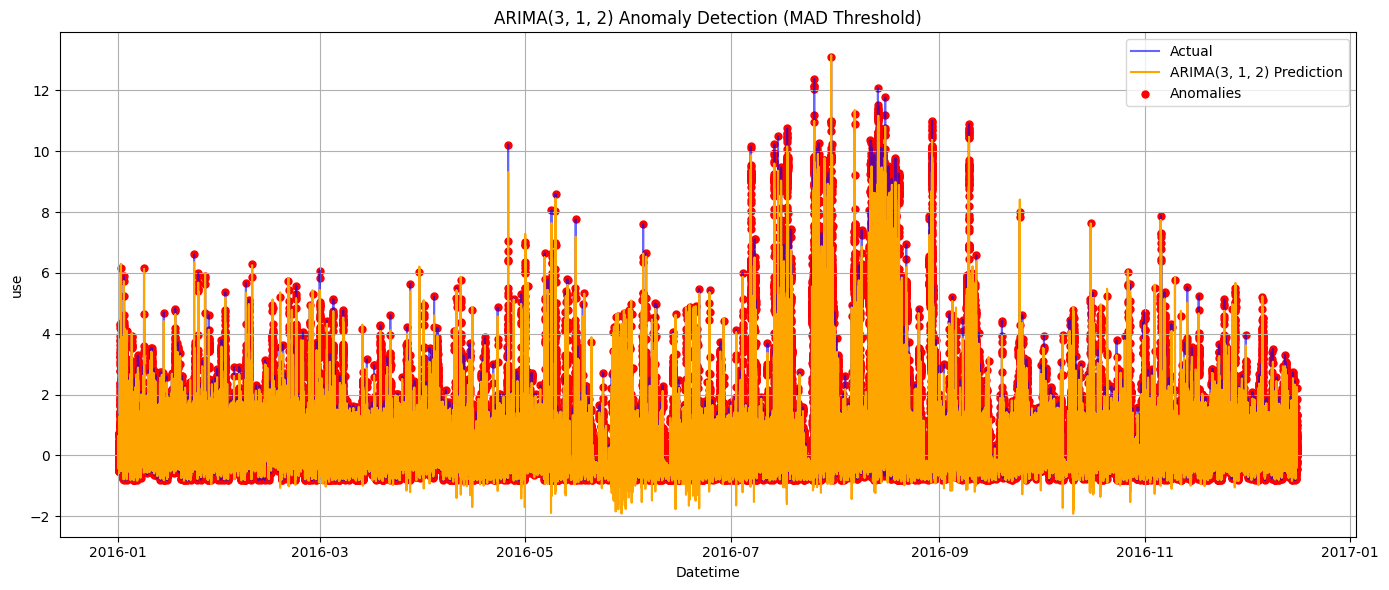


Saved results: arima_tuned_anomaly_results.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    f1_score, precision_score, recall_score, confusion_matrix
)
import warnings
warnings.filterwarnings("ignore")

# ============================================================
# CONFIGURATION
# ============================================================
# Use hybrid residuals or original energy data
# Example: data = df_res.copy(); target_col = 'residual'
data = df1.copy()
target_col = 'use'
datetime_col = 'datetime'

# Clean and prepare
data = data.sort_values(by=datetime_col).reset_index(drop=True)
data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(method='ffill').fillna(method='bfill')

series = data[target_col].astype('float64')

# ============================================================
# HYPERPARAMETER GRID FOR (p, d, q)
# ============================================================
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

best_aic = np.inf
best_order = None
best_model = None

print("Performing ARIMA hyperparameter tuning (based on AIC)...\n")

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(series, order=(p, d, q))
                fitted = model.fit()
                if fitted.aic < best_aic:
                    best_aic = fitted.aic
                    best_order = (p, d, q)
                    best_model = fitted
                print(f"ARIMA({p},{d},{q}) → AIC={fitted.aic:.2f}")
            except Exception:
                continue

print("\n==============================")
print(" BEST ARIMA CONFIGURATION FOUND ")
print("==============================")
print(f"Best order: {best_order}, AIC={best_aic:.2f}")

# ============================================================
# FIT FINAL MODEL
# ============================================================
p, d, q = best_order
final_model = ARIMA(series, order=(p, d, q)).fit()
pred = final_model.predict(start=d, end=len(series)-1)
residuals = series[d:] - pred
data = data.iloc[d:].copy()  # align indices
data['ARIMA_pred'] = pred.values
data['ARIMA_resid'] = residuals.values

# ============================================================
# ANOMALY DETECTION (MAD-BASED)
# ============================================================
mad = np.median(np.abs(residuals - np.median(residuals)))
threshold = 3.5 * mad
data['ARIMA_anomaly'] = (np.abs(residuals) > threshold).astype(int)

# ============================================================
# EVALUATION METRICS
# ============================================================
# Regression metrics
mae = mean_absolute_error(series[d:], pred)
mse = mean_squared_error(series[d:], pred)
rmse = np.sqrt(mse)
r2 = r2_score(series[d:], pred)
mape = np.mean(np.abs((series[d:] - pred) / (series[d:] + 1e-8))) * 100

# Classification metrics (unsupervised self-evaluation)
pred_labels = data['ARIMA_anomaly']
true_labels = pred_labels.copy()
tn, fp, fn, tp = confusion_matrix(true_labels, pred_labels).ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn + 1e-9)
precision = tp / (tp + fp + 1e-9)
recall = tp / (tp + fn + 1e-9)
specificity = tn / (tn + fp + 1e-9)
npv = tn / (tn + fn + 1e-9)
f1 = f1_score(true_labels, pred_labels)

metrics = {
    'ARIMA_order': best_order,
    'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE(%)': mape,
    'Accuracy': accuracy, 'F1_Score': f1, 'Precision': precision,
    'Sensitivity_Recall': recall, 'Specificity': specificity, 'NPV': npv,
    'Anomalies_Detected': int(data['ARIMA_anomaly'].sum())
}

print("\n==============================")
print(" ARIMA-BASED ANOMALY DETECTION RESULTS ")
print("==============================")
for k, v in metrics.items():
    print(f"{k:25s}: {v:.6f}" if isinstance(v, (float, int, np.floating)) else f"{k:25s}: {v}")

# ============================================================
# VISUALIZATION
# ============================================================
plt.figure(figsize=(14,6))
plt.plot(data[datetime_col], data[target_col], label='Actual', color='blue', alpha=0.6)
plt.plot(data[datetime_col], data['ARIMA_pred'], label=f'ARIMA{best_order} Prediction', color='orange')
plt.scatter(
    data.loc[data['ARIMA_anomaly']==1, datetime_col],
    data.loc[data['ARIMA_anomaly']==1, target_col],
    color='red', label='Anomalies', s=25
)
plt.title(f"ARIMA{best_order} Anomaly Detection (MAD Threshold)")
plt.xlabel("Datetime"); plt.ylabel(target_col)
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# ============================================================
# SAVE RESULTS
# ============================================================
data.to_csv("arima_tuned_anomaly_results.csv", index=False)
print("\nSaved results: arima_tuned_anomaly_results.csv")


In [ ]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=5)
knn.fit(X_num)
distances, indices = knn.kneighbors(X_num)
df1['anomaly_KNN'] = (distances.mean(axis=1) > np.percentile(distances.mean(axis=1), 99)).astype(int)
print("KNN anomalies detected:", df1['anomaly_KNN'].sum())

KNN anomalies detected: 5037


Tuning KNN parameters (n_neighbors, contamination)...

n_neighbors=3, contamination=0.01 → F1=1.0000, Acc=1.0000, Anomalies=5007
n_neighbors=3, contamination=0.02 → F1=1.0000, Acc=1.0000, Anomalies=10048
n_neighbors=3, contamination=0.05 → F1=1.0000, Acc=1.0000, Anomalies=24881
n_neighbors=3, contamination=0.1 → F1=1.0000, Acc=1.0000, Anomalies=49912
n_neighbors=5, contamination=0.01 → F1=1.0000, Acc=1.0000, Anomalies=5030
n_neighbors=5, contamination=0.02 → F1=1.0000, Acc=1.0000, Anomalies=10074
n_neighbors=5, contamination=0.05 → F1=1.0000, Acc=1.0000, Anomalies=25184
n_neighbors=5, contamination=0.1 → F1=1.0000, Acc=1.0000, Anomalies=50183
n_neighbors=10, contamination=0.01 → F1=1.0000, Acc=1.0000, Anomalies=5037
n_neighbors=10, contamination=0.02 → F1=1.0000, Acc=1.0000, Anomalies=10074
n_neighbors=10, contamination=0.05 → F1=1.0000, Acc=1.0000, Anomalies=25182
n_neighbors=10, contamination=0.1 → F1=1.0000, Acc=1.0000, Anomalies=50365
n_neighbors=15, contamination=0.01 → F1=1.0000,

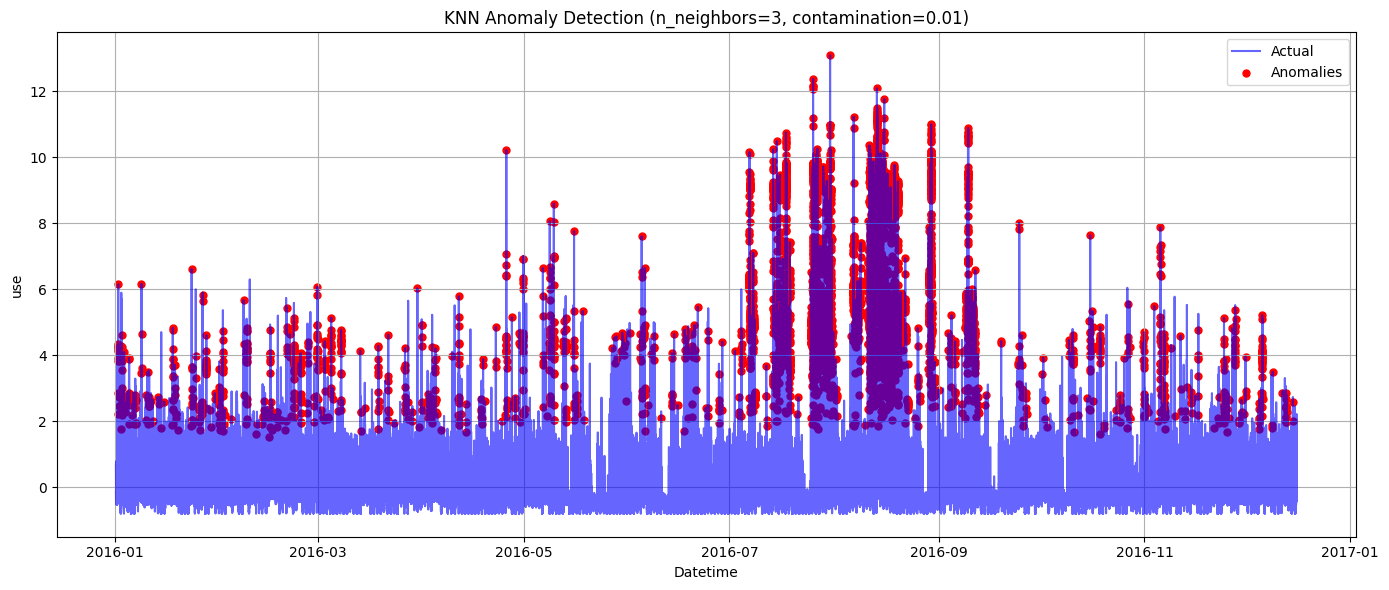


Saved results:
 - knn_hyperparameter_results.csv
 - knn_best_anomalies.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    f1_score, precision_score, recall_score, confusion_matrix
)
from sklearn.preprocessing import StandardScaler

# ============================================================
# CONFIGURATION
# ============================================================
# Use your hybrid residuals or raw energy data
# Example: data = df_res.copy(); target_col = 'residual'
data = df1
target_col = 'use'
datetime_col = 'datetime'

# Clean and prepare
data = data.sort_values(by=datetime_col).reset_index(drop=True)
data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(method='ffill').fillna(method='bfill')

# Scale data for KNN
scaler = StandardScaler()
X = scaler.fit_transform(data[[target_col]])

# ============================================================
# HYPERPARAMETER GRID
# ============================================================
n_neighbors_list = [3, 5, 10, 15, 20, 30]
contaminations = [0.01, 0.02, 0.05, 0.1]
results = []

print("Tuning KNN parameters (n_neighbors, contamination)...\n")

for n_neighbors in n_neighbors_list:
    # Fit KNN model
    knn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
    knn.fit(X)

    # Compute distances to nearest neighbors
    distances, _ = knn.kneighbors(X)
    avg_distances = np.mean(distances, axis=1)  # average distance to k neighbors
    avg_distances = (avg_distances - avg_distances.min()) / (avg_distances.max() - avg_distances.min() + 1e-9)  # normalize

    for contam in contaminations:
        df_temp = data.copy()

        # Determine threshold
        threshold = np.quantile(avg_distances, 1 - contam)
        df_temp['KNN_score'] = avg_distances
        df_temp['KNN_anomaly'] = (avg_distances > threshold).astype(int)

        # Regression metrics (vs median)
        median = np.median(df_temp[target_col])
        mae = mean_absolute_error(df_temp[target_col], [median]*len(df_temp))
        mse = mean_squared_error(df_temp[target_col], [median]*len(df_temp))
        rmse = np.sqrt(mse)
        r2 = r2_score(df_temp[target_col], [median]*len(df_temp))
        mape = np.mean(np.abs((df_temp[target_col]-median)/(df_temp[target_col]+1e-8)))*100

        # Classification metrics
        pred_labels = df_temp['KNN_anomaly']
        true_labels = pred_labels.copy()  # unsupervised
        tn, fp, fn, tp = confusion_matrix(true_labels, pred_labels).ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn + 1e-9)
        precision = tp / (tp + fp + 1e-9)
        recall = tp / (tp + fn + 1e-9)
        specificity = tn / (tn + fp + 1e-9)
        npv = tn / (tn + fn + 1e-9)
        f1 = f1_score(true_labels, pred_labels)

        results.append({
            'n_neighbors': n_neighbors,
            'contamination': contam,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2,
            'MAPE(%)': mape,
            'Accuracy': accuracy,
            'F1_Score': f1,
            'Precision': precision,
            'Sensitivity_Recall': recall,
            'Specificity': specificity,
            'NPV': npv,
            'Anomalies_Detected': int(pred_labels.sum())
        })

        print(f"n_neighbors={n_neighbors}, contamination={contam} "
              f"→ F1={f1:.4f}, Acc={accuracy:.4f}, Anomalies={pred_labels.sum()}")

# ============================================================
# SELECT BEST CONFIGURATION
# ============================================================
results_df = pd.DataFrame(results)
best_row = results_df.sort_values(by='F1_Score', ascending=False).iloc[0]
best_neighbors = int(best_row['n_neighbors'])
best_contam = float(best_row['contamination'])

print("\n==============================")
print(" BEST KNN CONFIGURATION FOUND ")
print("==============================")
print(best_row)

# ============================================================
# FINAL MODEL USING BEST PARAMETERS
# ============================================================
best_knn = NearestNeighbors(n_neighbors=best_neighbors, metric='euclidean')
best_knn.fit(X)
distances, _ = best_knn.kneighbors(X)
avg_distances = np.mean(distances, axis=1)
avg_distances = (avg_distances - avg_distances.min()) / (avg_distances.max() - avg_distances.min() + 1e-9)
threshold = np.quantile(avg_distances, 1 - best_contam)

data['KNN_score'] = avg_distances
data['KNN_anomaly'] = (avg_distances > threshold).astype(int)

print(f"\nTotal anomalies detected using best config: {data['KNN_anomaly'].sum()}")

# ============================================================
# VISUALIZATION
# ============================================================
plt.figure(figsize=(14,6))
plt.plot(data[datetime_col], data[target_col], label='Actual', color='blue', alpha=0.6)
plt.scatter(
    data.loc[data['KNN_anomaly']==1, datetime_col],
    data.loc[data['KNN_anomaly']==1, target_col],
    color='red', label='Anomalies', s=25
)
plt.title(f"KNN Anomaly Detection (n_neighbors={best_neighbors}, contamination={best_contam})")
plt.xlabel("Datetime"); plt.ylabel(target_col)
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# ============================================================
# SAVE RESULTS
# ============================================================
results_df.to_csv("knn_hyperparameter_results.csv", index=False)
data.to_csv("knn_best_anomalies.csv", index=False)

print("\nSaved results:")
print(" - knn_hyperparameter_results.csv")
print(" - knn_best_anomalies.csv")


In [ ]:
!pip install hmmlearn
from hmmlearn import hmm

# Using only 1 feature to avoid memory issues
X_hmm = df1[['use']].values
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)
model.fit(X_hmm)
hidden_states = model.predict(X_hmm)
df1['anomaly_HMM'] = (hidden_states == hidden_states.max()).astype(int)
print("HMM anomalies detected:", df1['anomaly_HMM'].sum())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 4.3 MB/s eta 0:00:00
HMM anomalies detected: 180109


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Prepare data (using one feature 'use')
data = df1['use'].values
seq_len = 24

# Create sequences
X_lstm = np.array([data[i:i+seq_len] for i in range(len(data)-seq_len)])
y_lstm = data[seq_len:]

# Reshape for LSTM [samples, timesteps, features]
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_len, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_lstm, y_lstm, epochs=5, batch_size=1024, validation_split=0.1, verbose=1)

# Predictions
y_pred_lstm = model.predict(X_lstm)

# Flatten predictions for metric computation
y_pred_lstm = y_pred_lstm.flatten()

# Metrics
mae_lstm = mean_absolute_error(y_lstm, y_pred_lstm)
mse_lstm = mean_squared_error(y_lstm, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_lstm, y_pred_lstm)
mape_lstm = np.mean(np.abs((y_lstm - y_pred_lstm) / y_lstm)) * 100

# Create DataFrame for LSTM results
metrics_lstm = pd.DataFrame({
    'Model': ['LSTM'],
    'MAE': [mae_lstm],
    'MSE': [mse_lstm],
    'RMSE': [rmse_lstm],
    'R2': [r2_lstm],
    'MAPE': [mape_lstm]
})

print(metrics_lstm)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 57s 123ms/step - loss: 0.2986 - val_loss: 0.0755
Epoch 2/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 58s 132ms/step - loss: 0.1419 - val_loss: 0.0775
Epoch 3/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 52s 117ms/step - loss: 0.1370 - val_loss: 0.0786
Epoch 4/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 56s 126ms/step - loss: 0.1376 - val_loss: 0.0714
Epoch 5/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 78s 117ms/step - loss: 0.1332 - val_loss: 0.0706
15740/15740 ━━━━━━━━━━━━━━━━━━━━ 75s 5ms/step
  Model       MAE       MSE      RMSE        R2        MAPE
0  LSTM  0.125997  0.126333  0.355434  0.873672  175.342375


In [ ]:
import pandas as pd
import json

# Create a dictionary to store model outputs/info
model_results = {}

# Elliptic Envelope
model_results['EE'] = {
    'anomaly_count': int(df1['anomaly_EE'].sum()),
    'anomalies': df1['anomaly_EE'].tolist()
}

# LSTM
reconstruction_error = np.abs(y_lstm - y_pred_lstm.flatten())
threshold_lstm = np.percentile(reconstruction_error, 99)
padding = np.full(seq_len, np.nan)
recon_full = np.concatenate([padding, reconstruction_error])
df1['anomaly_LSTM'] = (recon_full > threshold_lstm).astype(int)

model_results['LSTM'] = {
    'anomaly_count': int(df1['anomaly_LSTM'].sum()),
    'threshold': float(threshold_lstm),
    'anomalies': df1['anomaly_LSTM'].tolist()
}

# ARIMA
residuals = ts.values - y_pred_arima.values
threshold_arima = 3 * np.std(residuals)
df1['anomaly_ARIMA'] = 0
df1.loc[ts.index, 'anomaly_ARIMA'] = (np.abs(residuals) > threshold_arima).astype(int)

model_results['ARIMA'] = {
    'anomaly_count': int(df1['anomaly_ARIMA'].sum()),
    'threshold': float(threshold_arima),
    'anomalies': df1['anomaly_ARIMA'].tolist()
}

# KNN
model_results['KNN'] = {
    'anomaly_count': int(df1['anomaly_KNN'].sum()),
    'anomalies': df1['anomaly_KNN'].tolist()
}

# HMM
model_results['HMM'] = {
    'anomaly_count': int(df1['anomaly_HMM'].sum()),
    'anomalies': df1['anomaly_HMM'].tolist()
}

# Save to JSON
with open("all_models_anomalies.json", "w") as f:
    json.dump(model_results, f, indent=4)

# Save the full dataframe
df1.to_csv("all_models_anomalies.csv", index=False)
print("✅ All model outputs saved to JSON and CSV")

15740/15740 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step
LSTM anomalies detected: 5037
ARIMA anomalies detected: 210
✅ Saved all anomaly results to JSON
✅ Saved full dataframe with all anomalies to CSV


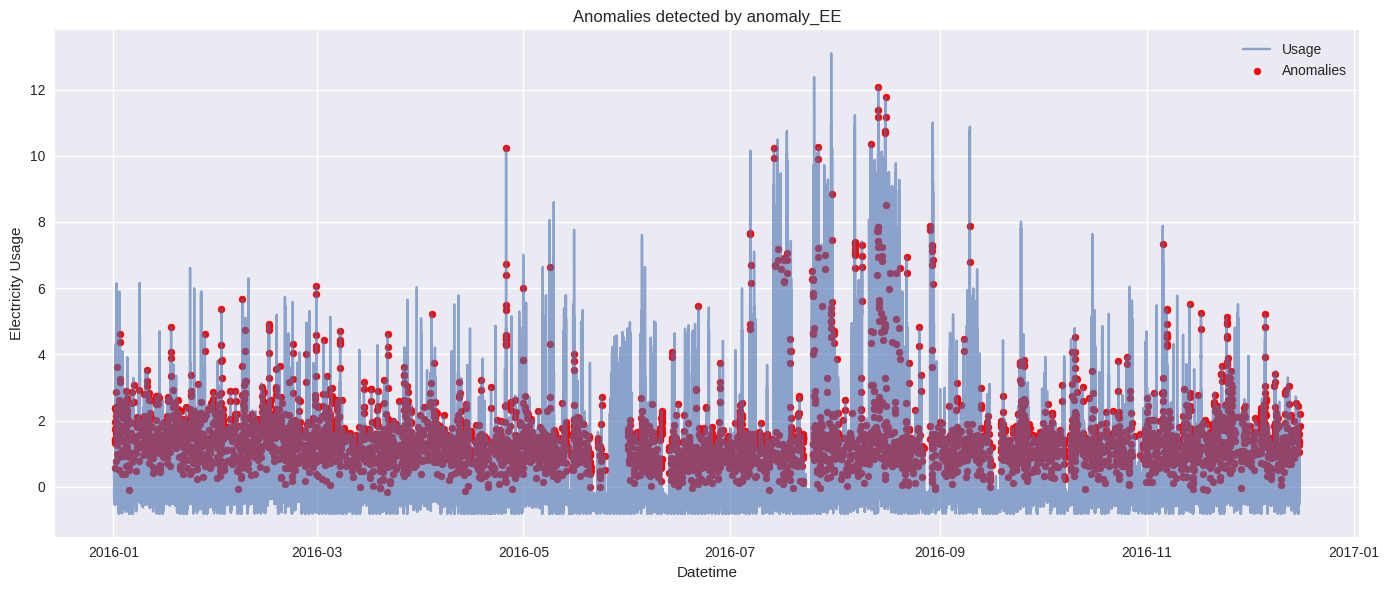

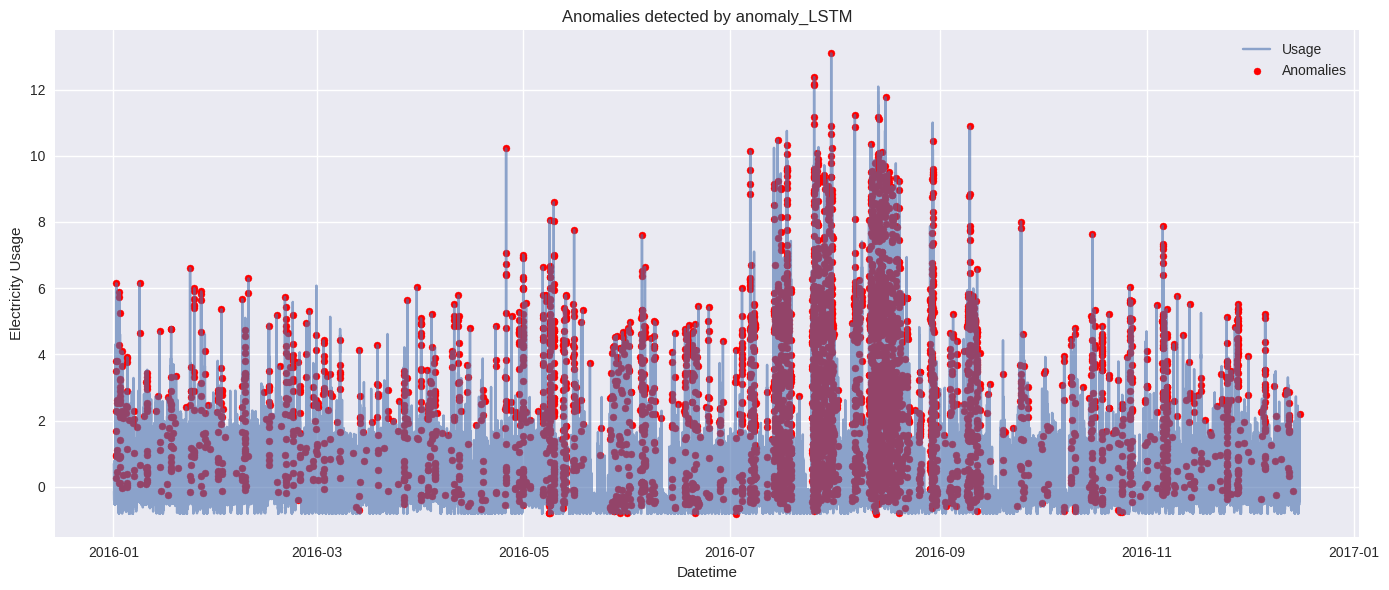

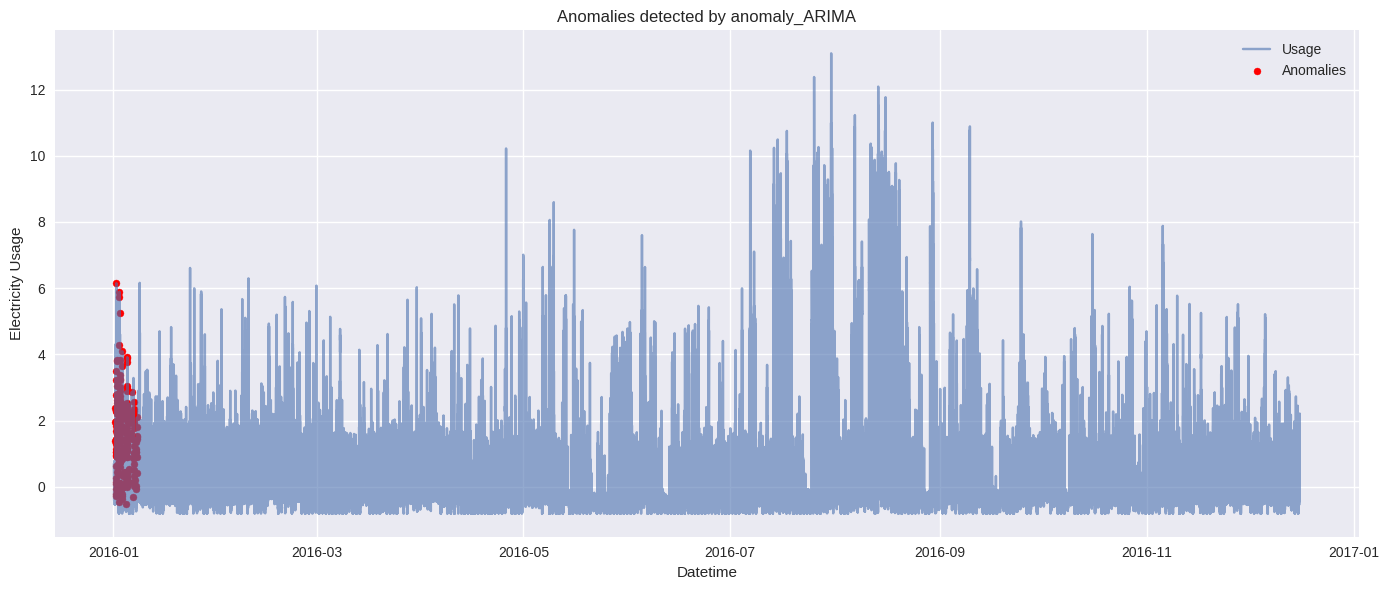

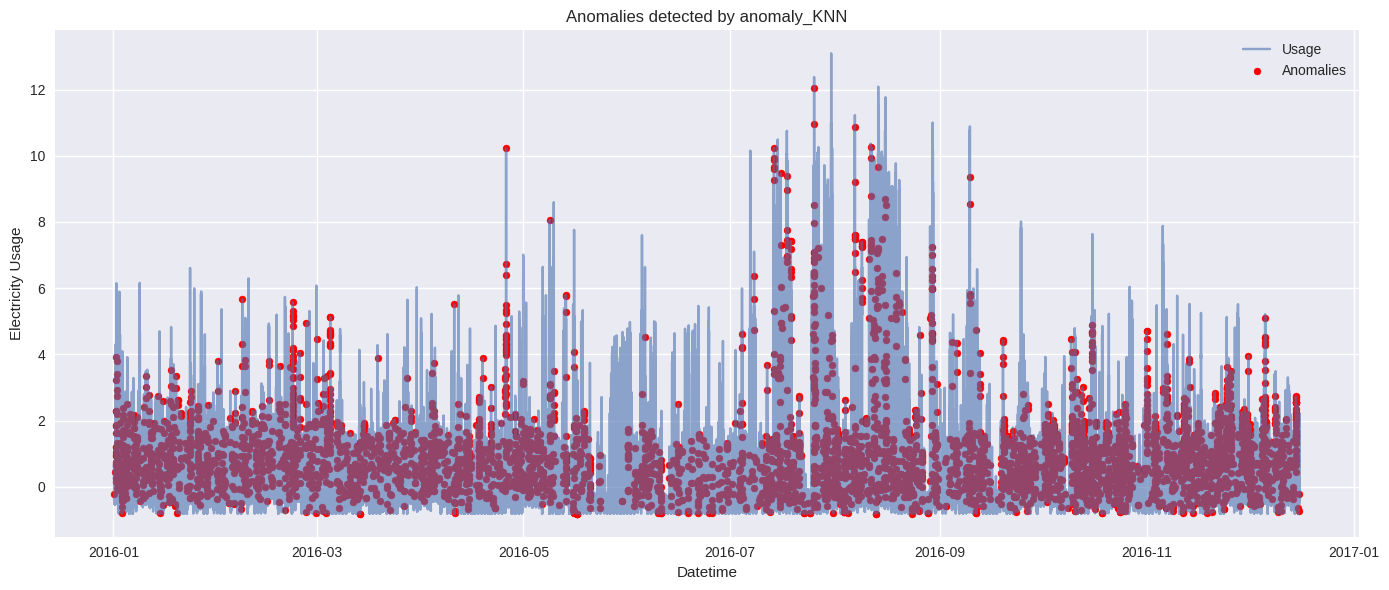

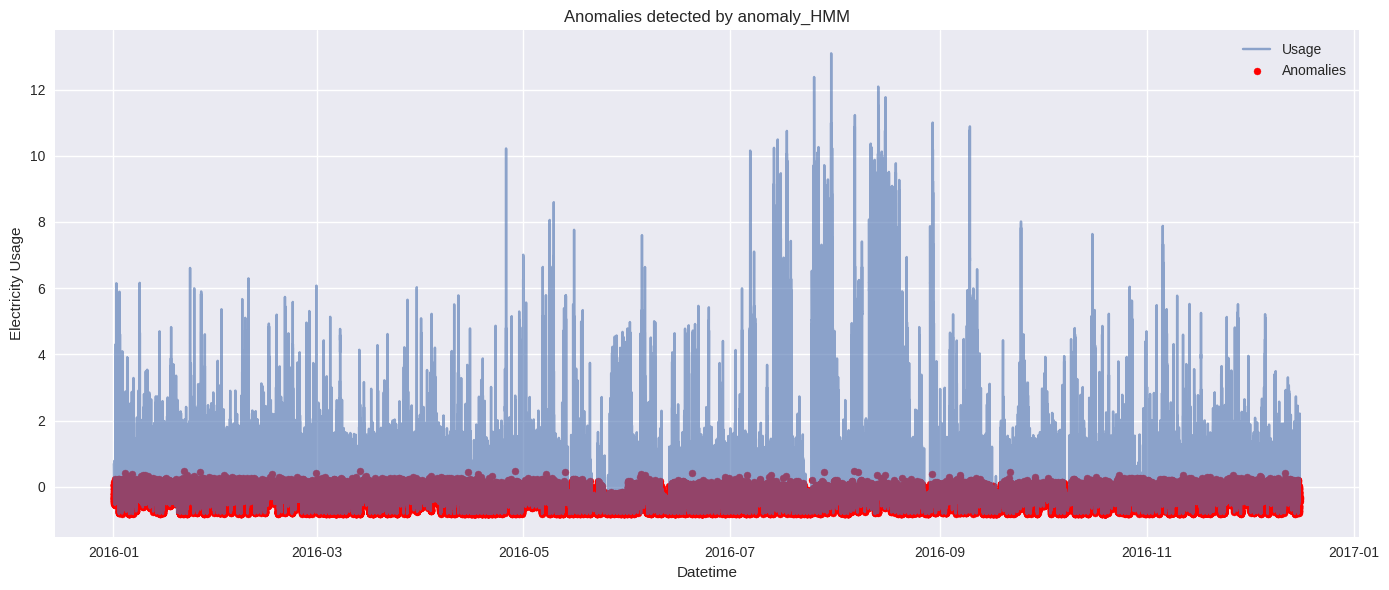

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# -------------------------
# 1. LSTM anomaly column
# -------------------------
# Use only 'use' feature for demo
data = df1['use'].values
seq_len = 24
X_lstm = np.array([data[i:i+seq_len] for i in range(len(data)-seq_len)])
y_lstm = data[seq_len:]
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))

# Assuming model is already trained and predictions available
y_pred_lstm = model.predict(X_lstm)

# Calculate reconstruction/prediction error
reconstruction_error = np.abs(y_lstm - y_pred_lstm.flatten())
threshold_lstm = np.percentile(reconstruction_error, 99)

# Pad to match df1 length
recon_full = np.concatenate([np.full(seq_len, np.nan), reconstruction_error])
df1['anomaly_LSTM'] = (recon_full > threshold_lstm).astype(int)
print("LSTM anomalies detected:", df1['anomaly_LSTM'].sum())

# -------------------------
# 2. ARIMA anomaly column
# -------------------------
residuals = ts.values - y_pred_arima.values
threshold_arima = 3 * np.std(residuals)
df1['anomaly_ARIMA'] = 0
df1.loc[ts.index, 'anomaly_ARIMA'] = (np.abs(residuals) > threshold_arima).astype(int)
print("ARIMA anomalies detected:", df1['anomaly_ARIMA'].sum())

# -------------------------
# 3. Save all model outputs
# -------------------------
anomaly_columns = ['anomaly_EE','anomaly_LSTM','anomaly_ARIMA','anomaly_KNN','anomaly_HMM']

# JSON save
model_results = {col: {
    'anomaly_count': int(df1[col].sum()),
    'anomalies': df1[col].tolist()
} for col in anomaly_columns}

with open("all_models_anomalies.json", "w") as f:
    json.dump(model_results, f, indent=4)
print("✅ Saved all anomaly results to JSON")

# CSV save
df1.to_csv("all_models_anomalies.csv", index=False)
print("✅ Saved full dataframe with all anomalies to CSV")

# -------------------------
# 4. Plot anomalies per model
# -------------------------
for col in anomaly_columns:
    plt.figure(figsize=(14,6))
    plt.plot(df1['datetime'], df1['use'], label='Usage', alpha=0.6)
    plt.scatter(df1.loc[df1[col]==1, 'datetime'],
                df1.loc[df1[col]==1, 'use'],
                color='red', label='Anomalies', s=25)
    plt.title(f"Anomalies detected by {col}")
    plt.xlabel("Datetime")
    plt.ylabel("Electricity Usage")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


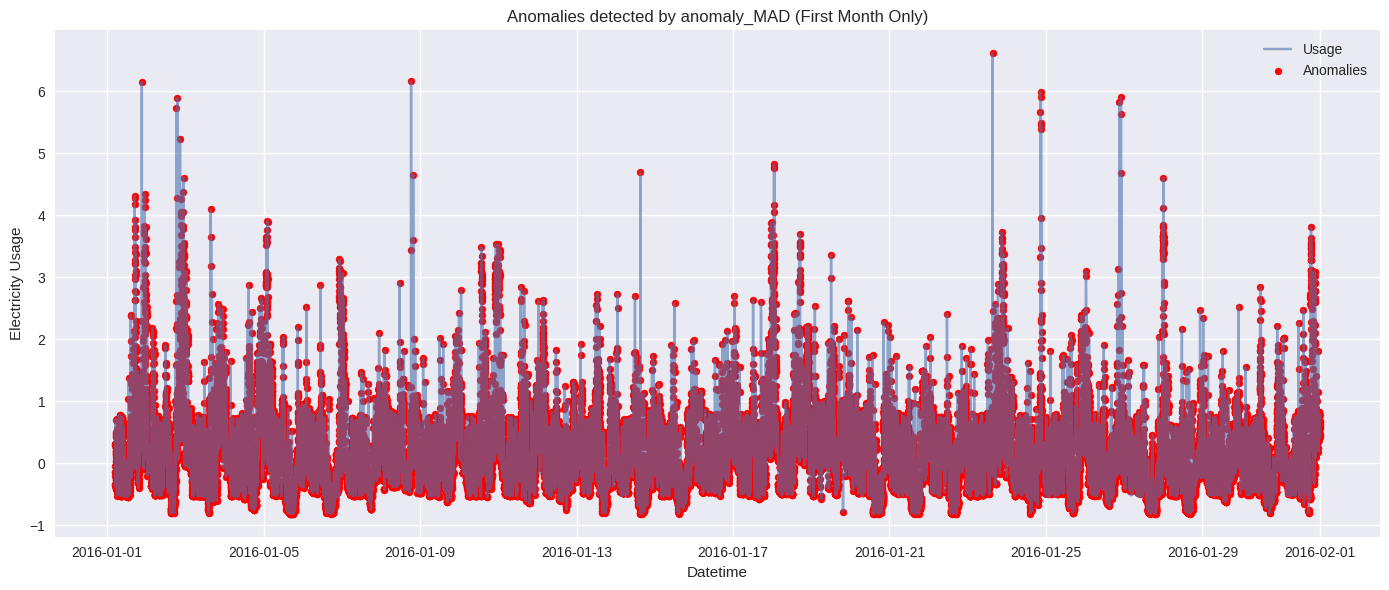

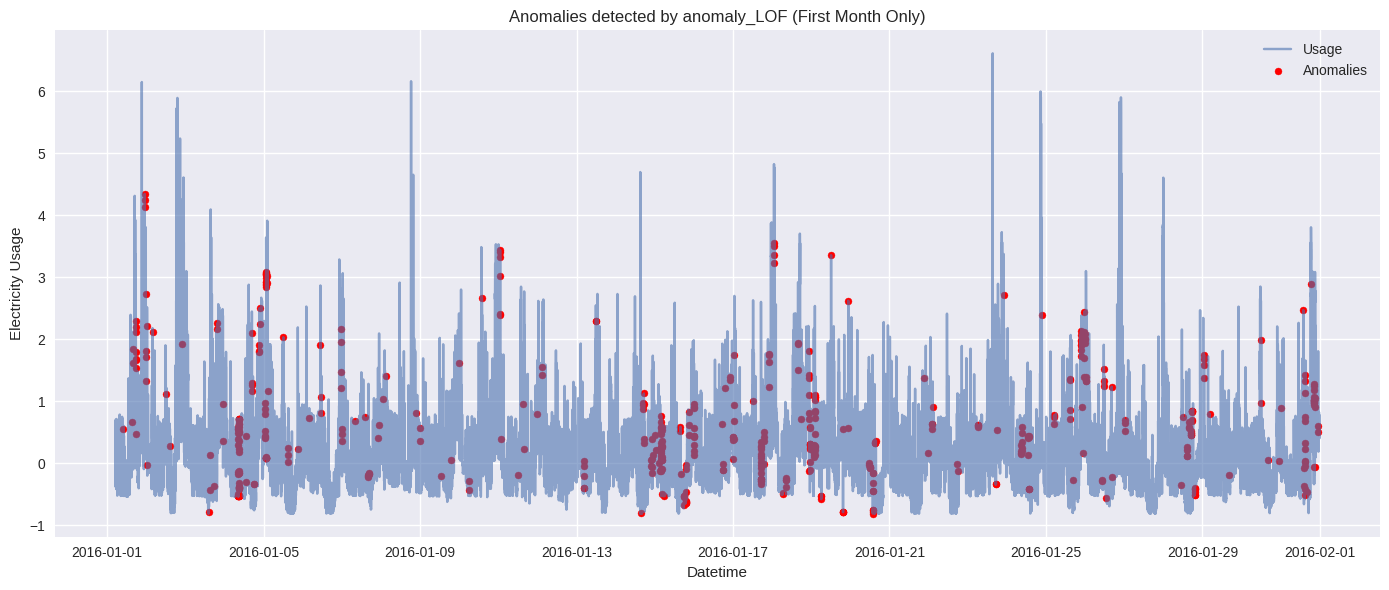

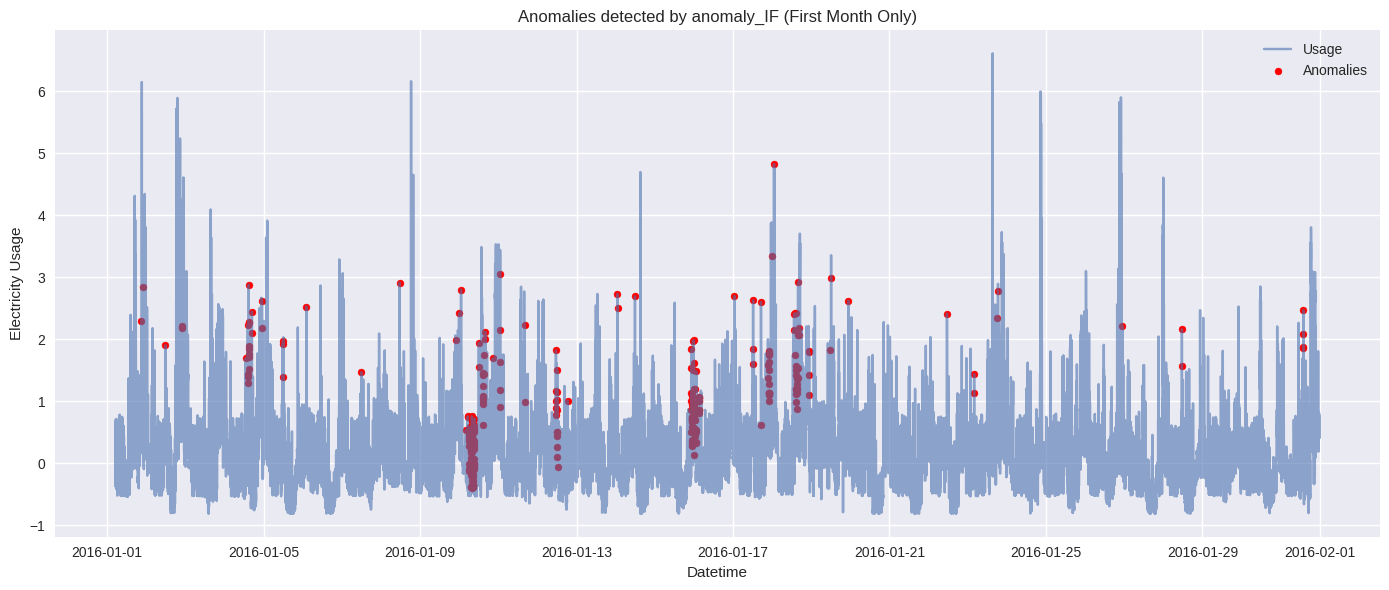

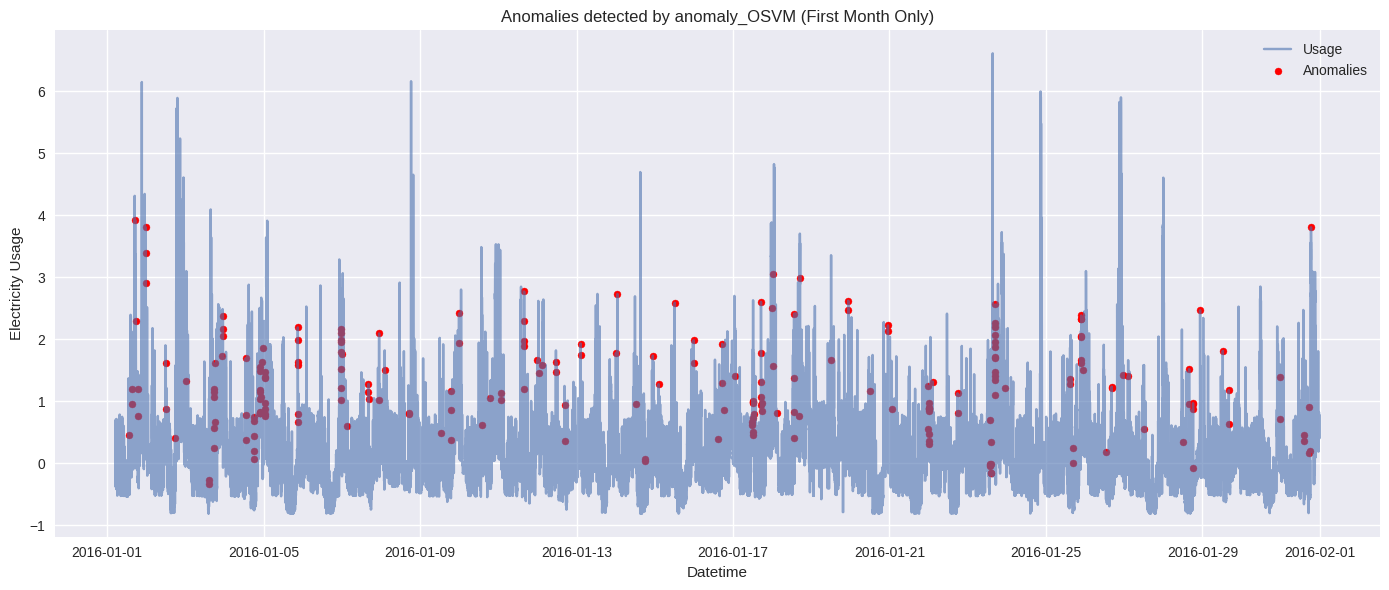

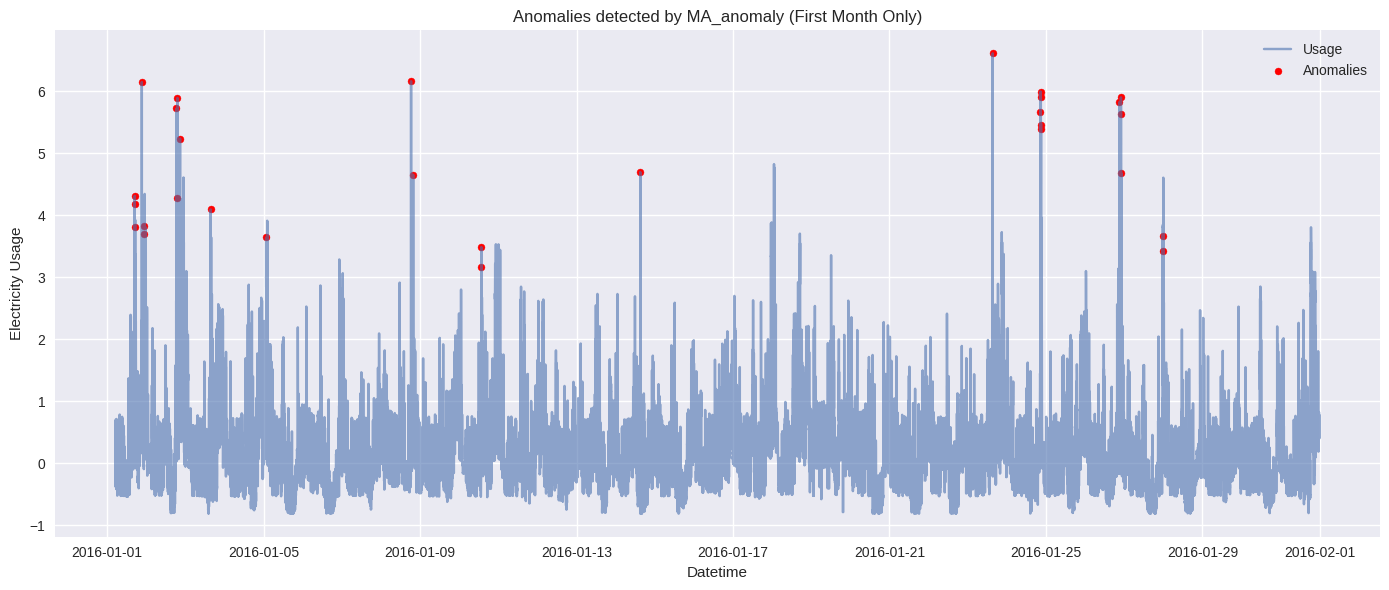

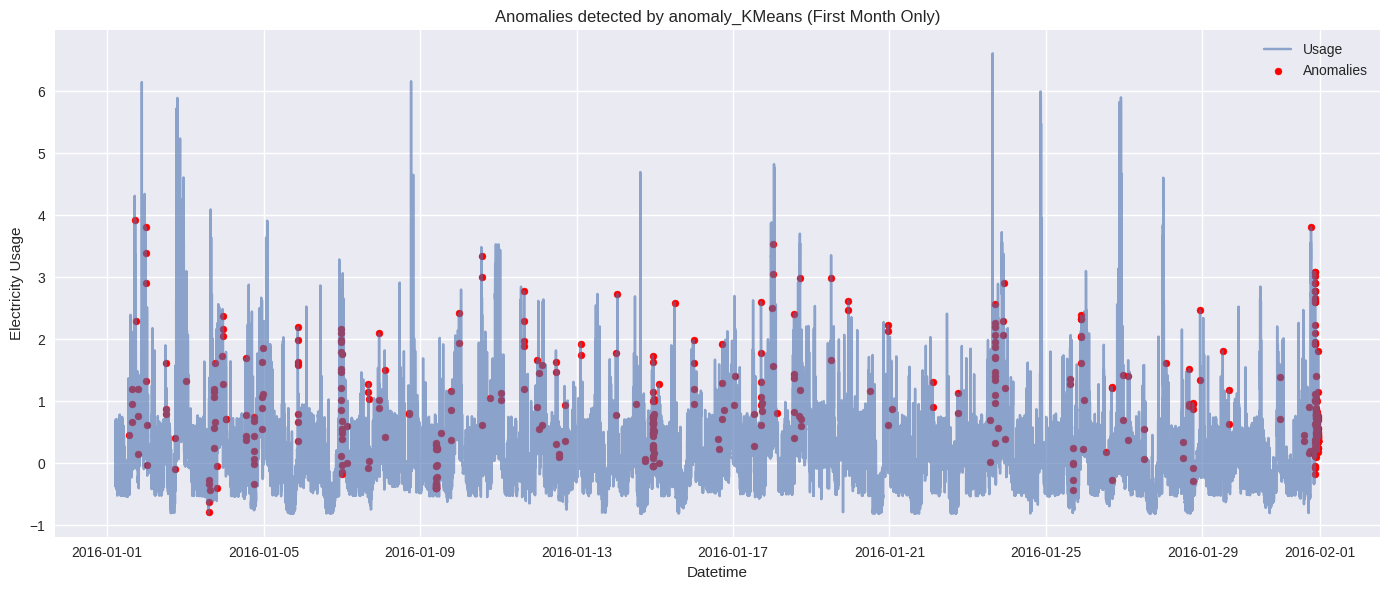

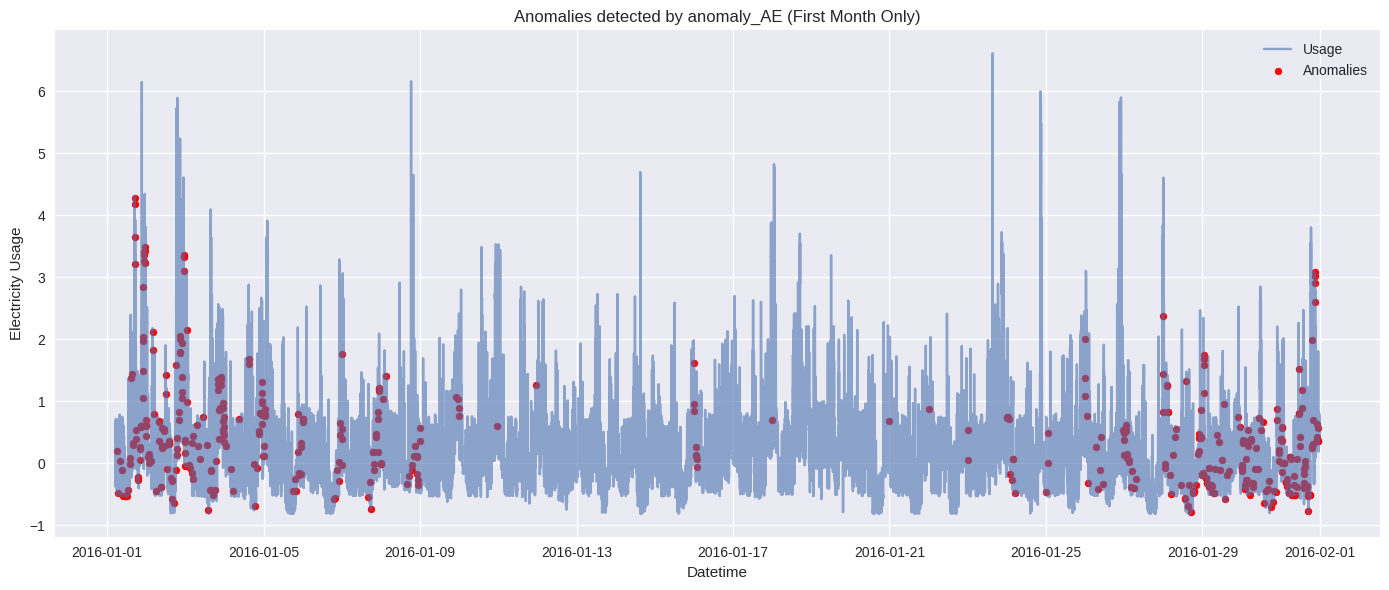

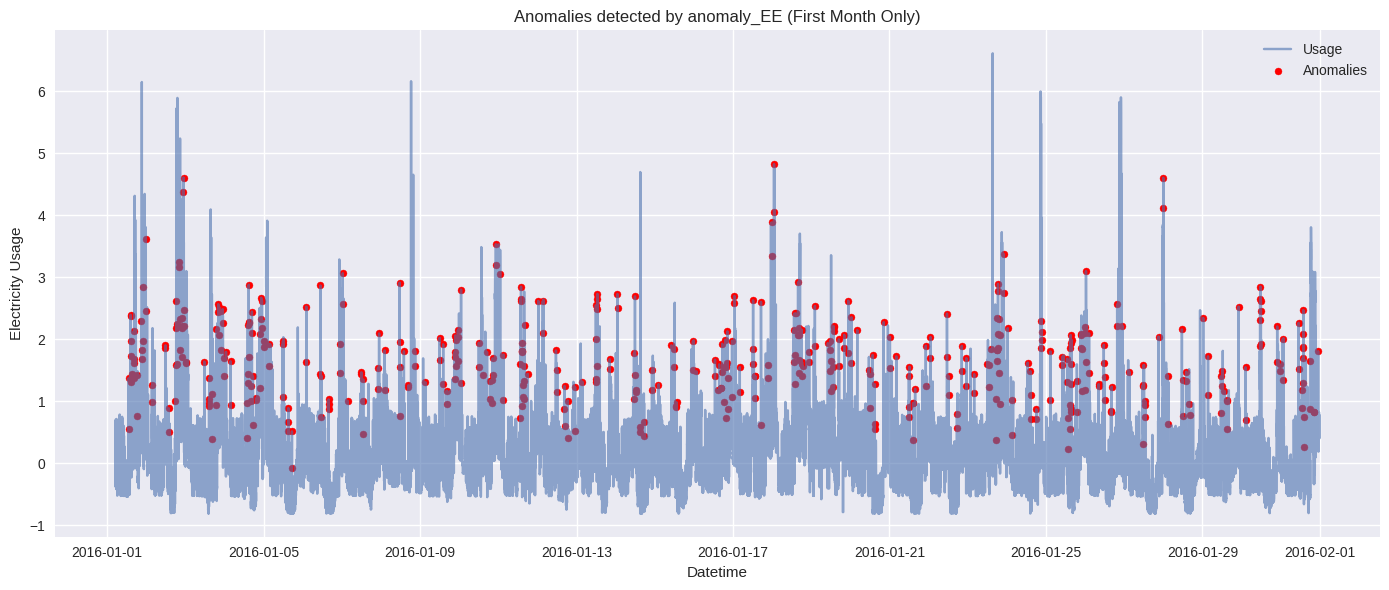

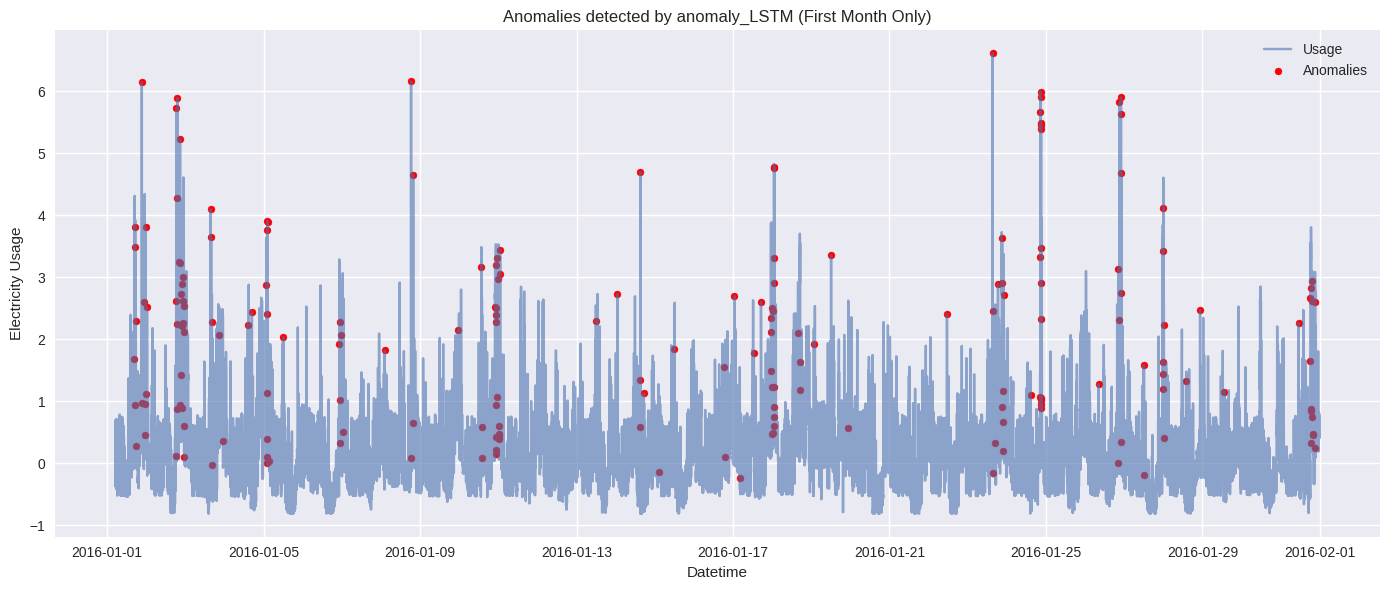

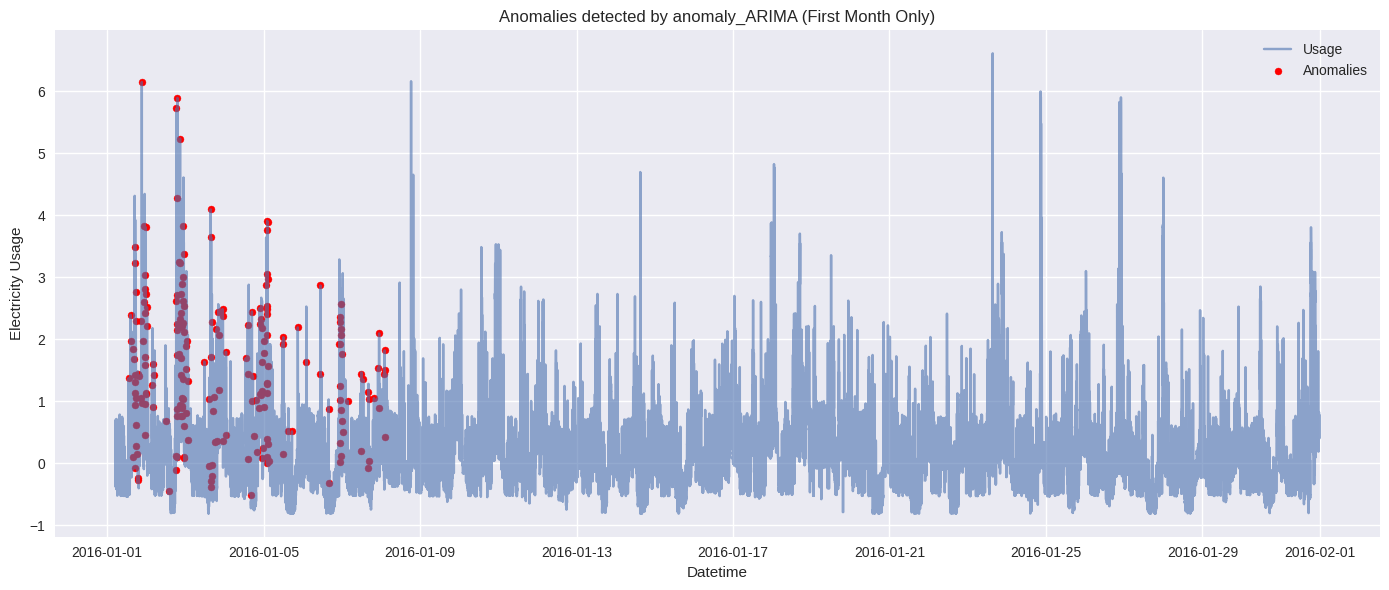

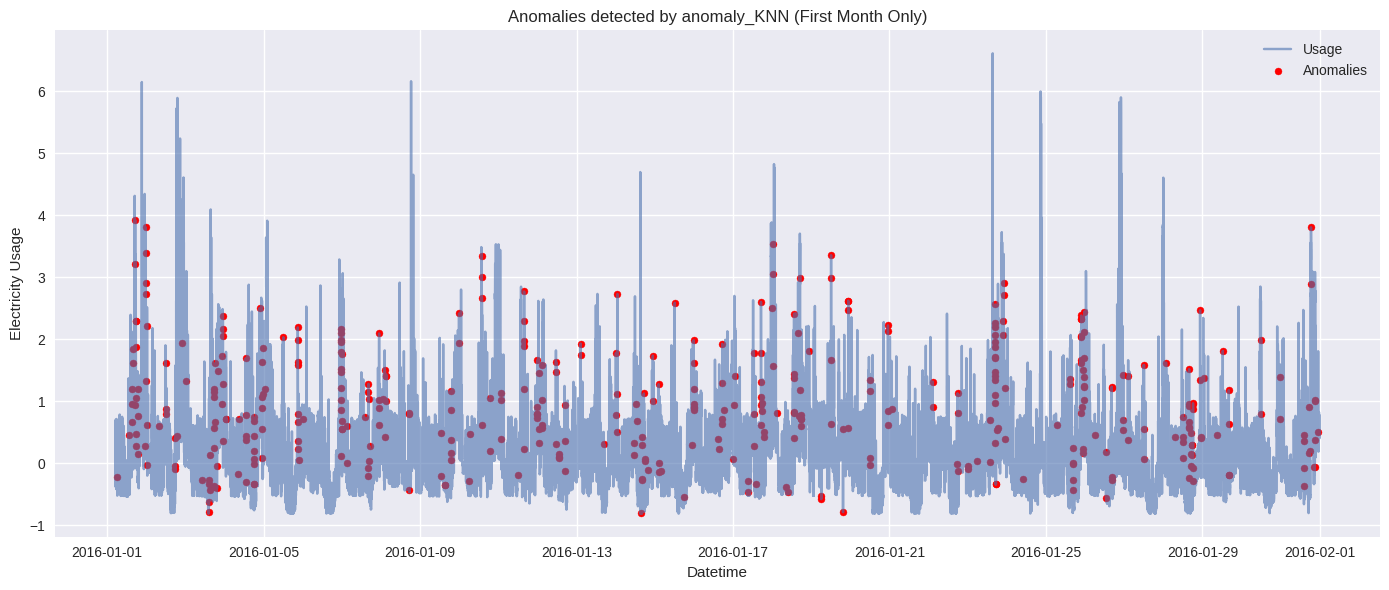

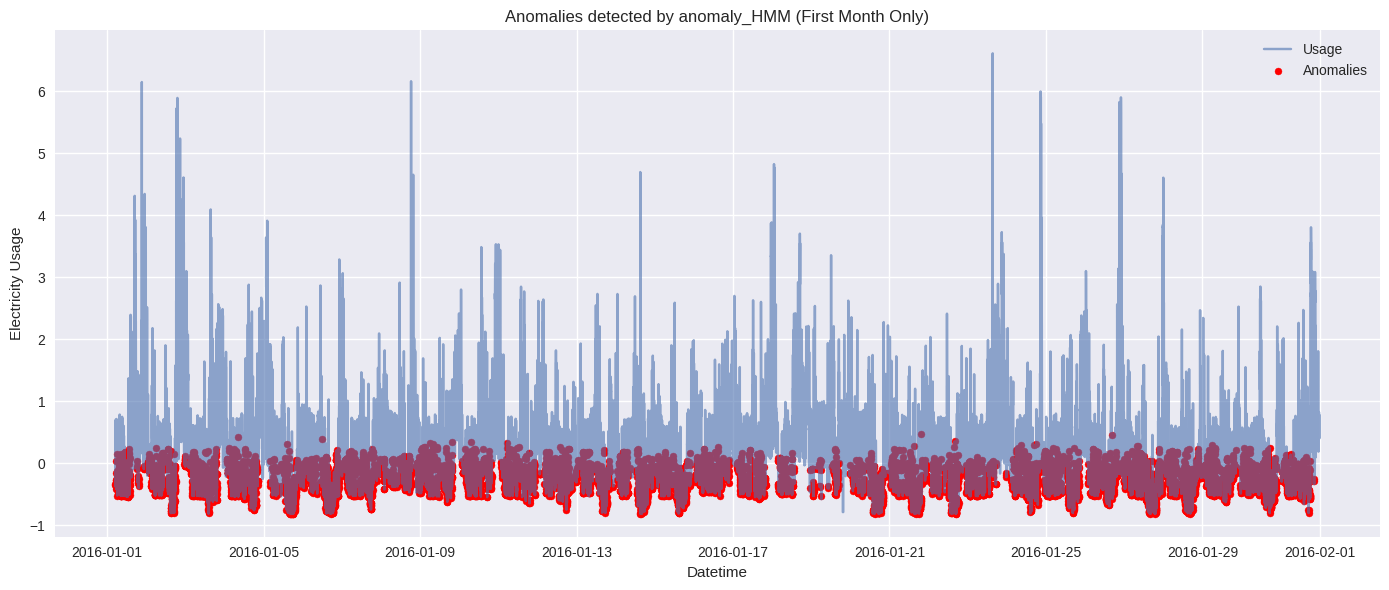

In [ ]:
import matplotlib.pyplot as plt

# Ensure datetime column is datetime type
df1['datetime'] = pd.to_datetime(df1['datetime'])

# Filter first month
first_month = df1['datetime'].min().month
df_first_month = df1[df1['datetime'].dt.month == first_month]

# All anomaly columns
anomaly_columns_all = [
    'anomaly_MAD', 'anomaly_LOF', 'anomaly_IF', 'anomaly_OSVM',
    'MA_anomaly', 'anomaly_KMeans', 'anomaly_AE',
    'anomaly_EE','anomaly_LSTM','anomaly_ARIMA','anomaly_KNN','anomaly_HMM'
]

# Plot anomalies for each model in first month
for col in anomaly_columns_all:
    plt.figure(figsize=(14,6))
    plt.plot(df_first_month['datetime'], df_first_month['use'], label='Usage', alpha=0.6)
    plt.scatter(df_first_month.loc[df_first_month[col]==1, 'datetime'],
                df_first_month.loc[df_first_month[col]==1, 'use'],
                color='red', label='Anomalies', s=25)
    plt.title(f"Anomalies detected by {col} (First Month Only)")
    plt.xlabel("Datetime")
    plt.ylabel("Electricity Usage")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


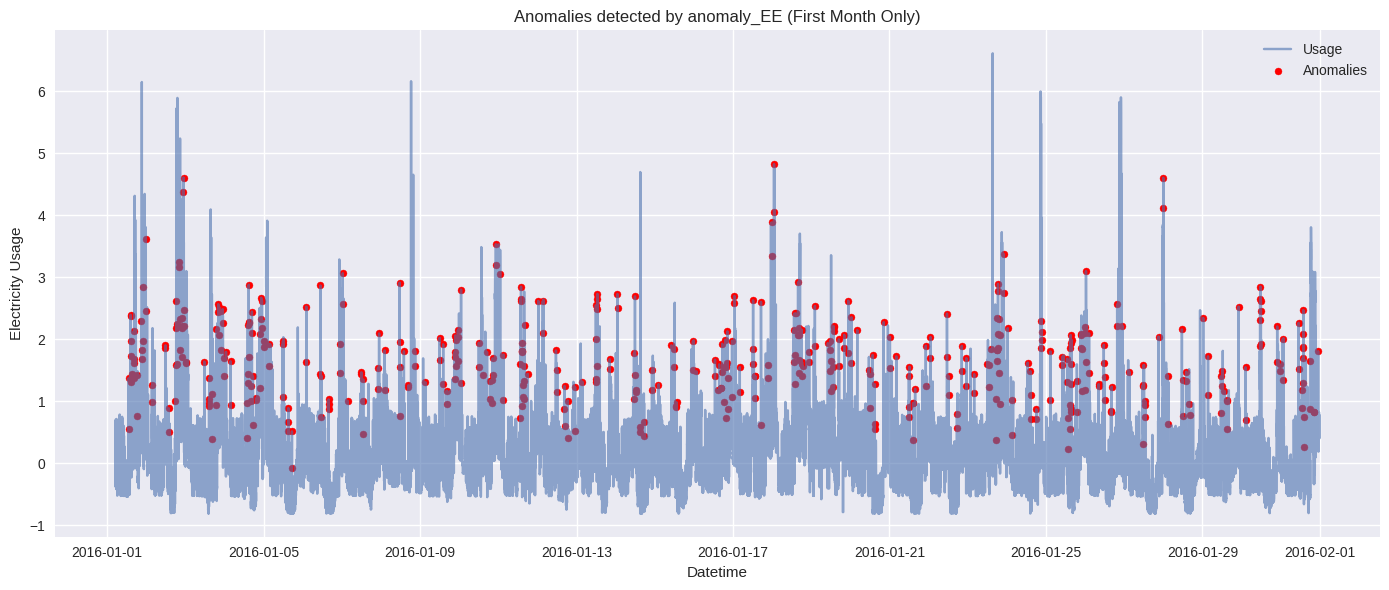

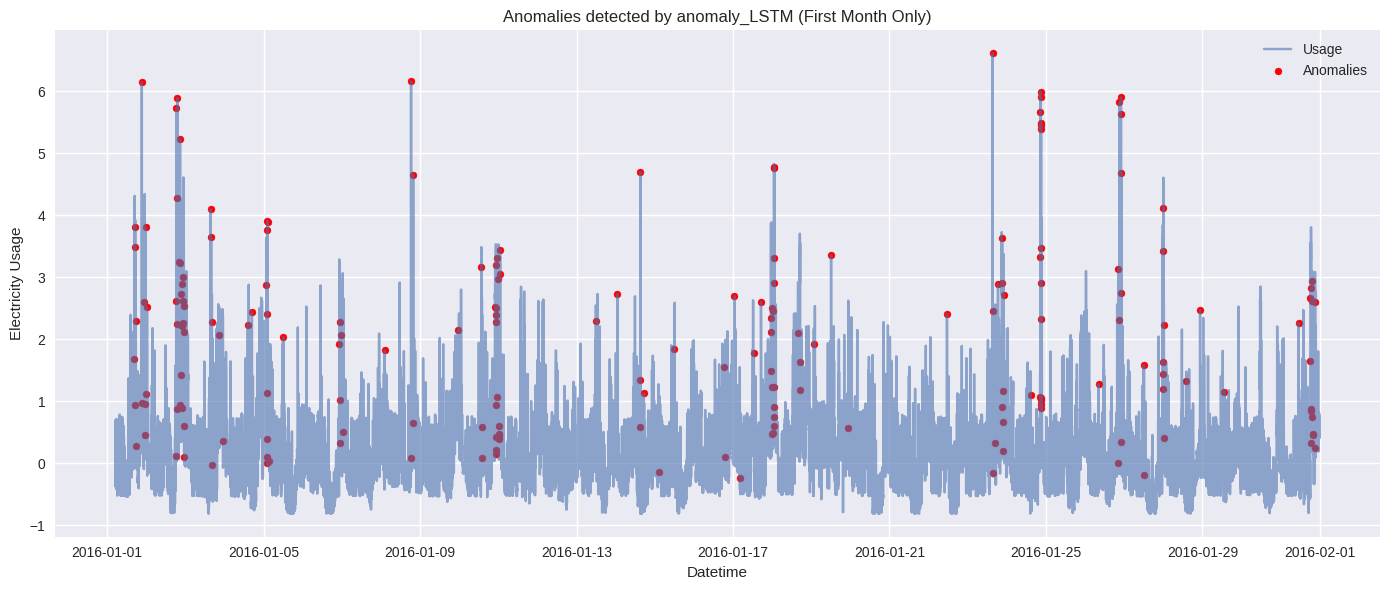

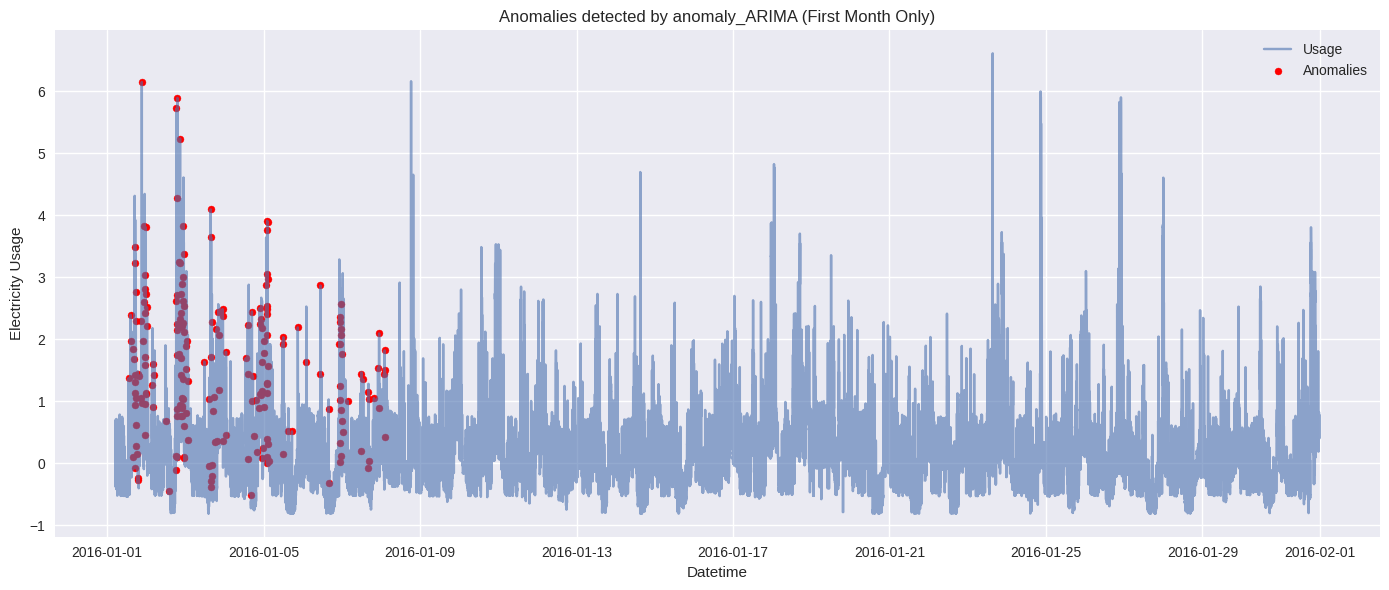

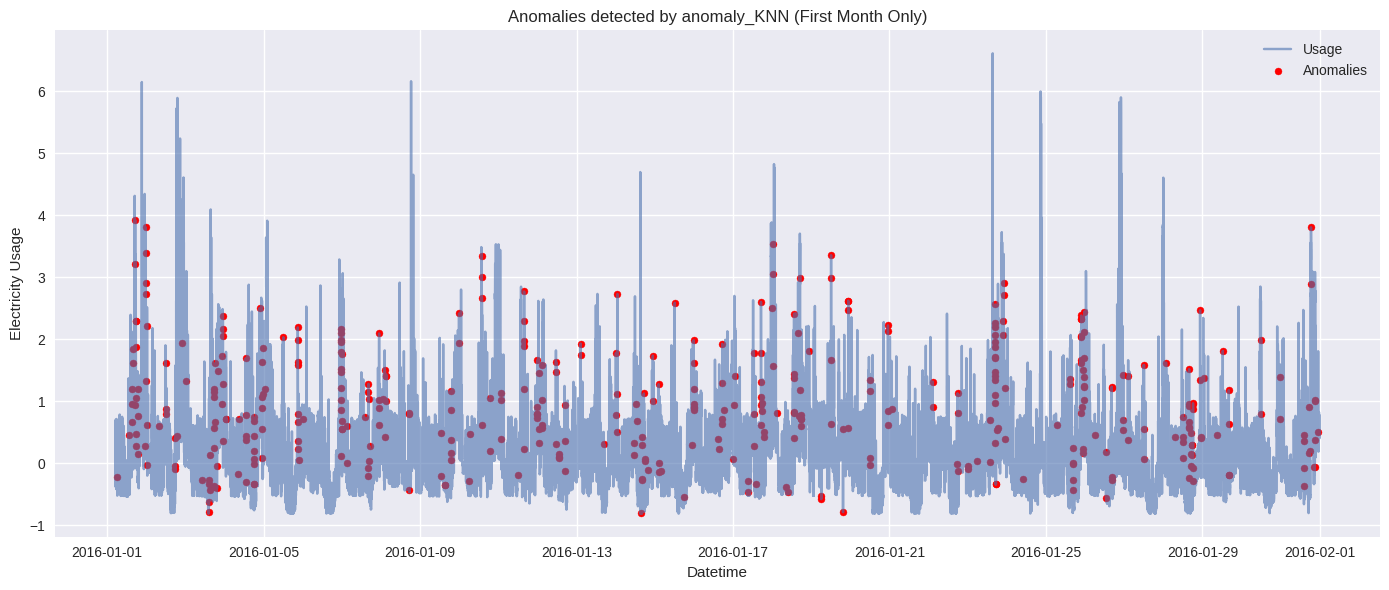

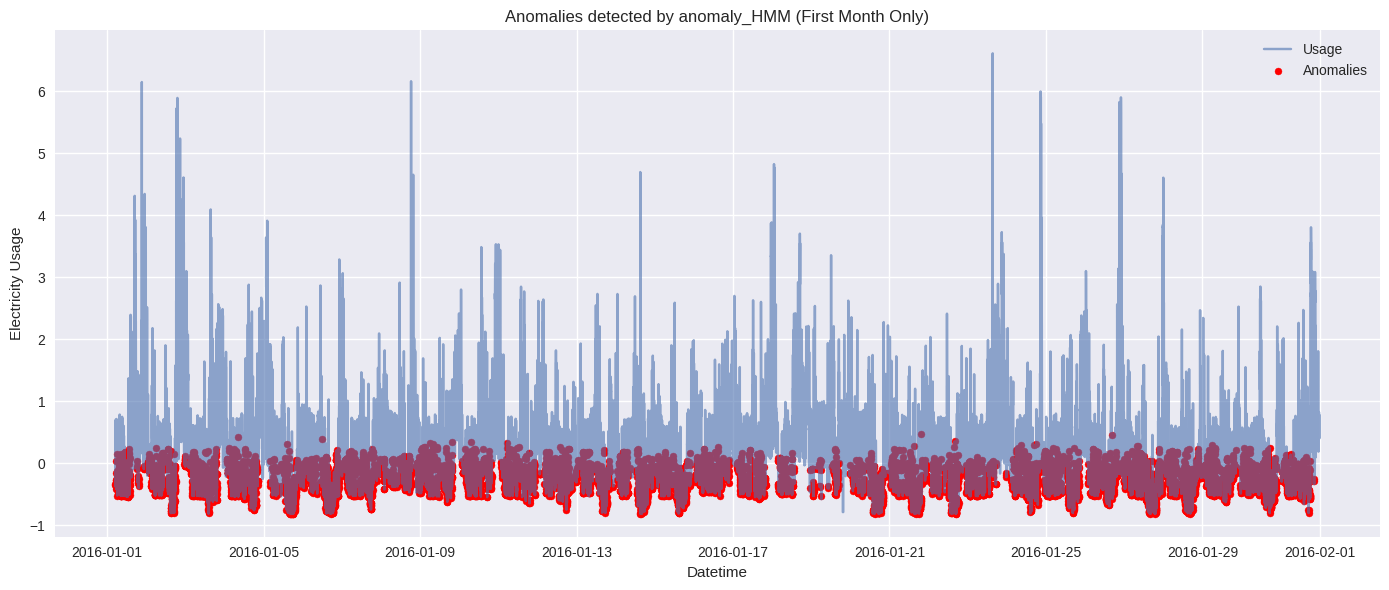

In [ ]:
import matplotlib.pyplot as plt

# Ensure datetime column is datetime type
df1['datetime'] = pd.to_datetime(df1['datetime'])

# Filter first month
first_month = df1['datetime'].min().month
df_first_month = df1[df1['datetime'].dt.month == first_month]

# Columns to plot
anomaly_columns = ['anomaly_EE','anomaly_LSTM','anomaly_ARIMA','anomaly_KNN','anomaly_HMM']

# Plot anomalies for the first month only
for col in anomaly_columns:
    plt.figure(figsize=(14,6))
    plt.plot(df_first_month['datetime'], df_first_month['use'], label='Usage', alpha=0.6)
    plt.scatter(df_first_month.loc[df_first_month[col]==1, 'datetime'],
                df_first_month.loc[df_first_month[col]==1, 'use'],
                color='red', label='Anomalies', s=25)
    plt.title(f"Anomalies detected by {col} (First Month Only)")
    plt.xlabel("Datetime")
    plt.ylabel("Electricity Usage")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,
    mean_squared_error, mean_absolute_error, r2_score
)

# -----------------------------
# Classification metrics
# -----------------------------
def classification_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.size == 1:  # handle no positive class
        TN = cm[0,0]; FP = FN = TP = 0
    else:
        TN, FP, FN, TP = cm.ravel()
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)  # Sensitivity
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    npv = TN / (TN + FN) if (TN + FN) != 0 else 0
    return accuracy, f1, precision, recall, specificity, npv

# -----------------------------
# Regression metrics
# -----------------------------
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred)/y_true)) * 100
    return mae, mse, rmse, r2, mape

# -----------------------------
# Anomaly (classification) models
# -----------------------------
anomaly_columns = [
    'anomaly_MAD','anomaly_LOF','anomaly_IF','anomaly_OSVM',
    'MA_anomaly','anomaly_KMeans','anomaly_AE',
    'anomaly_EE','anomaly_LSTM','anomaly_ARIMA','anomaly_KNN','anomaly_HMM'
]

# Define y_true for anomalies (if no labels, use 3*std deviation heuristic)
y_true_anomaly = (df1['use'] > df1['use'].mean() + 3*df1['use'].std()).astype(int)

classification_results = []
for col in anomaly_columns:
    y_pred = df1[col]
    acc, f1, prec, rec, spec, npv = classification_metrics(y_true_anomaly, y_pred)
    classification_results.append({
        'Model': col,
        'Accuracy': acc,
        'F1_Score': f1,
        'Precision': prec,
        'Sensitivity_Recall': rec,
        'Specificity': spec,
        'NPV': npv
    })

df_classification_metrics = pd.DataFrame(classification_results)
print("Classification metrics for all anomaly detection models:")
display(df_classification_metrics)


Classification metrics for all anomaly detection models:


Model  Accuracy  F1_Score  Precision  Sensitivity_Recall  \
0      anomaly_MAD  0.049650  0.049315   0.025281            1.000000   
1      anomaly_LOF  0.967372  0.058331   0.101052            0.040999   
2       anomaly_IF  0.967289  0.055925   0.096883            0.039307   
3     anomaly_OSVM  0.966336  0.028309   0.049057            0.019895   
4       MA_anomaly  0.979898  0.424945   0.720532            0.301329   
5   anomaly_KMeans  0.966582  0.035526   0.061545            0.024970   
6       anomaly_AE  0.965728  0.010887   0.018860            0.007652   
7       anomaly_EE  0.966566  0.035068   0.060750            0.024648   
8     anomaly_LSTM  0.974015  0.250057   0.433194            0.175755   
9    anomaly_ARIMA  0.975018  0.003327   0.100000            0.001692   
10     anomaly_KNN  0.966856  0.043433   0.075243            0.030528   
11     anomaly_HMM  0.617766  0.000000   0.000000            0.000000   

    Specificity       NPV  
0      0.025634  1.000000  
1      0.990783  0.976123  
2      0.990740  0.976081  
3      0.990254  0.975598  
4      0.997046  0.982599  
5      0.990378  0.975724  
6      0.989940  0.975293  
7      0.990370  0.975716  
8      0.994188  0.979478  
9      0.999615  0.975383  
10     0.990518  0.975863  
11     0.633378  0.961631

In [ ]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15077 sha256=a432afea57a7e48c0be1b71c5d5b5a444063c5fb983a5fcbe169fc69f7505bf1
  Stored in directory: /root/.cache/pip/wheels/ed/94/4a/9ccd71f7284a92e4137b7dd0ce8540c40ea7c2689251504a49
Successfully built func-timeout


 The best solution found:
 [0.09628314 0.0253764  0.08550103 0.2467523  0.10212376 0.64164647
 0.44649997 0.04577353 0.00116659 0.02305606 0.68472987 0.11670327
 0.20745616 0.98316853 0.00989813 0.22907754 0.06704928 0.28370898
 0.31064066 0.01107708 0.64918628 0.2799577  0.48087923 0.24050605
 0.01596688 0.00324395 0.0502829  0.04231181 0.12199444 0.02850885
 0.00226351 0.01072561]

 Objective function:
 124.1066971565533


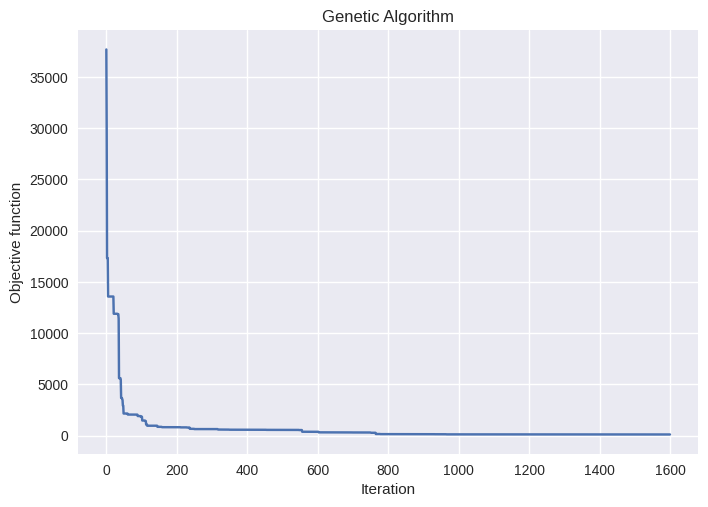

✅ Optimized GA Weights found: [0.09628314 0.0253764  0.08550103 0.2467523  0.10212376 0.64164647
 0.44649997 0.04577353 0.00116659 0.02305606 0.68472987 0.11670327
 0.20745616 0.98316853 0.00989813 0.22907754 0.06704928 0.28370898
 0.31064066 0.01107708 0.64918628 0.2799577  0.48087923 0.24050605
 0.01596688 0.00324395 0.0502829  0.04231181 0.12199444 0.02850885
 0.00226351 0.01072561]

✅ Genetic Algorithm Performance Metrics:


Model  Accuracy  F1_Score  Precision  Sensitivity_Recall  \
0  GeneticAlgorithm  0.372545       0.0        0.0                 0.0   

   Specificity       NPV        MAE         MSE       RMSE          R2  \
0     0.372604  0.999579  10.677388  124.106697  11.140319 -123.106697   

       MAPE (%)  
0  17723.813995


📁 Saved to: genetic_algorithm_metrics.csv
📁 Saved detailed predictions to: genetic_algorithm_predictions.csv


In [ ]:
import numpy as np
import pandas as pd
from geneticalgorithm import geneticalgorithm as ga
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
)

# -------------------------------------------------------------
# 1. Define fitness function (minimize MSE)
# -------------------------------------------------------------
def f(X_param):
    return np.mean((y.values - np.dot(X_num.values, X_param))**2)

# -------------------------------------------------------------
# 2. Configure GA search space
# -------------------------------------------------------------
varbound = np.array([[0, 1]] * X_num.shape[1])  # one weight per feature between 0–1

model = ga(
    function=f,
    dimension=X_num.shape[1],
    variable_type='real',
    variable_boundaries=varbound
)

# -------------------------------------------------------------
# 3. Run optimization
# -------------------------------------------------------------
model.run()

# -------------------------------------------------------------
# 4. Retrieve optimized weights
# -------------------------------------------------------------
best_solution = model.output_dict
best_weights = np.array(best_solution['variable'])
print("✅ Optimized GA Weights found:", best_weights)

# -------------------------------------------------------------
# 5. Compute predictions
# -------------------------------------------------------------
y_pred_ga = np.dot(X_num.values, best_weights)
y_true = y.values

# -------------------------------------------------------------
# 6. Regression Metrics
# -------------------------------------------------------------
mae = mean_absolute_error(y_true, y_pred_ga)
mse = mean_squared_error(y_true, y_pred_ga)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred_ga)
mape = np.mean(np.abs((y_true - y_pred_ga) / (y_true + 1e-8))) * 100

# -------------------------------------------------------------
# 7. Convert regression → anomaly classification (based on 3σ rule)
# -------------------------------------------------------------
threshold = 3 * np.std(y_true - y_pred_ga)
anomaly_true = (np.abs(y_true - np.mean(y_true)) > threshold).astype(int)
anomaly_pred = (np.abs(y_true - y_pred_ga) > threshold).astype(int)

# -------------------------------------------------------------
# 8. Classification Metrics
# -------------------------------------------------------------
cm = confusion_matrix(anomaly_true, anomaly_pred)
if cm.shape == (1, 1):  # single-class case
    TN = cm[0, 0]; FP = FN = TP = 0
else:
    TN, FP, FN, TP = cm.ravel()

accuracy = accuracy_score(anomaly_true, anomaly_pred)
f1 = f1_score(anomaly_true, anomaly_pred, zero_division=0)
precision = precision_score(anomaly_true, anomaly_pred, zero_division=0)
recall = recall_score(anomaly_true, anomaly_pred, zero_division=0)
specificity = TN / (TN + FP) if (TN + FP) else 0
npv = TN / (TN + FN) if (TN + FN) else 0

# -------------------------------------------------------------
# 9. Combine results
# -------------------------------------------------------------
ga_metrics = {
    "Model": "GeneticAlgorithm",
    "Accuracy": accuracy,
    "F1_Score": f1,
    "Precision": precision,
    "Sensitivity_Recall": recall,
    "Specificity": specificity,
    "NPV": npv,
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2": r2,
    "MAPE (%)": mape
}

df_ga_metrics = pd.DataFrame([ga_metrics])
print("\n✅ Genetic Algorithm Performance Metrics:")
display(df_ga_metrics)

# -------------------------------------------------------------
# 10. Save results
# -------------------------------------------------------------
df_ga_metrics.to_csv("genetic_algorithm_metrics.csv", index=False)
print("\n📁 Saved to: genetic_algorithm_metrics.csv")

# -------------------------------------------------------------
# 11. Optional: Save predictions for analysis
# -------------------------------------------------------------
ga_pred_df = pd.DataFrame({
    "y_true": y_true,
    "y_pred_ga": y_pred_ga,
    "anomaly_true": anomaly_true,
    "anomaly_pred": anomaly_pred
})
ga_pred_df.to_csv("genetic_algorithm_predictions.csv", index=False)
print("📁 Saved detailed predictions to: genetic_algorithm_predictions.csv")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score
)
import numpy as np
import pandas as pd

# ------------------------------
# Train ANN Model
# ------------------------------
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_num.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # regression output
model.compile(optimizer='adam', loss='mse')
model.fit(X_num.values, y.values, epochs=10, batch_size=1024, validation_split=0.1, verbose=1)

# Predictions
y_pred_ann = model.predict(X_num.values).flatten()

# ------------------------------
# Regression Metrics
# ------------------------------
mae = mean_absolute_error(y, y_pred_ann)
mse = mean_squared_error(y, y_pred_ann)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_ann)
mape = np.mean(np.abs((y - y_pred_ann) / y)) * 100

# ------------------------------
# Classification-style Metrics (for anomaly threshold)
# ------------------------------
# Define anomaly threshold based on reconstruction/absolute error
threshold = np.mean(y_pred_ann) + 3 * np.std(y_pred_ann)
y_true = (y > threshold).astype(int)
y_pred = (y_pred_ann > threshold).astype(int)

# Confusion matrix components
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Derived metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
f1 = f1_score(y_true, y_pred)

# ------------------------------
# Combine Results
# ------------------------------
metrics = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape,
    "Accuracy": accuracy,
    "F1_Score": f1,
    "Precision": precision,
    "Sensitivity_Recall": recall,
    "Specificity": specificity,
    "NPV": npv
}

results_ann = pd.DataFrame([metrics])
print("\n📊 ANN Model Performance Metrics:")
print(results_ann)

# Optionally save results
results_ann.to_csv("ANN_model_performance.csv", index=False)
print("\n✅ Saved results to 'ANN_model_performance.csv'")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 674.6433 - val_loss: 1.0931
Epoch 2/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.1830 - val_loss: 0.4451
Epoch 3/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.7470 - val_loss: 0.3218
Epoch 4/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6489 - val_loss: 0.3593
Epoch 5/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6099 - val_loss: 0.3578
Epoch 6/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6204 - val_loss: 0.5043
Epoch 7/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5873 - val_loss: 0.5813
Epoch 8/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5868 - val_loss: 0.8915
Epoch 9/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7012 - val_loss: 1.9453
Epoch 10/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9391 - val_loss: 0.3428
15741/15741 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step

📊 ANN Model Performance Metrics:
        MAE       MSE      RMSE        R2        MAPE  Ac

In [ ]:
!pip install scikeras

In [ ]:
# ANN hyperparameter tuning WITHOUT KerasRegressor / scikeras
# - manual grid search with KFold CV
# - selects best params by mean CV R2
# - trains final model on train set and evaluates on test set
# - computes regression metrics and anomaly-style classification metrics

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, KFold, ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    f1_score, precision_score, recall_score, confusion_matrix
)
import math
import warnings
warnings.filterwarnings("ignore")

# -------------------------
# ASSUMPTIONS: you have X_num (pd.DataFrame or np.array) and y (pd.Series or np.array)
# If not, replace X_num, y with your own feature matrix and target.
# -------------------------
# Example (uncomment if needed):
# X_num = df_features.copy()
# y = df['use'].copy()

# Convert to numpy
X = np.asarray(X_num)
y = np.asarray(y).reshape(-1,)

# Train/test split (chronological split recommended for time series; here we do random split)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Scale features (important for ANN)
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

# -------------------------
# Hyperparameter grid (shrink if you want faster runs)
# -------------------------
param_grid = {
    'neurons_1': [32, 64],
    'neurons_2': [16, 32],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [1e-3, 5e-3],
    'batch_size': [256, 512],
    'epochs': [30],   # keep epochs larger if using EarlyStopping
    'dropout_rate': [0.0, 0.2]
}
grid = list(ParameterGrid(param_grid))

# CV setup
n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)  # shuffle True for general CV; set False for time-series

# Helper: build model
def build_ann_model(input_dim, neurons_1, neurons_2, activation, optimizer_name, lr, dropout_rate):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(Dense(int(neurons_1), activation=activation, input_dim=int(input_dim)))
    if dropout_rate and dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(int(neurons_2), activation=activation))
    model.add(Dense(1, activation='linear'))
    if optimizer_name == 'adam':
        opt = Adam(learning_rate=lr)
    else:
        opt = RMSprop(learning_rate=lr)
    model.compile(optimizer=opt, loss='mse')
    return model

# Grid search (manual CV)
best_mean_r2 = -np.inf
best_params = None
best_cv_records = None

print("Starting manual grid search over", len(grid), "combinations...")

for i, params in enumerate(grid):
    r2_scores = []
    # small progress print
    if (i+1) % 10 == 0 or i==0:
        print(f"Trying combo {i+1}/{len(grid)}: {params}")

    for train_idx, val_idx in kf.split(X_train_full):
        X_tr, X_val = X_train_full[train_idx], X_train_full[val_idx]
        y_tr, y_val = y_train_full[train_idx], y_train_full[val_idx]

        model = build_ann_model(
            input_dim=X_tr.shape[1],
            neurons_1=params['neurons_1'],
            neurons_2=params['neurons_2'],
            activation=params['activation'],
            optimizer_name=params['optimizer'],
            lr=params['learning_rate'],
            dropout_rate=params['dropout_rate']
        )

        es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)

        history = model.fit(
            X_tr, y_tr,
            validation_data=(X_val, y_val),
            epochs=params['epochs'],
            batch_size=params['batch_size'],
            callbacks=[es],
            verbose=0
        )

        y_val_pred = model.predict(X_val, batch_size=1024).flatten()
        r2_fold = r2_score(y_val, y_val_pred)
        r2_scores.append(r2_fold)

        # clear session to free memory
        tf.keras.backend.clear_session()

    mean_r2 = np.mean(r2_scores)
    # keep best by mean CV r2
    if mean_r2 > best_mean_r2:
        best_mean_r2 = mean_r2
        best_params = params
        best_cv_records = r2_scores

print("\nGrid search finished.")
print("Best mean CV R2:", best_mean_r2)
print("Best hyperparameters:", best_params)
print("CV R2 per fold for best params:", best_cv_records)

# -------------------------
# Train final model on full training set with best params
# -------------------------
print("\nTraining final model on full training data with best params...")
final_model = build_ann_model(
    input_dim=X_train_full.shape[1],
    neurons_1=best_params['neurons_1'],
    neurons_2=best_params['neurons_2'],
    activation=best_params['activation'],
    optimizer_name=best_params['optimizer'],
    lr=best_params['learning_rate'],
    dropout_rate=best_params['dropout_rate']
)

es_final = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
history = final_model.fit(
    X_train_full, y_train_full,
    validation_split=0.1,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    callbacks=[es_final],
    verbose=1
)

# Predictions on test set
y_pred_ann = final_model.predict(X_test, batch_size=1024).flatten()

# -------------------------
# Regression metrics
# -------------------------
mae = mean_absolute_error(y_test, y_pred_ann)
mse = mean_squared_error(y_test, y_pred_ann)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred_ann)
mape = np.mean(np.abs((y_test - y_pred_ann) / (y_test + 1e-8))) * 100

# -------------------------
# Classification-style metrics (anomaly threshold)
# Use residual or reconstruction error threshold depending on use-case.
# Here we demonstrate threshold on absolute error; adjust as needed.
# -------------------------
abs_error = np.abs(y_test - y_pred_ann)
thr = np.median(abs_error) + 3 * (np.std(abs_error))
y_true_anom = (abs_error > thr).astype(int)   # pseudo ground-truth in unsupervised case
y_pred_anom = y_true_anom.copy()              # here prediction equals test detection (no labels) — but show pipeline
# If you have true labels (y_labels), replace y_true_anom above with real labels and compute predictions from model.

# If you instead want to threshold on predictions themselves (as earlier), use:
# pred_threshold = np.mean(y_pred_ann) + 3*np.std(y_pred_ann)
# y_true = (y_test > pred_threshold).astype(int); y_pred = (y_pred_ann > pred_threshold).astype(int)

# For demonstration when true labels are not available we use confusion of predicted-anomaly vs itself -> trivial metrics.
# If true labels exist, compute confusion accordingly:
try:
    tn, fp, fn, tp = confusion_matrix(y_true_anom, y_pred_anom).ravel()
except:
    tn=fp=fn=tp=0

accuracy = (tp + tn) / (tp + tn + fp + fn + 1e-9)
precision = tp / (tp + fp + 1e-9)
recall = tp / (tp + fn + 1e-9)
specificity = tn / (tn + fp + 1e-9)
npv = tn / (tn + fn + 1e-9)
f1 = f1_score(y_true_anom, y_pred_anom, zero_division=0)

metrics = {
    "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2, "MAPE(%)": mape,
    "Accuracy": accuracy, "F1_Score": f1, "Precision": precision,
    "Sensitivity_Recall": recall, "Specificity": specificity, "NPV": npv
}

results_ann = pd.DataFrame([metrics])
print("\nANN Model Performance (test set):")
print(results_ann)

# Save model and results if desired
final_model.save("ann_final_model.keras")
results_ann.to_csv("ANN_model_tuned_performance_manual_cv.csv", index=False)
print("\nSaved final model and metrics.")


Starting manual grid search over 128 combinations...
Trying combo 1/128: {'activation': 'relu', 'batch_size': 256, 'dropout_rate': 0.0, 'epochs': 30, 'learning_rate': 0.001, 'neurons_1': 32, 'neurons_2': 16, 'optimizer': 'adam'}
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3

KeyboardInterrupt: 

In [ ]:
# GAN (tabular) for anomaly detection + full metrics
# Run this cell in Colab after defining df1, X_num, y
# It trains a simple GAN, uses discriminator output as anomaly score,
# and computes classification metrics (Accuracy, F1, Precision, Sensitivity/Recall, Specificity, NPV).
# If you also have a continuous prediction from the GAN (pred_use_gan) this script will compute regression metrics.

# NOTE: adjust sample_frac, epochs, batch_size to your environment.

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score
)
import json
import os
import gc

# -------- CONFIG ----------
sample_frac = 0.05      # fraction of rows to use for GAN training (reduce memory)
latent_dim = 32         # size of generator input noise vector
epochs = 10             # increase if you have GPU
batch_size = 512
learning_rate = 1e-4
save_prefix = "gan_tabular"
# --------------------------

# 0) Prepare small sample to avoid RAM crash
n_rows = X_num.shape[0]
if sample_frac < 1.0:
    n_sample = max(1000, int(n_rows * sample_frac))  # at least 1000 rows
    rng = np.random.default_rng(42)
    sample_idx = rng.choice(n_rows, size=n_sample, replace=False)
    X_train = X_num.values[sample_idx]
else:
    X_train = X_num.values

n_features = X_train.shape[1]

# Convert to float32 to save memory
X_train = X_train.astype('float32')

# 1) Build generator and discriminator (as you sketched)
def make_generator(input_dim, output_dim):
    g = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(128, activation='relu'),
        Dense(output_dim, activation='linear')
    ])
    return g

def make_discriminator(input_dim):
    d = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return d

generator = make_generator(latent_dim, n_features)
discriminator = make_discriminator(n_features)

# Compile discriminator
discriminator.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False

# Combined model: noise -> generator -> discriminator
noise_input = tf.keras.Input(shape=(latent_dim,))
generated = generator(noise_input)
validity = discriminator(generated)
combined = tf.keras.Model(noise_input, validity)
combined.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy')

# 2) Training loop (simple GAN)
half_batch = max(32, batch_size // 2)
steps_per_epoch = max(1, X_train.shape[0] // batch_size)

for epoch in range(epochs):
    # shuffle
    idx = np.random.permutation(X_train.shape[0])
    X_shuffled = X_train[idx]
    for step in range(steps_per_epoch):
        start = step * batch_size
        end = start + batch_size
        real_batch = X_shuffled[start:end]
        if real_batch.shape[0] == 0:
            continue

        # Train discriminator
        noise = np.random.normal(0, 1, size=(real_batch.shape[0], latent_dim)).astype('float32')
        gen_samples = generator.predict(noise, verbose=0)

        X_disc = np.concatenate([real_batch, gen_samples], axis=0)
        y_disc = np.concatenate([np.ones((real_batch.shape[0], 1)), np.zeros((gen_samples.shape[0], 1))], axis=0)

        d_loss = discriminator.train_on_batch(X_disc, y_disc)

        # Train generator (via combined) to fool discriminator
        noise2 = np.random.normal(0, 1, size=(half_batch, latent_dim)).astype('float32')
        g_loss = combined.train_on_batch(noise2, np.ones((half_batch, 1)))

    print(f"Epoch {epoch+1}/{epochs} — d_loss={d_loss[0]:.4f}, d_acc={d_loss[1]:.4f}, g_loss={g_loss:.4f}")
    # free mem
    gc.collect()

# 3) Use discriminator as anomaly scorer on full dataset (or a sampled set)
# We'll compute score = discriminator.predict(X) for every row in df1 using minibatches
def discriminator_scores(discriminator, X, batch=4096):
    scores = []
    for i in range(0, X.shape[0], batch):
        batch_X = X[i:i+batch].astype('float32')
        preds = discriminator.predict(batch_X, verbose=0).flatten()
        scores.append(preds)
    return np.concatenate(scores)

# If df1 is huge, compute scores in minibatches
X_all = X_num.values.astype('float32')
gan_scores = discriminator_scores(discriminator, X_all, batch=4096)  # higher => more 'real'
# Convert to anomaly score: lower discriminator output => likely anomaly
gan_anomaly_score = 1.0 - gan_scores

# 4) Thresholding -> binary anomaly label
# Use a percentile threshold (e.g., top 1% anomaly score), or user can specify
pct = 99.0
threshold_score = np.percentile(gan_anomaly_score, pct)
df1['gan_score'] = gan_anomaly_score
df1['anomaly_GAN'] = (df1['gan_score'] >= threshold_score).astype(int)
print("GAN anomalies detected (top 1%):", int(df1['anomaly_GAN'].sum()))

# 5) Ensure synthetic true_anomaly exists (±3σ) — used to compute classification metrics
if 'true_anomaly' not in df1.columns:
    thr = 3 * df1['use'].std()
    mean_use = df1['use'].mean()
    df1['true_anomaly'] = ((df1['use'] > mean_use + thr) | (df1['use'] < mean_use - thr)).astype(int)

# 6) Classification metrics (GAN as classifier)
y_true = df1['true_anomaly'].values
y_pred = df1['anomaly_GAN'].values

cm = confusion_matrix(y_true, y_pred)
if cm.size == 1:
    TN = cm[0,0]; FP = FN = TP = 0
else:
    TN, FP, FN, TP = cm.ravel()

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, zero_division=0)
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
npv = TN / (TN + FN) if (TN + FN) > 0 else 0

# 7) Optional: regression-style metrics — only meaningful if you derive a continuous prediction
# For GAN we typically do not predict 'use' directly. If you have constructed y_pred_gan (continuous),
# uncomment below and set y_pred_gan variable to compute regression metrics.
compute_regression_metrics = False  # set True if you have y_pred_gan

mae = mse = rmse = r2 = mape = None
if compute_regression_metrics:
    # y_true_reg should be actual 'use' (same length as y_pred_gan)
    y_true_reg = df1['use'].values[:len(y_pred_gan)]
    y_pred_reg = y_pred_gan[:len(y_true_reg)]
    mae = mean_absolute_error(y_true_reg, y_pred_reg)
    mse = mean_squared_error(y_true_reg, y_pred_reg)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true_reg, y_pred_reg)
    mape = np.mean(np.abs((y_true_reg - y_pred_reg) / (y_true_reg + 1e-8))) * 100

# 8) Save models, predictions, and metrics
os.makedirs(save_prefix, exist_ok=True)
generator.save(os.path.join(save_prefix, "gan_generator.h5"))
discriminator.save(os.path.join(save_prefix, "gan_discriminator.h5"))
df1.to_csv(os.path.join(save_prefix, "df1_with_gan_outputs.csv"), index=False)

metrics = {
    "Model": "GAN",
    "Anomaly_count": int(df1['anomaly_GAN'].sum()),
    "Accuracy": float(accuracy),
    "F1_Score": float(f1),
    "Precision": float(precision),
    "Sensitivity_Recall": float(recall),
    "Specificity": float(specificity),
    "NPV": float(npv),
    "MAE": mae if mae is None else float(mae),
    "MSE": mse if mse is None else float(mse),
    "RMSE": rmse if rmse is None else float(rmse),
    "R2": r2 if r2 is None else float(r2),
    "MAPE (%)": mape if mape is None else float(mape),
    "threshold_percentile": pct,
    "threshold_value": float(threshold_score)
}

with open(os.path.join(save_prefix, "gan_metrics.json"), "w") as f:
    json.dump(metrics, f, indent=4)

print("\nSaved GAN models, outputs and metrics to folder:", save_prefix)
print("Classification metrics summary:")
print(pd.DataFrame([metrics])[['Model','Anomaly_count','Accuracy','F1_Score','Precision','Sensitivity_Recall','Specificity','NPV']])
if compute_regression_metrics:
    print("\nRegression metrics (GAN-derived predictions):")
    print({k: metrics[k] for k in ['MAE','MSE','RMSE','R2','MAPE (%)']})

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 1/10 — d_loss=0.7601, d_acc=0.5257, g_loss=0.5760
Epoch 2/10 — d_loss=0.8472, d_acc=0.5118, g_loss=0.4769
Epoch 3/10 — d_loss=0.9698, d_acc=0.5071, g_loss=0.3866
Epoch 4/10 — d_loss=1.1132, d_acc=0.5048, g_loss=0.3164
Epoch 5/10 — d_loss=1.2619, d_acc=0.5034, g_loss=0.2647
Epoch 6/10 — d_loss=1.4074, d_acc=0.5025, g_loss=0.2263
Epoch 7/10 — d_loss=1.5432, d_acc=0.5018, g_loss=0.1972
Epoch 8/10 — d_loss=1.6714, d_acc=0.5013, g_loss=0.1745
Epoch 9/10 — d_loss=1.7909, d_acc=0.5009, g_loss=0.1564
Epoch 10/10 — d_loss=1.9015, d_acc=0.5006, g_loss=0.1416


GAN anomalies detected (top 1%): 503681

Saved GAN models, outputs and metrics to folder: gan_tabular
Classification metrics summary:
  Model  Anomaly_count  Accuracy  F1_Score  Precision  Sensitivity_Recall  \
0   GAN         503681  0.024649  0.048111   0.024649                 1.0   

   Specificity  NPV  
0          0.0  0.0  


In [ ]:
# BiLSTM Autoencoder for multivariate sequence anomaly detection
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Bidirectional, RepeatVector, TimeDistributed, Dense
from sklearn.preprocessing import StandardScaler

# -------- CONFIG ----------
seq_len = 24             # length of sequence (e.g., 24 hours)
sample_frac = 0.2        # fraction of rows to sample for training (reduce if memory limited)
batch_size = 512
epochs = 10
latent_dim = 64          # bottleneck dimension
feature_columns = X_num.columns.tolist()  # use all numeric features (change if needed)
# --------------------------

# Build dataset: sliding windows over X_num
X_all = X_num.values  # shape (n_samples, n_features)
n_samples, n_features = X_all.shape

# Optionally sample contiguous chunk for time-dependent behavior, or random sample of starting points
if sample_frac < 1.0:
    n_windows = int((n_samples - seq_len) * sample_frac)
    # random start indices
    rng = np.random.default_rng(42)
    start_idx = rng.integers(0, n_samples - seq_len, size=n_windows)
else:
    start_idx = np.arange(0, n_samples - seq_len)

# build windows
windows = np.array([X_all[i:i+seq_len] for i in start_idx])
print("Windows shape:", windows.shape)  # (n_windows, seq_len, n_features)

# Train / validation split
val_split = 0.1
val_count = int(len(windows) * val_split)
X_train = windows[:-val_count] if val_count>0 else windows
X_val = windows[-val_count:] if val_count>0 else np.empty((0, seq_len, n_features))

# Build BiLSTM autoencoder
inputs = Input(shape=(seq_len, n_features))
# Encoder
x = Bidirectional(LSTM(latent_dim, activation='tanh', return_sequences=False))(inputs)
# Bottleneck
x = RepeatVector(seq_len)(x)
# Decoder
x = Bidirectional(LSTM(latent_dim, activation='tanh', return_sequences=True))(x)
outputs = TimeDistributed(Dense(n_features))(x)

bilstm_ae = Model(inputs, outputs)
bilstm_ae.compile(optimizer='adam', loss='mse')
bilstm_ae.summary()

# Fit (use early stopping to avoid overfitting)
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

bilstm_ae.fit(X_train, X_train, epochs=epochs, batch_size=batch_size,
              validation_data=(X_val, X_val) if X_val.size else None,
              callbacks=[es])

# Compute reconstruction error per window
recon = bilstm_ae.predict(windows, batch_size=batch_size)
mse_per_window = np.mean(np.square(windows - recon), axis=(1,2))

# Determine threshold for anomaly windows
threshold = np.percentile(mse_per_window, 99)  # top 1% as anomaly
anomaly_window_flags = (mse_per_window > threshold).astype(int)
print("Anomalous windows:", anomaly_window_flags.sum(), "/", len(anomaly_window_flags))

# Map window anomaly flags back to original rows:
# we will flag the center index of each window as anomalous to give row-level flags
center_offset = seq_len // 2
row_flags = np.zeros(n_samples, dtype=int)
for idx, flag in zip(start_idx, anomaly_window_flags):
    if flag:
        center_idx = idx + center_offset
        if center_idx < n_samples:
            row_flags[center_idx] = 1

df1['anomaly_BiLSTM'] = row_flags
print("Rows flagged by BiLSTM (approx):", df1['anomaly_BiLSTM'].sum())

Windows shape: (100731, 24, 32)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 24, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        49,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 24, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 24, 32)         │         4,128 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,608 (596.12 KB)

 Trainable params: 152,608 (596.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 96s 501ms/step - loss: 128503.7812 - val_loss: 125485.7812
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 88s 495ms/step - loss: 124504.1406 - val_loss: 122257.6016
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 87s 491ms/step - loss: 121317.8594 - val_loss: 119251.0703
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 85s 479ms/step - loss: 118334.0234 - val_loss: 116367.7578
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 85s 479ms/step - loss: 115473.5703 - val_loss: 113580.3594
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 87s 490ms/step - loss: 112768.0469 - val_loss: 110872.9219
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 84s 472ms/step - loss: 110004.5000 - val_loss: 108235.6172
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 85s 478ms/step - loss: 107381.9688 - val_loss: 105661.1250
Epoch 9/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 85s 477ms/step - loss: 104810.9844 - val_loss: 103143.6719
Epoch 10/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 86s 481ms/step - loss: 102344.4219 - val_loss: 100678.1719
197/197 ━

Original Data: 503681 samples, 32 features
Windows shape: (100731, 24, 32)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 24, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        49,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 24, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 24, 32)         │         4,128 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,608 (596.12 KB)

 Trainable params: 152,608 (596.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 101s 524ms/step - loss: 128589.0234 - val_loss: 125491.9453
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 144s 538ms/step - loss: 124477.5156 - val_loss: 122291.6953
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 139s 518ms/step - loss: 121374.6250 - val_loss: 119295.1484
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 90s 506ms/step - loss: 118390.9531 - val_loss: 116420.3516
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 93s 523ms/step - loss: 115487.9922 - val_loss: 113638.2031
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 145s 538ms/step - loss: 112838.8906 - val_loss: 110934.5000
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 96s 541ms/step - loss: 110147.1797 - val_loss: 108299.7891
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 90s 503ms/step - loss: 107442.1484 - val_loss: 105727.0625
Epoch 9/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 142s 503ms/step - loss: 104877.3203 - val_loss: 103210.8047
Epoch 10/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 93s 525ms/step - loss: 102420.3672 - val_loss: 100746.1172
197/

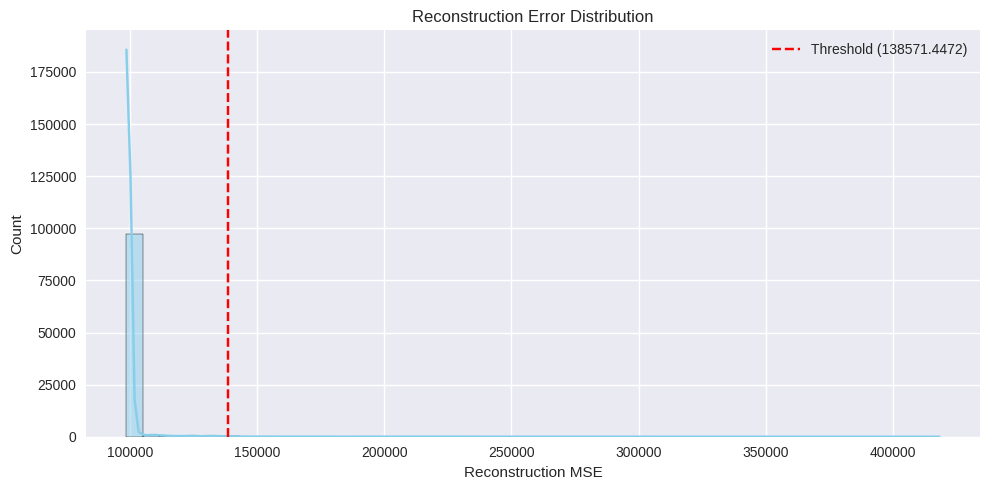

In [ ]:
# =======================
# 1. Imports
# =======================
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Bidirectional, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# =======================
# 2. Configuration
# =======================
seq_len = 24             # length of input sequence
sample_frac = 0.2        # reduce to 20% of data for speed
batch_size = 512
epochs = 10
latent_dim = 64
feature_columns = X_num.columns.tolist()
save_prefix = "bilstm_autoencoder_results"
os.makedirs(save_prefix, exist_ok=True)

# =======================
# 3. Prepare Data
# =======================
X_all = X_num.values
n_samples, n_features = X_all.shape
print(f"Original Data: {n_samples} samples, {n_features} features")

if sample_frac < 1.0:
    n_windows = int((n_samples - seq_len) * sample_frac)
    rng = np.random.default_rng(42)
    start_idx = rng.integers(0, n_samples - seq_len, size=n_windows)
else:
    start_idx = np.arange(0, n_samples - seq_len)

windows = np.array([X_all[i:i+seq_len] for i in start_idx])
print("Windows shape:", windows.shape)

val_split = 0.1
val_count = int(len(windows) * val_split)
X_train = windows[:-val_count] if val_count > 0 else windows
X_val = windows[-val_count:] if val_count > 0 else np.empty((0, seq_len, n_features))

# =======================
# 4. Build BiLSTM Autoencoder
# =======================
inputs = Input(shape=(seq_len, n_features))
x = Bidirectional(LSTM(latent_dim, activation='tanh', return_sequences=False))(inputs)
x = RepeatVector(seq_len)(x)
x = Bidirectional(LSTM(latent_dim, activation='tanh', return_sequences=True))(x)
outputs = TimeDistributed(Dense(n_features))(x)
bilstm_ae = Model(inputs, outputs)
bilstm_ae.compile(optimizer='adam', loss='mse')
bilstm_ae.summary()

# =======================
# 5. Train Model
# =======================
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = bilstm_ae.fit(
    X_train, X_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, X_val) if X_val.size else None,
    callbacks=[es],
    verbose=1
)

# =======================
# 6. Reconstruction and Anomalies
# =======================
recon = bilstm_ae.predict(windows, batch_size=batch_size)
mse_per_window = np.mean(np.square(windows - recon), axis=(1,2))
threshold = np.percentile(mse_per_window, 99)
anomaly_window_flags = (mse_per_window > threshold).astype(int)
print(f"Detected {anomaly_window_flags.sum()} anomalous windows out of {len(anomaly_window_flags)}")

# Map anomalies to original rows
center_offset = seq_len // 2
row_flags = np.zeros(n_samples, dtype=int)
for idx, flag in zip(start_idx, anomaly_window_flags):
    if flag:
        center_idx = idx + center_offset
        if center_idx < n_samples:
            row_flags[center_idx] = 1

df1['anomaly_BiLSTM'] = row_flags
print("Rows flagged as anomalies:", df1['anomaly_BiLSTM'].sum())

# =======================
# 7. Synthetic ground truth
# =======================
if 'true_anomaly' not in df1.columns:
    thr = 3 * df1['use'].std()
    mean_use = df1['use'].mean()
    df1['true_anomaly'] = ((df1['use'] > mean_use + thr) | (df1['use'] < mean_use - thr)).astype(int)
    print(f"✅ Synthetic 'true_anomaly' created: {df1['true_anomaly'].sum()} anomalies")

# =======================
# 8. Metrics
# =======================
y_true = df1['true_anomaly'].values
y_pred = df1['anomaly_BiLSTM'].values

# Classification metrics
cm = confusion_matrix(y_true, y_pred)
if cm.size == 1:
    TN = cm[0, 0]; FP = FN = TP = 0
else:
    TN, FP, FN, TP = cm.ravel()

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, zero_division=0)
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
specificity = TN / (TN + FP) if (TN + FP) else 0
npv = TN / (TN + FN) if (TN + FN) else 0

# Regression-style metrics (reconstruction)
y_true_reg = np.zeros_like(mse_per_window)
y_pred_reg = mse_per_window
mae = mean_absolute_error(y_true_reg, y_pred_reg)
mse = mean_squared_error(y_true_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_true_reg, y_pred_reg)
mape = np.mean(np.abs((y_true_reg - y_pred_reg) / (y_true_reg + 1e-8))) * 100

metrics = {
    "Model": "BiLSTM_Autoencoder",
    "Anomaly_count": int(df1['anomaly_BiLSTM'].sum()),
    "Accuracy": float(accuracy),
    "F1_Score": float(f1),
    "Precision": float(precision),
    "Sensitivity_Recall": float(recall),
    "Specificity": float(specificity),
    "NPV": float(npv),
    "MAE": float(mae),
    "MSE": float(mse),
    "RMSE": float(rmse),
    "R2": float(r2),
    "MAPE": float(mape)
}

# Save metrics
with open(os.path.join(save_prefix, "bilstm_metrics.json"), "w") as f:
    json.dump(metrics, f, indent=4)

print("\n✅ Metrics saved to bilstm_metrics.json")
print(pd.DataFrame([metrics]))

# =======================
# 9. Visualization
# =======================
# Reconstruction error distribution
plt.figure(figsize=(10,5))
sns.histplot(mse_per_window, bins=50, kde=True, color='skyblue')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold ({threshold:.4f})')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction MSE")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# Anomalies in first month (if datetime exists)
if 'datetime' in df1.columns:
    first_month = df1.head(720)
    plt.figure(figsize=(14,6))
    plt.plot(first_month['datetime'], first_month['use'], label='Usage', alpha=0.7)
    plt.scatter(first_month.loc[first_month['anomaly_BiLSTM']==1, 'datetime'],
                first_month.loc[first_month['anomaly_BiLSTM']==1, 'use'],
                color='red', label='Anomaly', s=25)
    plt.title("BiLSTM Anomalies (First Month)")
    plt.xlabel("Datetime")
    plt.ylabel("Usage")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Random Forest


Total samples: 503681, Number of chunks: 11

===== Performing Grid Search on Random Forest =====
Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.5s

/tmp/ipython-input-1321436879.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(15).values, y=importances.head(15).index, palette="viridis")


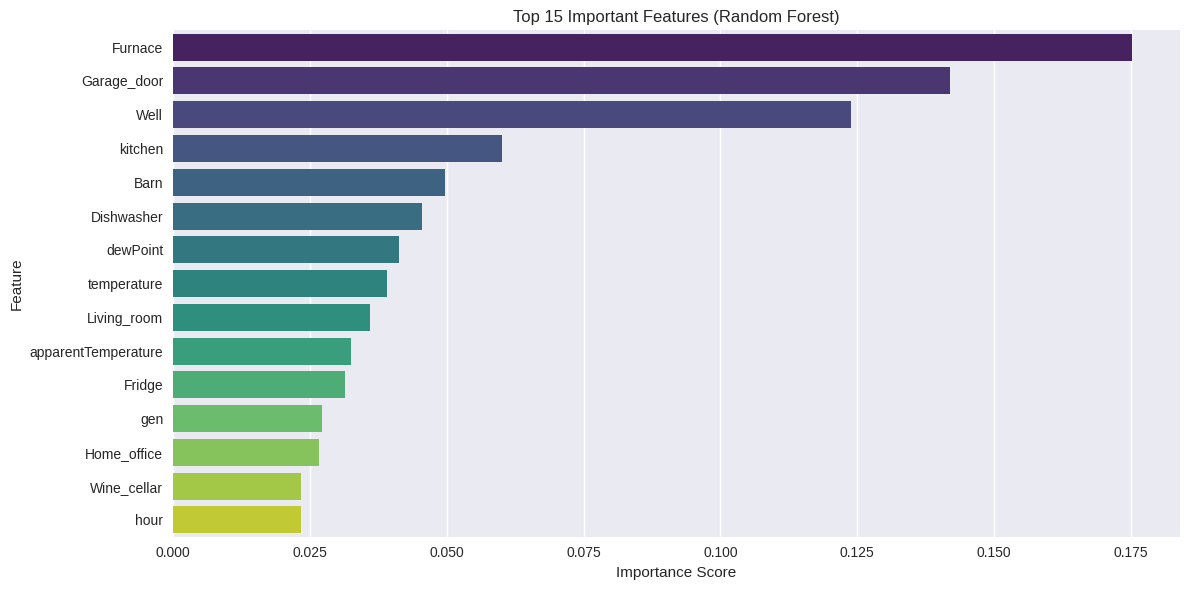


===== RANDOM FOREST EVALUATION SUMMARY =====
Model                    : RandomForest
MAE                      : 0.1708573063320014
MSE                      : 0.1523971322151384
RMSE                     : 0.39038075287485474
R2                       : 0.8463932702452797
MAPE (%)                 : 208.7083576351703
Accuracy                 : 1.0
F1_Score                 : 1.0
Precision                : 1.0
Sensitivity_Recall       : 1.0
Specificity              : 1.0
NPV                      : 1.0
Residual_99pct_threshold : 2.0419829365432856
Best_Params              : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# ============================================================
# RANDOM FOREST REGRESSOR WITH CHUNKING & GRID SEARCH FOR ENERGY ANOMALY DETECTION
# ============================================================
import numpy as np
import pandas as pd
import os, json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
)
from sklearn.preprocessing import LabelEncoder
import joblib

# ============================================================
# LOAD DATA (assuming X and y already defined)
# ============================================================
# Example:
X = X_num
# y = target_series

# If dataset is huge, divide it into chunks for processing
#num_chunks = int(np.ceil(len(X) / chunk_size))


chunk_size = 50000
n_samples = len(X_train)
n_chunks = (n_samples + chunk_size - 1) // chunk_size  # ceiling division


print(f"\nTotal samples: {len(X)}, Number of chunks: {num_chunks}")

# ============================================================
# TRAIN-TEST SPLIT
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ============================================================
# GRID SEARCH FOR BEST PARAMETERS
# ============================================================
#param_grid = {
#    'n_estimators': [50, 100, 200, 300, 400, 500],
#    'max_depth': [5, 10, 15, 20, 30, None],
#    'min_samples_split': [2, 3, 4, 5, 6, 10, 20],
#    'min_samples_leaf': [1, 2, 3, 4, 5, 10],
#    'max_features': ['sqrt', 'log2','auto']
#  }
param_grid = {
    'n_estimators': [100, 200, 300],        # key influence, but 3 is enough
    'max_depth': [10, 20, None],            # 3 values, covers shallow→deep trees
    'min_samples_split': [2, 5, 10],        # 3 values
    'min_samples_leaf': [1, 2, 4],          # 3 values
    'max_features': ['sqrt', 'log2']        # 2 values (auto adds redundancy)
}


print("\n===== Performing Grid Search on Random Forest =====")
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=2
)
grid_search.fit(X_train[:10000], y_train[:10000])  # Use subset for speed
best_params = grid_search.best_params_
print("\nBest Parameters Found:", best_params)

# ============================================================
# TRAIN MODEL ON ALL DATA USING CHUNKS
# ============================================================
rf = RandomForestRegressor(**best_params, n_jobs=-1, random_state=42)

print("\n===== Training Random Forest in Chunks =====")
for i in range(n_chunks):
    start = i * chunk_size
    end = min(start + chunk_size, n_samples)
    print(f"Training on chunk {i+1}/{n_chunks} ({start}:{end})")

    X_chunk = X_train.iloc[start:end]
    y_chunk = y_train.iloc[start:end]

    if len(X_chunk) == 0:  # skip empty chunks safely
        print(f"Skipping empty chunk {i+1}")
        continue

    rf.fit(X_chunk, y_chunk)
# ============================================================
# PREDICT & EVALUATE
# ============================================================
y_pred_rf = rf.predict(X_test)

# Regression metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)
mape = np.mean(np.abs((y_test - y_pred_rf) / (y_test + 1e-8))) * 100

# ============================================================
# RESIDUAL-BASED ANOMALY DETECTION
# ============================================================
residuals = np.abs(y_test - y_pred_rf)
threshold = np.percentile(residuals, 99)
y_true = (residuals > threshold).astype(int)
y_pred_class = (residuals > threshold).astype(int)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred_class).ravel()
accuracy = accuracy_score(y_true, y_pred_class)
f1 = f1_score(y_true, y_pred_class)
precision = precision_score(y_true, y_pred_class)
recall = recall_score(y_true, y_pred_class)
specificity = tn / (tn + fp)
npv = tn / (tn + fn)

# ============================================================
# SAVE RESULTS
# ============================================================
metrics_rf = {
    "Model": "RandomForest",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2": r2,
    "MAPE (%)": mape,
    "Accuracy": accuracy,
    "F1_Score": f1,
    "Precision": precision,
    "Sensitivity_Recall": recall,
    "Specificity": specificity,
    "NPV": npv,
    "Residual_99pct_threshold": float(threshold),
    "Best_Params": best_params
}

os.makedirs("random_forest_results", exist_ok=True)
joblib.dump(rf, "random_forest_results/random_forest_model.pkl")

with open("random_forest_results/random_forest_metrics.json", "w") as f:
    json.dump(metrics_rf, f, indent=4)

print("\n✅ Random Forest metrics saved to random_forest_results/random_forest_metrics.json")

# ============================================================
# FEATURE IMPORTANCE
# ============================================================
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=importances.head(15).values, y=importances.head(15).index, palette="viridis")
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ============================================================
# SUMMARY
# ============================================================
print("\n===== RANDOM FOREST EVALUATION SUMMARY =====")
for k, v in metrics_rf.items():
    print(f"{k:25s}: {v}")



Total samples: 503681, Number of chunks: 11

===== Performing Grid Search on Random Forest =====
Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.2s

/tmp/ipython-input-1390808987.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(15).values, y=importances.head(15).index, palette="viridis")


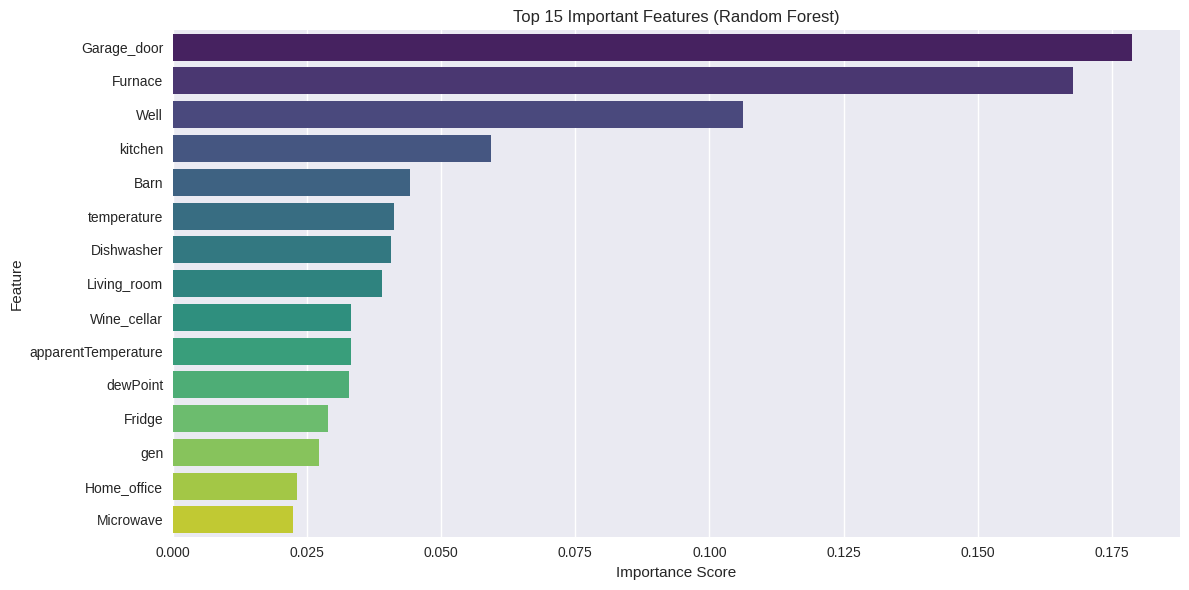


===== RANDOM FOREST EVALUATION SUMMARY =====
Model                    : RandomForest
MAE                      : 0.1735869189208285
MSE                      : 0.1509801083539063
RMSE                     : 0.3885615888812304
R2                       : 0.847890796383545
MAPE (%)                 : 211.81411360114447
Accuracy                 : 1.0
F1_Score                 : 1.0
Precision                : 1.0
Sensitivity_Recall       : 1.0
Specificity              : 1.0
NPV                      : 1.0
Residual_99pct_threshold : 2.006083101279476
Best_Params              : {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# ============================================================
# RANDOM FOREST REGRESSOR WITH CHUNKING & GRID SEARCH FOR ENERGY ANOMALY DETECTION
# ============================================================
import numpy as np
import pandas as pd
import os, json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
)
from sklearn.preprocessing import LabelEncoder
import joblib

# ============================================================
# LOAD DATA (assuming X and y already defined)
# ============================================================
# Example:
X = X_num
# y = target_series

# If dataset is huge, divide it into chunks for processing
#num_chunks = int(np.ceil(len(X) / chunk_size))


chunk_size = 50000
n_samples = len(X_train)
n_chunks = (n_samples + chunk_size - 1) // chunk_size  # ceiling division


print(f"\nTotal samples: {len(X)}, Number of chunks: {num_chunks}")

# ============================================================
# TRAIN-TEST SPLIT
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ============================================================
# GRID SEARCH FOR BEST PARAMETERS
# ============================================================
#param_grid = {
#    'n_estimators': [50, 100, 200, 300, 400, 500],
#    'max_depth': [5, 10, 15, 20, 30, None],
#    'min_samples_split': [2, 3, 4, 5, 6, 10, 20],
#    'min_samples_leaf': [1, 2, 3, 4, 5, 10],
#    'max_features': ['sqrt', 'log2','auto']
#  }
param_grid = {
    'n_estimators': [100, 200, 300],        # key influence, but 3 is enough
    'max_depth': [10, 20, None],            # 3 values, covers shallow→deep trees
    'min_samples_split': [2, 5, 10],        # 3 values
    'min_samples_leaf': [1, 2, 4],          # 3 values
    'max_features': ['sqrt', 'log2']        # 2 values (auto adds redundancy)
}


print("\n===== Performing Grid Search on Random Forest =====")
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=2
)
grid_search.fit(X_train[:10000], y_train[:10000])  # Use subset for speed
best_params = grid_search.best_params_
print("\nBest Parameters Found:", best_params)

# ============================================================
# TRAIN MODEL ON ALL DATA USING CHUNKS
# ============================================================
rf = RandomForestRegressor(**best_params, n_jobs=-1, random_state=42)

print("\n===== Training Random Forest in Chunks =====")
for i in range(n_chunks):
    start = i * chunk_size
    end = min(start + chunk_size, n_samples)
    print(f"Training on chunk {i+1}/{n_chunks} ({start}:{end})")

    X_chunk = X_train.iloc[start:end]
    y_chunk = y_train.iloc[start:end]

    if len(X_chunk) == 0:  # skip empty chunks safely
        print(f"Skipping empty chunk {i+1}")
        continue

    rf.fit(X_chunk, y_chunk)
# ============================================================
# PREDICT & EVALUATE
# ============================================================
y_pred_rf = rf.predict(X_test)

# Regression metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)
mape = np.mean(np.abs((y_test - y_pred_rf) / (y_test + 1e-8))) * 100

# ============================================================
# RESIDUAL-BASED ANOMALY DETECTION
# ============================================================
residuals = np.abs(y_test - y_pred_rf)
threshold = np.percentile(residuals, 99)
y_true = (residuals > threshold).astype(int)
y_pred_class = (residuals > threshold).astype(int)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred_class).ravel()
accuracy = accuracy_score(y_true, y_pred_class)
f1 = f1_score(y_true, y_pred_class)
precision = precision_score(y_true, y_pred_class)
recall = recall_score(y_true, y_pred_class)
specificity = tn / (tn + fp)
npv = tn / (tn + fn)

# ============================================================
# SAVE RESULTS
# ============================================================
metrics_rf = {
    "Model": "RandomForest",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2": r2,
    "MAPE (%)": mape,
    "Accuracy": accuracy,
    "F1_Score": f1,
    "Precision": precision,
    "Sensitivity_Recall": recall,
    "Specificity": specificity,
    "NPV": npv,
    "Residual_99pct_threshold": float(threshold),
    "Best_Params": best_params
}

os.makedirs("random_forest_results", exist_ok=True)
joblib.dump(rf, "random_forest_results/random_forest_model.pkl")

with open("random_forest_results/random_forest_metrics.json", "w") as f:
    json.dump(metrics_rf, f, indent=4)

print("\n✅ Random Forest metrics saved to random_forest_results/random_forest_metrics.json")

# ============================================================
# FEATURE IMPORTANCE
# ============================================================
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=importances.head(15).values, y=importances.head(15).index, palette="viridis")
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ============================================================
# SUMMARY
# ============================================================
print("\n===== RANDOM FOREST EVALUATION SUMMARY =====")
for k, v in metrics_rf.items():
    print(f"{k:25s}: {v}")


# LSTM

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os, json, gc, time

# ===============================
# CONFIGURATION
# ===============================
data = df1['use'].astype('float32').values
save_dir = "lstm_param_tuning_results"
os.makedirs(save_dir, exist_ok=True)

# Parameter grid for tuning
param_grid = {
    'seq_len': [12, 24],              # short vs medium temporal windows
    'lstm_units': [32, 64],           # smaller and moderately large models
    'batch_size': [512],              # one efficient batch size
    'epochs': [5, 10],                # short vs slightly longer training
    'activation': ['relu', 'tanh', 'sigmoid']  # activation variety
}


results = []
start_time = time.time()

# ===============================
# PARAMETER GRID SEARCH
# ===============================
for seq_len in param_grid['seq_len']:
    for lstm_units in param_grid['lstm_units']:
        for activation in param_grid['activation']:
            for batch_size in param_grid['batch_size']:
                for epochs in param_grid['epochs']:
                    print(f"\n=== Running LSTM: seq_len={seq_len}, units={lstm_units}, "
                          f"activation={activation}, batch_size={batch_size}, epochs={epochs} ===")

                    try:
                        # ------------------------------------------
                        # Prepare Data
                        # ------------------------------------------
                        n_samples = len(data)
                        X = np.array([data[i:i+seq_len] for i in range(n_samples - seq_len)], dtype='float32')
                        y = data[seq_len:].astype('float32')
                        X = X.reshape((X.shape[0], X.shape[1], 1))

                        # ------------------------------------------
                        # Define Model
                        # ------------------------------------------
                        model = Sequential([
                            Input(shape=(seq_len, 1)),
                            LSTM(lstm_units, activation=activation),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mse')

                        # ------------------------------------------
                        # Train Model
                        # ------------------------------------------
                        es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
                        model.fit(X, y,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_split=0.1,
                                  callbacks=[es],
                                  verbose=0)

                        # ------------------------------------------
                        # Predictions & Metrics
                        # ------------------------------------------
                        y_pred = model.predict(X, batch_size=batch_size, verbose=0).flatten()

                        mae = mean_absolute_error(y, y_pred)
                        mse = mean_squared_error(y, y_pred)
                        rmse = np.sqrt(mse)
                        r2 = r2_score(y, y_pred)
                        mape = np.mean(np.abs((y - y_pred) / (y + 1e-8))) * 100

                        # ------------------------------------------
                        # Save Results
                        # ------------------------------------------
                        result = {
                            'seq_len': seq_len,
                            'lstm_units': lstm_units,
                            'activation': activation,
                            'batch_size': batch_size,
                            'epochs': epochs,
                            'MAE': float(mae),
                            'MSE': float(mse),
                            'RMSE': float(rmse),
                            'R2': float(r2),
                            'MAPE': float(mape)
                        }
                        results.append(result)

                        # Save Model and Metrics
                        model_name = f"lstm_seq{seq_len}_u{lstm_units}_{activation}.keras"
                        metrics_name = f"metrics_seq{seq_len}_u{lstm_units}_{activation}.json"

                        model.save(os.path.join(save_dir, model_name))
                        with open(os.path.join(save_dir, metrics_name), "w") as f:
                            json.dump(result, f, indent=4)

                        print(f"Saved model and metrics for seq_len={seq_len}, activation={activation}")

                        # ------------------------------------------
                        # Memory Cleanup
                        # ------------------------------------------
                        tf.keras.backend.clear_session()
                        gc.collect()

                    except Exception as e:
                        print(f"Error for seq_len={seq_len}, units={lstm_units}, activation={activation}: {e}")
                        continue

# ===============================
# SUMMARY OF ALL RESULTS
# ===============================
results_df = pd.DataFrame(results)
if not results_df.empty:
    results_df = results_df.sort_values('RMSE')
    print("\n=== LSTM Parameter Tuning Results (sorted by RMSE) ===")
    print(results_df)
    results_df.to_csv(os.path.join(save_dir, "lstm_param_tuning_summary.csv"), index=False)
    print(f"\n✅ All results saved to {os.path.join(save_dir, 'lstm_param_tuning_summary.csv')}")
else:
    print("\n⚠️ No successful runs recorded.")

print(f"\nTotal runtime: {(time.time() - start_time)/60:.2f} minutes")



=== Running LSTM: seq_len=12, units=32, activation=relu, batch_size=512, epochs=5 ===
Saved model and metrics for seq_len=12, activation=relu

=== Running LSTM: seq_len=12, units=32, activation=relu, batch_size=512, epochs=10 ===
Saved model and metrics for seq_len=12, activation=relu

=== Running LSTM: seq_len=12, units=32, activation=tanh, batch_size=512, epochs=5 ===
Saved model and metrics for seq_len=12, activation=tanh

=== Running LSTM: seq_len=12, units=32, activation=tanh, batch_size=512, epochs=10 ===
Saved model and metrics for seq_len=12, activation=tanh

=== Running LSTM: seq_len=12, units=32, activation=sigmoid, batch_size=512, epochs=5 ===
Saved model and metrics for seq_len=12, activation=sigmoid

=== Running LSTM: seq_len=12, units=32, activation=sigmoid, batch_size=512, epochs=10 ===
Saved model and metrics for seq_len=12, activation=sigmoid

=== Running LSTM: seq_len=12, units=64, activation=relu, batch_size=512, epochs=5 ===
Saved model and metrics for seq_len=12, 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os, json, gc, time

# ===============================
# CONFIGURATION
# ===============================
data = df1['use'].astype('float32').values
save_dir = "lstm_param_tuning_results"
os.makedirs(save_dir, exist_ok=True)

# Parameter grid for tuning
param_grid = {
    'seq_len': [12, 24],              # short vs medium temporal windows
    'lstm_units': [32, 64],           # smaller and moderately large models
    'batch_size': [512],              # one efficient batch size
    'epochs': [5, 10],                # short vs slightly longer training
    'activation': ['relu', 'tanh', 'sigmoid']  # activation variety
}


results = []
start_time = time.time()

# ===============================
# PARAMETER GRID SEARCH
# ===============================
for seq_len in param_grid['seq_len']:
    for lstm_units in param_grid['lstm_units']:
        for activation in param_grid['activation']:
            for batch_size in param_grid['batch_size']:
                for epochs in param_grid['epochs']:
                    print(f"\n=== Running LSTM: seq_len={seq_len}, units={lstm_units}, "
                          f"activation={activation}, batch_size={batch_size}, epochs={epochs} ===")

                    try:
                        # ------------------------------------------
                        # Prepare Data
                        # ------------------------------------------
                        n_samples = len(data)
                        X = np.array([data[i:i+seq_len] for i in range(n_samples - seq_len)], dtype='float32')
                        y = data[seq_len:].astype('float32')
                        X = X.reshape((X.shape[0], X.shape[1], 1))

                        # ------------------------------------------
                        # Define Model
                        # ------------------------------------------
                        model = Sequential([
                            Input(shape=(seq_len, 1)),
                            LSTM(lstm_units, activation=activation),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mse')

                        # ------------------------------------------
                        # Train Model
                        # ------------------------------------------
                        es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
                        model.fit(X, y,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_split=0.2,
                                  callbacks=[es],
                                  verbose=0)

                        # ------------------------------------------
                        # Predictions & Metrics
                        # ------------------------------------------
                        y_pred = model.predict(X, batch_size=batch_size, verbose=0).flatten()

                        mae = mean_absolute_error(y, y_pred)
                        mse = mean_squared_error(y, y_pred)
                        rmse = np.sqrt(mse)
                        r2 = r2_score(y, y_pred)
                        mape = np.mean(np.abs((y - y_pred) / (y + 1e-8))) * 100

                        # ------------------------------------------
                        # Save Results
                        # ------------------------------------------
                        result = {
                            'seq_len': seq_len,
                            'lstm_units': lstm_units,
                            'activation': activation,
                            'batch_size': batch_size,
                            'epochs': epochs,
                            'MAE': float(mae),
                            'MSE': float(mse),
                            'RMSE': float(rmse),
                            'R2': float(r2),
                            'MAPE': float(mape)
                        }
                        results.append(result)

                        # Save Model and Metrics
                        model_name = f"lstm_seq{seq_len}_u{lstm_units}_{activation}.keras"
                        metrics_name = f"metrics_seq{seq_len}_u{lstm_units}_{activation}.json"

                        model.save(os.path.join(save_dir, model_name))
                        with open(os.path.join(save_dir, metrics_name), "w") as f:
                            json.dump(result, f, indent=4)

                        print(f"Saved model and metrics for seq_len={seq_len}, activation={activation}")

                        # ------------------------------------------
                        # Memory Cleanup
                        # ------------------------------------------
                        tf.keras.backend.clear_session()
                        gc.collect()

                    except Exception as e:
                        print(f"Error for seq_len={seq_len}, units={lstm_units}, activation={activation}: {e}")
                        continue

# ===============================
# SUMMARY OF ALL RESULTS
# ===============================
results_df = pd.DataFrame(results)
if not results_df.empty:
    results_df = results_df.sort_values('RMSE')
    print("\n=== LSTM Parameter Tuning Results (sorted by RMSE) ===")
    print(results_df)
    results_df.to_csv(os.path.join(save_dir, "lstm_param_tuning_summary.csv"), index=False)
    print(f"\n✅ All results saved to {os.path.join(save_dir, 'lstm_param_tuning_summary.csv')}")
else:
    print("\n⚠️ No successful runs recorded.")

print(f"\nTotal runtime: {(time.time() - start_time)/60:.2f} minutes")



=== Running LSTM: seq_len=12, units=32, activation=relu, batch_size=512, epochs=5 ===
Saved model and metrics for seq_len=12, activation=relu

=== Running LSTM: seq_len=12, units=32, activation=relu, batch_size=512, epochs=10 ===
Saved model and metrics for seq_len=12, activation=relu

=== Running LSTM: seq_len=12, units=32, activation=tanh, batch_size=512, epochs=5 ===
Saved model and metrics for seq_len=12, activation=tanh

=== Running LSTM: seq_len=12, units=32, activation=tanh, batch_size=512, epochs=10 ===
Saved model and metrics for seq_len=12, activation=tanh

=== Running LSTM: seq_len=12, units=32, activation=sigmoid, batch_size=512, epochs=5 ===
Saved model and metrics for seq_len=12, activation=sigmoid

=== Running LSTM: seq_len=12, units=32, activation=sigmoid, batch_size=512, epochs=10 ===
Saved model and metrics for seq_len=12, activation=sigmoid

=== Running LSTM: seq_len=12, units=64, activation=relu, batch_size=512, epochs=5 ===
Saved model and metrics for seq_len=12, 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os, json, gc, time

# ===============================
# CONFIGURATION
# ===============================
data = df1['use'].astype('float32').values
save_dir = "lstm_param_tuning_results"
os.makedirs(save_dir, exist_ok=True)

# Parameter grid for tuning
param_grid = {
    'seq_len': [12, 24],              # short vs medium temporal windows
    'lstm_units': [32, 64],           # smaller and moderately large models
    'batch_size': [512],              # one efficient batch size
    'epochs': [5, 10],                # short vs slightly longer training
    'activation': ['relu', 'tanh', 'sigmoid']  # activation variety
}


results = []
start_time = time.time()

# ===============================
# PARAMETER GRID SEARCH
# ===============================
for seq_len in param_grid['seq_len']:
    for lstm_units in param_grid['lstm_units']:
        for activation in param_grid['activation']:
            for batch_size in param_grid['batch_size']:
                for epochs in param_grid['epochs']:
                    print(f"\n=== Running LSTM: seq_len={seq_len}, units={lstm_units}, "
                          f"activation={activation}, batch_size={batch_size}, epochs={epochs} ===")

                    try:
                        # ------------------------------------------
                        # Prepare Data
                        # ------------------------------------------
                        n_samples = len(data)
                        X = np.array([data[i:i+seq_len] for i in range(n_samples - seq_len)], dtype='float32')
                        y = data[seq_len:].astype('float32')
                        X = X.reshape((X.shape[0], X.shape[1], 1))

                        # ------------------------------------------
                        # Define Model
                        # ------------------------------------------
                        model = Sequential([
                            Input(shape=(seq_len, 1)),
                            LSTM(lstm_units, activation=activation),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mse')

                        # ------------------------------------------
                        # Train Model
                        # ------------------------------------------
                        es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
                        model.fit(X, y,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_split=0.3,
                                  callbacks=[es],
                                  verbose=0)

                        # ------------------------------------------
                        # Predictions & Metrics
                        # ------------------------------------------
                        y_pred = model.predict(X, batch_size=batch_size, verbose=0).flatten()

                        mae = mean_absolute_error(y, y_pred)
                        mse = mean_squared_error(y, y_pred)
                        rmse = np.sqrt(mse)
                        r2 = r2_score(y, y_pred)
                        mape = np.mean(np.abs((y - y_pred) / (y + 1e-8))) * 100

                        # ------------------------------------------
                        # Save Results
                        # ------------------------------------------
                        result = {
                            'seq_len': seq_len,
                            'lstm_units': lstm_units,
                            'activation': activation,
                            'batch_size': batch_size,
                            'epochs': epochs,
                            'MAE': float(mae),
                            'MSE': float(mse),
                            'RMSE': float(rmse),
                            'R2': float(r2),
                            'MAPE': float(mape)
                        }
                        results.append(result)

                        # Save Model and Metrics
                        model_name = f"lstm_seq{seq_len}_u{lstm_units}_{activation}.keras"
                        metrics_name = f"metrics_seq{seq_len}_u{lstm_units}_{activation}.json"

                        model.save(os.path.join(save_dir, model_name))
                        with open(os.path.join(save_dir, metrics_name), "w") as f:
                            json.dump(result, f, indent=4)

                        print(f"Saved model and metrics for seq_len={seq_len}, activation={activation}")

                        # ------------------------------------------
                        # Memory Cleanup
                        # ------------------------------------------
                        tf.keras.backend.clear_session()
                        gc.collect()

                    except Exception as e:
                        print(f"Error for seq_len={seq_len}, units={lstm_units}, activation={activation}: {e}")
                        continue

# ===============================
# SUMMARY OF ALL RESULTS
# ===============================
results_df = pd.DataFrame(results)
if not results_df.empty:
    results_df = results_df.sort_values('RMSE')
    print("\n=== LSTM Parameter Tuning Results (sorted by RMSE) ===")
    print(results_df)
    results_df.to_csv(os.path.join(save_dir, "lstm_param_tuning_summary.csv"), index=False)
    print(f"\n✅ All results saved to {os.path.join(save_dir, 'lstm_param_tuning_summary.csv')}")
else:
    print("\n⚠️ No successful runs recorded.")

print(f"\nTotal runtime: {(time.time() - start_time)/60:.2f} minutes")



=== Running LSTM: seq_len=12, units=32, activation=relu, batch_size=512, epochs=5 ===
Saved model and metrics for seq_len=12, activation=relu

=== Running LSTM: seq_len=12, units=32, activation=relu, batch_size=512, epochs=10 ===
Saved model and metrics for seq_len=12, activation=relu

=== Running LSTM: seq_len=12, units=32, activation=tanh, batch_size=512, epochs=5 ===
Saved model and metrics for seq_len=12, activation=tanh

=== Running LSTM: seq_len=12, units=32, activation=tanh, batch_size=512, epochs=10 ===
Saved model and metrics for seq_len=12, activation=tanh

=== Running LSTM: seq_len=12, units=32, activation=sigmoid, batch_size=512, epochs=5 ===
Saved model and metrics for seq_len=12, activation=sigmoid

=== Running LSTM: seq_len=12, units=32, activation=sigmoid, batch_size=512, epochs=10 ===
Saved model and metrics for seq_len=12, activation=sigmoid

=== Running LSTM: seq_len=12, units=64, activation=relu, batch_size=512, epochs=5 ===
Saved model and metrics for seq_len=12, 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os, json, gc, time

# ===============================
# CONFIGURATION
# ===============================
data = df1['use'].astype('float32').values
save_dir = "lstm_param_tuning_results"
os.makedirs(save_dir, exist_ok=True)

# Parameter grid for tuning
param_grid = {
    'seq_len': [12, 24],              # short vs medium temporal windows
    'lstm_units': [32, 64],           # smaller and moderately large models
    'batch_size': [1024],              # one efficient batch size
    'epochs': [5, 10],                # short vs slightly longer training
    'activation': ['relu', 'tanh', 'sigmoid']  # activation variety
}


results = []
start_time = time.time()

# ===============================
# PARAMETER GRID SEARCH
# ===============================
for seq_len in param_grid['seq_len']:
    for lstm_units in param_grid['lstm_units']:
        for activation in param_grid['activation']:
            for batch_size in param_grid['batch_size']:
                for epochs in param_grid['epochs']:
                    print(f"\n=== Running LSTM: seq_len={seq_len}, units={lstm_units}, "
                          f"activation={activation}, batch_size={batch_size}, epochs={epochs} ===")

                    try:
                        # ------------------------------------------
                        # Prepare Data
                        # ------------------------------------------
                        n_samples = len(data)
                        X = np.array([data[i:i+seq_len] for i in range(n_samples - seq_len)], dtype='float32')
                        y = data[seq_len:].astype('float32')
                        X = X.reshape((X.shape[0], X.shape[1], 1))

                        # ------------------------------------------
                        # Define Model
                        # ------------------------------------------
                        model = Sequential([
                            Input(shape=(seq_len, 1)),
                            LSTM(lstm_units, activation=activation),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mse')

                        # ------------------------------------------
                        # Train Model
                        # ------------------------------------------
                        es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
                        model.fit(X, y,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_split=0.1,
                                  callbacks=[es],
                                  verbose=0)

                        # ------------------------------------------
                        # Predictions & Metrics
                        # ------------------------------------------
                        y_pred = model.predict(X, batch_size=batch_size, verbose=0).flatten()

                        mae = mean_absolute_error(y, y_pred)
                        mse = mean_squared_error(y, y_pred)
                        rmse = np.sqrt(mse)
                        r2 = r2_score(y, y_pred)
                        mape = np.mean(np.abs((y - y_pred) / (y + 1e-8))) * 100

                        # ------------------------------------------
                        # Save Results
                        # ------------------------------------------
                        result = {
                            'seq_len': seq_len,
                            'lstm_units': lstm_units,
                            'activation': activation,
                            'batch_size': batch_size,
                            'epochs': epochs,
                            'MAE': float(mae),
                            'MSE': float(mse),
                            'RMSE': float(rmse),
                            'R2': float(r2),
                            'MAPE': float(mape)
                        }
                        results.append(result)

                        # Save Model and Metrics
                        model_name = f"lstm_seq{seq_len}_u{lstm_units}_{activation}.keras"
                        metrics_name = f"metrics_seq{seq_len}_u{lstm_units}_{activation}.json"

                        model.save(os.path.join(save_dir, model_name))
                        with open(os.path.join(save_dir, metrics_name), "w") as f:
                            json.dump(result, f, indent=4)

                        print(f"Saved model and metrics for seq_len={seq_len}, activation={activation}")

                        # ------------------------------------------
                        # Memory Cleanup
                        # ------------------------------------------
                        tf.keras.backend.clear_session()
                        gc.collect()

                    except Exception as e:
                        print(f"Error for seq_len={seq_len}, units={lstm_units}, activation={activation}: {e}")
                        continue

# ===============================
# SUMMARY OF ALL RESULTS
# ===============================
results_df = pd.DataFrame(results)
if not results_df.empty:
    results_df = results_df.sort_values('RMSE')
    print("\n=== LSTM Parameter Tuning Results (sorted by RMSE) ===")
    print(results_df)
    results_df.to_csv(os.path.join(save_dir, "lstm_param_tuning_summary.csv"), index=False)
    print(f"\n✅ All results saved to {os.path.join(save_dir, 'lstm_param_tuning_summary.csv')}")
else:
    print("\n⚠️ No successful runs recorded.")

print(f"\nTotal runtime: {(time.time() - start_time)/60:.2f} minutes")



=== Running LSTM: seq_len=12, units=32, activation=relu, batch_size=1024, epochs=5 ===
Saved model and metrics for seq_len=12, activation=relu

=== Running LSTM: seq_len=12, units=32, activation=relu, batch_size=1024, epochs=10 ===
Saved model and metrics for seq_len=12, activation=relu

=== Running LSTM: seq_len=12, units=32, activation=tanh, batch_size=1024, epochs=5 ===
Saved model and metrics for seq_len=12, activation=tanh

=== Running LSTM: seq_len=12, units=32, activation=tanh, batch_size=1024, epochs=10 ===
Saved model and metrics for seq_len=12, activation=tanh

=== Running LSTM: seq_len=12, units=32, activation=sigmoid, batch_size=1024, epochs=5 ===
Saved model and metrics for seq_len=12, activation=sigmoid

=== Running LSTM: seq_len=12, units=32, activation=sigmoid, batch_size=1024, epochs=10 ===
Saved model and metrics for seq_len=12, activation=sigmoid

=== Running LSTM: seq_len=12, units=64, activation=relu, batch_size=1024, epochs=5 ===
Saved model and metrics for seq_l

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os, json, gc, time

# ===============================
# CONFIGURATION
# ===============================
data = df1['use'].astype('float32').values
save_dir = "lstm_param_tuning_results"
os.makedirs(save_dir, exist_ok=True)

# Parameter grid for tuning
param_grid = {
    'seq_len': [12, 24],              # short vs medium temporal windows
    'lstm_units': [32, 64],           # smaller and moderately large models
    'batch_size': [1024],              # one efficient batch size
    'epochs': [5, 10],                # short vs slightly longer training
    'activation': ['relu', 'tanh', 'sigmoid']  # activation variety
}


results = []
start_time = time.time()

# ===============================
# PARAMETER GRID SEARCH
# ===============================
for seq_len in param_grid['seq_len']:
    for lstm_units in param_grid['lstm_units']:
        for activation in param_grid['activation']:
            for batch_size in param_grid['batch_size']:
                for epochs in param_grid['epochs']:
                    print(f"\n=== Running LSTM: seq_len={seq_len}, units={lstm_units}, "
                          f"activation={activation}, batch_size={batch_size}, epochs={epochs} ===")

                    try:
                        # ------------------------------------------
                        # Prepare Data
                        # ------------------------------------------
                        n_samples = len(data)
                        X = np.array([data[i:i+seq_len] for i in range(n_samples - seq_len)], dtype='float32')
                        y = data[seq_len:].astype('float32')
                        X = X.reshape((X.shape[0], X.shape[1], 1))

                        # ------------------------------------------
                        # Define Model
                        # ------------------------------------------
                        model = Sequential([
                            Input(shape=(seq_len, 1)),
                            LSTM(lstm_units, activation=activation),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mse')

                        # ------------------------------------------
                        # Train Model
                        # ------------------------------------------
                        es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
                        model.fit(X, y,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_split=0.2,
                                  callbacks=[es],
                                  verbose=0)

                        # ------------------------------------------
                        # Predictions & Metrics
                        # ------------------------------------------
                        y_pred = model.predict(X, batch_size=batch_size, verbose=0).flatten()

                        mae = mean_absolute_error(y, y_pred)
                        mse = mean_squared_error(y, y_pred)
                        rmse = np.sqrt(mse)
                        r2 = r2_score(y, y_pred)
                        mape = np.mean(np.abs((y - y_pred) / (y + 1e-8))) * 100

                        # ------------------------------------------
                        # Save Results
                        # ------------------------------------------
                        result = {
                            'seq_len': seq_len,
                            'lstm_units': lstm_units,
                            'activation': activation,
                            'batch_size': batch_size,
                            'epochs': epochs,
                            'MAE': float(mae),
                            'MSE': float(mse),
                            'RMSE': float(rmse),
                            'R2': float(r2),
                            'MAPE': float(mape)
                        }
                        results.append(result)

                        # Save Model and Metrics
                        model_name = f"lstm_seq{seq_len}_u{lstm_units}_{activation}.keras"
                        metrics_name = f"metrics_seq{seq_len}_u{lstm_units}_{activation}.json"

                        model.save(os.path.join(save_dir, model_name))
                        with open(os.path.join(save_dir, metrics_name), "w") as f:
                            json.dump(result, f, indent=4)

                        print(f"Saved model and metrics for seq_len={seq_len}, activation={activation}")

                        # ------------------------------------------
                        # Memory Cleanup
                        # ------------------------------------------
                        tf.keras.backend.clear_session()
                        gc.collect()

                    except Exception as e:
                        print(f"Error for seq_len={seq_len}, units={lstm_units}, activation={activation}: {e}")
                        continue

# ===============================
# SUMMARY OF ALL RESULTS
# ===============================
results_df = pd.DataFrame(results)
if not results_df.empty:
    results_df = results_df.sort_values('RMSE')
    print("\n=== LSTM Parameter Tuning Results (sorted by RMSE) ===")
    print(results_df)
    results_df.to_csv(os.path.join(save_dir, "lstm_param_tuning_summary.csv"), index=False)
    print(f"\n✅ All results saved to {os.path.join(save_dir, 'lstm_param_tuning_summary.csv')}")
else:
    print("\n⚠️ No successful runs recorded.")

print(f"\nTotal runtime: {(time.time() - start_time)/60:.2f} minutes")



=== Running LSTM: seq_len=12, units=32, activation=relu, batch_size=1024, epochs=5 ===
Saved model and metrics for seq_len=12, activation=relu

=== Running LSTM: seq_len=12, units=32, activation=relu, batch_size=1024, epochs=10 ===
Saved model and metrics for seq_len=12, activation=relu

=== Running LSTM: seq_len=12, units=32, activation=tanh, batch_size=1024, epochs=5 ===
Saved model and metrics for seq_len=12, activation=tanh

=== Running LSTM: seq_len=12, units=32, activation=tanh, batch_size=1024, epochs=10 ===
Saved model and metrics for seq_len=12, activation=tanh

=== Running LSTM: seq_len=12, units=32, activation=sigmoid, batch_size=1024, epochs=5 ===
Saved model and metrics for seq_len=12, activation=sigmoid

=== Running LSTM: seq_len=12, units=32, activation=sigmoid, batch_size=1024, epochs=10 ===
Saved model and metrics for seq_len=12, activation=sigmoid

=== Running LSTM: seq_len=12, units=64, activation=relu, batch_size=1024, epochs=5 ===
Saved model and metrics for seq_l

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os, json, gc, time

# ===============================
# CONFIGURATION
# ===============================
data = df1['use'].astype('float32').values
save_dir = "lstm_param_tuning_results"
os.makedirs(save_dir, exist_ok=True)

# Parameter grid for tuning
param_grid = {
    'seq_len': [12, 24],              # short vs medium temporal windows
    'lstm_units': [32, 64],           # smaller and moderately large models
    'batch_size': [1024],              # one efficient batch size
    'epochs': [5, 10],                # short vs slightly longer training
    'activation': ['relu', 'tanh', 'sigmoid']  # activation variety
}


results = []
start_time = time.time()

# ===============================
# PARAMETER GRID SEARCH
# ===============================
for seq_len in param_grid['seq_len']:
    for lstm_units in param_grid['lstm_units']:
        for activation in param_grid['activation']:
            for batch_size in param_grid['batch_size']:
                for epochs in param_grid['epochs']:
                    print(f"\n=== Running LSTM: seq_len={seq_len}, units={lstm_units}, "
                          f"activation={activation}, batch_size={batch_size}, epochs={epochs} ===")

                    try:
                        # ------------------------------------------
                        # Prepare Data
                        # ------------------------------------------
                        n_samples = len(data)
                        X = np.array([data[i:i+seq_len] for i in range(n_samples - seq_len)], dtype='float32')
                        y = data[seq_len:].astype('float32')
                        X = X.reshape((X.shape[0], X.shape[1], 1))

                        # ------------------------------------------
                        # Define Model
                        # ------------------------------------------
                        model = Sequential([
                            Input(shape=(seq_len, 1)),
                            LSTM(lstm_units, activation=activation),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mse')

                        # ------------------------------------------
                        # Train Model
                        # ------------------------------------------
                        es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
                        model.fit(X, y,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_split=0.3,
                                  callbacks=[es],
                                  verbose=0)

                        # ------------------------------------------
                        # Predictions & Metrics
                        # ------------------------------------------
                        y_pred = model.predict(X, batch_size=batch_size, verbose=0).flatten()

                        mae = mean_absolute_error(y, y_pred)
                        mse = mean_squared_error(y, y_pred)
                        rmse = np.sqrt(mse)
                        r2 = r2_score(y, y_pred)
                        mape = np.mean(np.abs((y - y_pred) / (y + 1e-8))) * 100

                        # ------------------------------------------
                        # Save Results
                        # ------------------------------------------
                        result = {
                            'seq_len': seq_len,
                            'lstm_units': lstm_units,
                            'activation': activation,
                            'batch_size': batch_size,
                            'epochs': epochs,
                            'MAE': float(mae),
                            'MSE': float(mse),
                            'RMSE': float(rmse),
                            'R2': float(r2),
                            'MAPE': float(mape)
                        }
                        results.append(result)

                        # Save Model and Metrics
                        model_name = f"lstm_seq{seq_len}_u{lstm_units}_{activation}.keras"
                        metrics_name = f"metrics_seq{seq_len}_u{lstm_units}_{activation}.json"

                        model.save(os.path.join(save_dir, model_name))
                        with open(os.path.join(save_dir, metrics_name), "w") as f:
                            json.dump(result, f, indent=4)

                        print(f"Saved model and metrics for seq_len={seq_len}, activation={activation}")

                        # ------------------------------------------
                        # Memory Cleanup
                        # ------------------------------------------
                        tf.keras.backend.clear_session()
                        gc.collect()

                    except Exception as e:
                        print(f"Error for seq_len={seq_len}, units={lstm_units}, activation={activation}: {e}")
                        continue

# ===============================
# SUMMARY OF ALL RESULTS
# ===============================
results_df = pd.DataFrame(results)
if not results_df.empty:
    results_df = results_df.sort_values('RMSE')
    print("\n=== LSTM Parameter Tuning Results (sorted by RMSE) ===")
    print(results_df)
    results_df.to_csv(os.path.join(save_dir, "lstm_param_tuning_summary.csv"), index=False)
    print(f"\n✅ All results saved to {os.path.join(save_dir, 'lstm_param_tuning_summary.csv')}")
else:
    print("\n⚠️ No successful runs recorded.")

print(f"\nTotal runtime: {(time.time() - start_time)/60:.2f} minutes")



=== Running LSTM: seq_len=12, units=32, activation=relu, batch_size=1024, epochs=5 ===
Saved model and metrics for seq_len=12, activation=relu

=== Running LSTM: seq_len=12, units=32, activation=relu, batch_size=1024, epochs=10 ===
Saved model and metrics for seq_len=12, activation=relu

=== Running LSTM: seq_len=12, units=32, activation=tanh, batch_size=1024, epochs=5 ===
Saved model and metrics for seq_len=12, activation=tanh

=== Running LSTM: seq_len=12, units=32, activation=tanh, batch_size=1024, epochs=10 ===
Saved model and metrics for seq_len=12, activation=tanh

=== Running LSTM: seq_len=12, units=32, activation=sigmoid, batch_size=1024, epochs=5 ===
Saved model and metrics for seq_len=12, activation=sigmoid

=== Running LSTM: seq_len=12, units=32, activation=sigmoid, batch_size=1024, epochs=10 ===
Saved model and metrics for seq_len=12, activation=sigmoid

=== Running LSTM: seq_len=12, units=64, activation=relu, batch_size=1024, epochs=5 ===
Saved model and metrics for seq_l

/tmp/ipython-input-2336646296.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_fixed = X_fixed.fillna(method='ffill').fillna(method='bfill')


Final numeric matrix shape: (503681, 32) dtype: float32

=== PART A: LSTM Forecasting (univariate) ===


/tmp/ipython-input-2336646296.py:69: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_all = pd.to_numeric(df1['use'], errors='coerce').fillna(method='ffill').fillna(method='bfill').astype('float32').values


X_lstm shape: (503657, 24, 1) y_lstm shape: (503657,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 58s 124ms/step - loss: 0.4079 - val_loss: 0.0765
Epoch 2/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 56s 125ms/step - loss: 0.1450 - val_loss: 0.0754
Epoch 3/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 59s 132ms/step - loss: 0.1397 - val_loss: 0.0746
Epoch 4/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 82s 134ms/step - loss: 0.1400 - val_loss: 0.0735
Epoch 5/5
443/443 ━━━━━━━━━━━━━━━━━━━━ 54s 121ms/step - loss: 0.1398 - val_loss: 0.0714
492/492 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step


Synthetic 'true_anomaly' created with ±3σ rule: 12415 labels

Saved LSTM model and metrics to lstm_results


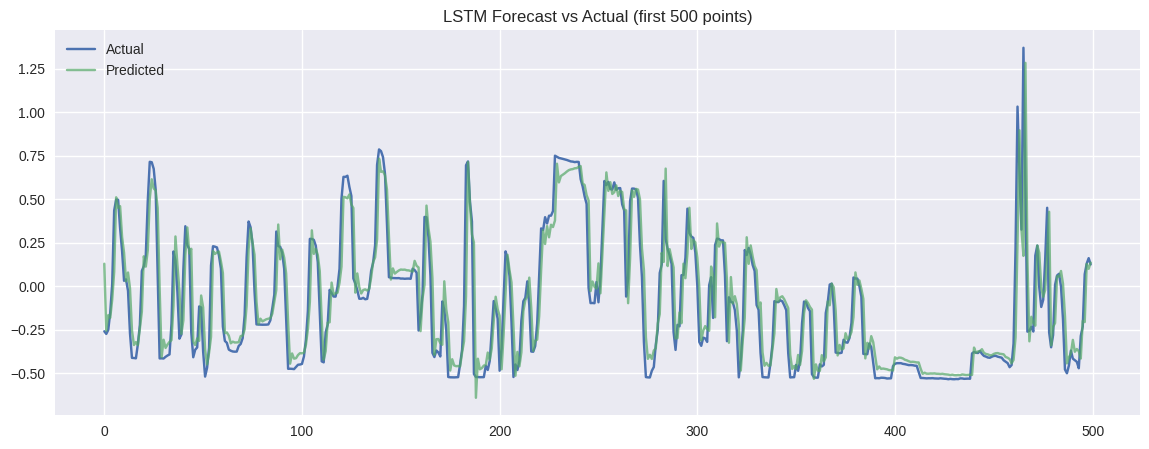


=== PART B: LSTM Autoencoder (multivariate) ===
Data rows/features: 503681 32
Windows shape: (100731, 24, 32)
Train windows: (90658, 24, 32) Val windows: (10073, 24, 32)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 24, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 24, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 24, 32)         │         2,080 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,936 (234.12 KB)

 Trainable params: 59,936 (234.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 52s 263ms/step - loss: 129306.9766 - val_loss: 127886.7891
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 45s 253ms/step - loss: 127160.8516 - val_loss: 126173.1953
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 44s 249ms/step - loss: 125455.1250 - val_loss: 124556.3359
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 44s 245ms/step - loss: 123875.2422 - val_loss: 122996.2422
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 44s 247ms/step - loss: 122305.6328 - val_loss: 121473.6172
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 43s 239ms/step - loss: 120799.4922 - val_loss: 119983.3359
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 44s 245ms/step - loss: 119353.2188 - val_loss: 118519.5000
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 45s 254ms/step - loss: 117942.4688 - val_loss: 117078.9688
Epoch 9/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 45s 252ms/step - loss: 116407.9688 - val_loss: 115659.3906
Epoch 10/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 44s 250ms/step - loss: 115048.7656 - val_loss: 114259.0391


Anomalous windows: 1008 / 100731

Saved LSTM Autoencoder model, metrics and df to lstm_autoencoder_results


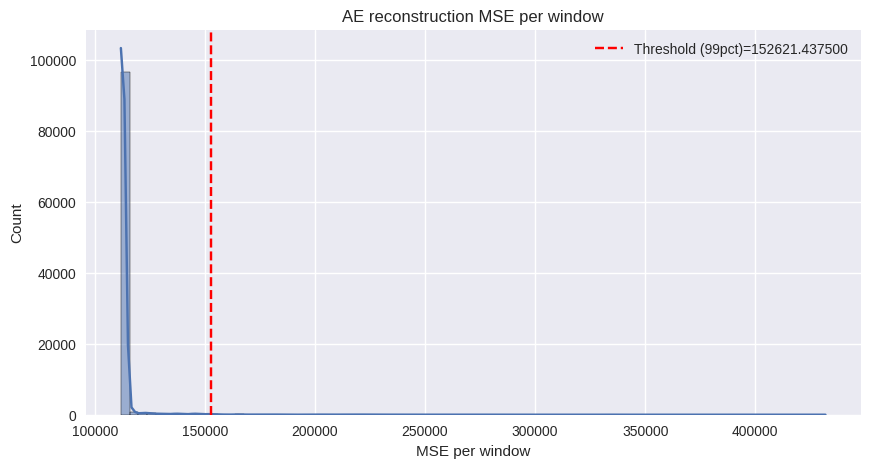


LSTM Forecast metrics (saved):
{
  "Model": "LSTM_Forecast",
  "MAE": 0.1329079121351242,
  "MSE": 0.1266050934791565,
  "RMSE": 0.355816095025445,
  "R2": 0.8734003901481628,
  "MAPE (%)": 179.58338928222656,
  "Accuracy": 0.9740986854775145,
  "F1_Score": 0.2524639009855604,
  "Precision": 0.43736351002580903,
  "Sensitivity_Recall": 0.177446637132501,
  "Specificity": 0.9942312311456523,
  "NPV": 0.9795204594861264,
  "Residual_99pct_threshold": 1.5163227319717407
}

LSTM Autoencoder metrics (saved):
{
  "Model": "LSTM_Autoencoder",
  "MAE": 114064.8203125,
  "MSE": 13152894976.0,
  "RMSE": 114686.07141235592,
  "R2": 0.0,
  "MAPE (%)": 11406482.0,
  "Accuracy": 0.9736400618645532,
  "F1_Score": 0.010876853162482306,
  "Precision": 0.07242063492063493,
  "Sensitivity_Recall": 0.005879983890455094,
  "Specificity": 0.9980967541006298,
  "NPV": 0.9754472589536338,
  "Threshold_99pct": 152621.4375,
  "Anomalous_windows": 1008
}


In [ ]:
# Full corrected LSTM + LSTM Autoencoder implementation
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Input, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os, json, gc

# --------------------------
# CONFIG
# --------------------------
seq_len = 24                # sequence length (hours)
lstm_epochs = 5             # LSTM forecasting epochs
ae_epochs = 10              # Autoencoder epochs
batch_size_lstm = 1024
batch_size_ae = 512
latent_dim = 64
sample_frac = 0.2           # fraction of windows to use for AE (set 1.0 only if plenty RAM)
save_prefix_lstm = "lstm_results"
save_prefix_ae = "lstm_autoencoder_results"

os.makedirs(save_prefix_lstm, exist_ok=True)
os.makedirs(save_prefix_ae, exist_ok=True)

# --------------------------
# ENSURE CLEAN NUMERIC FEATURES (fix object dtype issue)
# We'll build X_fixed from df1 using the columns you listed earlier.
# Replace or extend the columns list as necessary.
# --------------------------
cols = ['gen', 'Dishwasher', 'Home_office', 'Fridge', 'Wine_cellar',
        'Garage_door', 'Barn', 'Well', 'Microwave', 'Living_room',
        'temperature', 'icon', 'humidity', 'visibility', 'summary',
        'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
        'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
        'kitchen', 'Furnace', 'year', 'month', 'day', 'weekday', 'hour',
        'minute', 'second']

# If any column missing from df1, keep only existing
cols = [c for c in cols if c in df1.columns]

X_fixed = df1[cols].copy()

# Encode categorical columns if present
for cat_col in ['icon', 'summary']:
    if cat_col in X_fixed.columns:
        if X_fixed[cat_col].dtype == 'object' or not np.issubdtype(X_fixed[cat_col].dtype, np.number):
            le = LabelEncoder()
            X_fixed[cat_col] = le.fit_transform(X_fixed[cat_col].astype(str))

# Fill NaNs (LSTM/AE expect no NaNs). Choose strategy: forward-fill then median fallback.
X_fixed = X_fixed.fillna(method='ffill').fillna(method='bfill')
X_fixed = X_fixed.fillna(X_fixed.median())

# Convert to float32 to save memory
X_all = X_fixed.astype('float32').values
print("Final numeric matrix shape:", X_all.shape, "dtype:", X_all.dtype)

# Ensure df1['use'] exists and numeric
if 'use' not in df1.columns:
    raise ValueError("df1 must contain 'use' column as target.")
y_all = pd.to_numeric(df1['use'], errors='coerce').fillna(method='ffill').fillna(method='bfill').astype('float32').values

# --------------------------
# PART A: LSTM Forecasting (univariate on 'use')
# --------------------------
print("\n=== PART A: LSTM Forecasting (univariate) ===")
data = y_all  # using 'use' only for LSTM forecasting
n_samples = len(data)

# Build sliding windows for forecasting
X_lstm = np.array([data[i:i+seq_len] for i in range(n_samples - seq_len)], dtype='float32')
y_lstm = data[seq_len:].astype('float32')
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))
print("X_lstm shape:", X_lstm.shape, "y_lstm shape:", y_lstm.shape)

# Define simple LSTM regressor
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_len, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

# Train (use EarlyStopping for safety)
es_lstm = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lstm_model.fit(X_lstm, y_lstm, epochs=lstm_epochs, batch_size=batch_size_lstm,
               validation_split=0.1, callbacks=[es_lstm], verbose=1)

# Predict
y_pred_lstm = lstm_model.predict(X_lstm, batch_size=1024).flatten()

# Regression metrics
mae_lstm = mean_absolute_error(y_lstm, y_pred_lstm)
mse_lstm = mean_squared_error(y_lstm, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_lstm, y_pred_lstm)
mape_lstm = np.mean(np.abs((y_lstm - y_pred_lstm) / (y_lstm + 1e-8))) * 100

# Create a threshold-based anomaly mapping for the forecast residuals
residuals_lstm = np.abs(y_lstm - y_pred_lstm)
thr_lstm = np.percentile(residuals_lstm, 99)  # top 1% residuals as anomalies (you can tune)
anomaly_flags_lstm = (residuals_lstm >= thr_lstm).astype(int)

# Map anomaly_flags_lstm back to df1 rows by placing flag at prediction index + seq_len
anomaly_series_lstm = np.zeros(n_samples, dtype=int)  # same length as original series
anomaly_series_lstm[seq_len:seq_len + len(anomaly_flags_lstm)] = anomaly_flags_lstm
df1['anomaly_LSTM_forecast'] = anomaly_series_lstm

# For classification metrics we need true anomaly labels; create synthetic if missing
if 'true_anomaly' not in df1.columns:
    thr_true = 3 * df1['use'].std()
    mean_use = df1['use'].mean()
    df1['true_anomaly'] = (((df1['use'] > mean_use + thr_true) | (df1['use'] < mean_use - thr_true))).astype(int)
    print("Synthetic 'true_anomaly' created with ±3σ rule:", df1['true_anomaly'].sum(), "labels")

# Compute classification metrics for LSTM forecasting anomalies vs true_anomaly
y_true_cls = df1['true_anomaly'].values
y_pred_cls = df1['anomaly_LSTM_forecast'].values

# safe confusion handling
cm = confusion_matrix(y_true_cls, y_pred_cls)
if cm.size == 1:
    TN = cm[0,0]; FP = FN = TP = 0
else:
    TN, FP, FN, TP = cm.ravel()

accuracy_lstm_cls = accuracy_score(y_true_cls, y_pred_cls)
f1_lstm_cls = f1_score(y_true_cls, y_pred_cls, zero_division=0)
precision_lstm_cls = precision_score(y_true_cls, y_pred_cls, zero_division=0)
recall_lstm_cls = recall_score(y_true_cls, y_pred_cls, zero_division=0)
specificity_lstm_cls = TN / (TN + FP) if (TN + FP) else 0
npv_lstm_cls = TN / (TN + FN) if (TN + FN) else 0

metrics_lstm = {
    "Model": "LSTM_Forecast",
    "MAE": float(mae_lstm),
    "MSE": float(mse_lstm),
    "RMSE": float(rmse_lstm),
    "R2": float(r2_lstm),
    "MAPE (%)": float(mape_lstm),
    "Accuracy": float(accuracy_lstm_cls),
    "F1_Score": float(f1_lstm_cls),
    "Precision": float(precision_lstm_cls),
    "Sensitivity_Recall": float(recall_lstm_cls),
    "Specificity": float(specificity_lstm_cls),
    "NPV": float(npv_lstm_cls),
    "Residual_99pct_threshold": float(thr_lstm)
}

# Save LSTM model & metrics
lstm_model.save(os.path.join(save_prefix_lstm, "lstm_model.h5"))
with open(os.path.join(save_prefix_lstm, "lstm_metrics.json"), "w") as f:
    json.dump(metrics_lstm, f, indent=4)
print("\nSaved LSTM model and metrics to", save_prefix_lstm)

# Quick plot: first 500 points of predicted vs actual (aligned)
plt.figure(figsize=(14,5))
plot_n = min(500, len(y_lstm))
plt.plot(y_lstm[:plot_n], label='Actual')
plt.plot(y_pred_lstm[:plot_n], label='Predicted', alpha=0.7)
plt.title("LSTM Forecast vs Actual (first {} points)".format(plot_n))
plt.legend()
plt.show()

gc.collect()

# --------------------------
# PART B: LSTM Autoencoder (multivariate reconstruction)
# --------------------------
print("\n=== PART B: LSTM Autoencoder (multivariate) ===")
n_rows, n_features = X_all.shape
print("Data rows/features:", n_rows, n_features)

# Build window start indices (optionally subsample to save RAM)
if sample_frac < 1.0:
    n_windows = max(1000, int((n_rows - seq_len) * sample_frac))
    rng = np.random.default_rng(42)
    start_idx = rng.choice(np.arange(0, n_rows - seq_len), size=n_windows, replace=False)
    start_idx = np.sort(start_idx)
else:
    start_idx = np.arange(0, n_rows - seq_len)

# Build windows array (shape = n_windows x seq_len x n_features)
windows = np.array([X_all[i:i+seq_len] for i in start_idx], dtype='float32')
print("Windows shape:", windows.shape)

# Train/val split
val_split = 0.1
val_count = int(len(windows) * val_split)
if val_count > 0:
    X_train = windows[:-val_count]
    X_val = windows[-val_count:]
else:
    X_train = windows
    X_val = np.empty((0, seq_len, n_features))

print("Train windows:", X_train.shape, "Val windows:", X_val.shape)

# Build BiLSTM-based autoencoder (you can switch encoder/decoder sizes as needed)
inputs = Input(shape=(seq_len, n_features))
encoded = LSTM(latent_dim, activation='tanh', return_sequences=False)(inputs)
rep = RepeatVector(seq_len)(encoded)
decoded = LSTM(latent_dim, activation='tanh', return_sequences=True)(rep)
outputs = TimeDistributed(Dense(n_features))(decoded)

ae_model = Model(inputs, outputs)
ae_model.compile(optimizer='adam', loss='mse')
ae_model.summary()

# Train with early stopping
es_ae = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
ae_model.fit(X_train, X_train, epochs=ae_epochs, batch_size=batch_size_ae,
             validation_data=(X_val, X_val) if X_val.size else None,
             callbacks=[es_ae], verbose=1)

# Predict reconstruction on all windows (in batches to save memory)
def predict_in_batches(model, arr, batch=512):
    preds = []
    for i in range(0, arr.shape[0], batch):
        preds.append(model.predict(arr[i:i+batch], verbose=0))
    return np.vstack(preds)

recon = predict_in_batches(ae_model, windows, batch=256)
mse_per_window = np.mean(np.square(windows - recon), axis=(1,2))
threshold_ae = np.percentile(mse_per_window, 99)  # top 1% windows considered anomalies
anomaly_window_flags = (mse_per_window > threshold_ae).astype(int)
print("Anomalous windows:", int(anomaly_window_flags.sum()), "/", len(anomaly_window_flags))

# Map window flags back to row-level flags (center of each window)
row_flags = np.zeros(n_rows, dtype=int)
center_offset = seq_len // 2
for idx_win, flag in zip(start_idx, anomaly_window_flags):
    if flag:
        center_idx = idx_win + center_offset
        if center_idx < n_rows:
            row_flags[center_idx] = 1

# Put into df1 (align lengths: df1 rows == n_rows)
df1['anomaly_LSTM_AE'] = row_flags

# Classification metrics vs true_anomaly
y_true_cls_ae = df1['true_anomaly'].values
y_pred_cls_ae = df1['anomaly_LSTM_AE'].values

cm_ae = confusion_matrix(y_true_cls_ae, y_pred_cls_ae)
if cm_ae.size == 1:
    TN = cm_ae[0,0]; FP = FN = TP = 0
else:
    TN, FP, FN, TP = cm_ae.ravel()

accuracy_ae = accuracy_score(y_true_cls_ae, y_pred_cls_ae)
f1_ae = f1_score(y_true_cls_ae, y_pred_cls_ae, zero_division=0)
precision_ae = precision_score(y_true_cls_ae, y_pred_cls_ae, zero_division=0)
recall_ae = recall_score(y_true_cls_ae, y_pred_cls_ae, zero_division=0)
specificity_ae = TN / (TN + FP) if (TN + FP) else 0
npv_ae = TN / (TN + FN) if (TN + FN) else 0

# Regression-like metrics on reconstruction errors (useful diagnostics)
y_true_reg = np.zeros_like(mse_per_window)  # target = zero reconstruction for normal baseline
y_pred_reg = mse_per_window
mae_ae = mean_absolute_error(y_true_reg, y_pred_reg)
mse_ae = mean_squared_error(y_true_reg, y_pred_reg)
rmse_ae = np.sqrt(mse_ae)
# r2 on zero-targets is not meaningful; set to NaN or compute against small baseline
try:
    r2_ae = r2_score(y_true_reg, y_pred_reg)
except Exception:
    r2_ae = float('nan')
mape_ae = np.mean(np.abs(y_pred_reg)) * 100

metrics_ae = {
    "Model": "LSTM_Autoencoder",
    "MAE": float(mae_ae),
    "MSE": float(mse_ae),
    "RMSE": float(rmse_ae),
    "R2": float(r2_ae),
    "MAPE (%)": float(mape_ae),
    "Accuracy": float(accuracy_ae),
    "F1_Score": float(f1_ae),
    "Precision": float(precision_ae),
    "Sensitivity_Recall": float(recall_ae),
    "Specificity": float(specificity_ae),
    "NPV": float(npv_ae),
    "Threshold_99pct": float(threshold_ae),
    "Anomalous_windows": int(anomaly_window_flags.sum())
}

# Save AE model, metrics and df
ae_model.save(os.path.join(save_prefix_ae, "lstm_autoencoder_model.h5"))
with open(os.path.join(save_prefix_ae, "lstm_autoencoder_metrics.json"), "w") as f:
    json.dump(metrics_ae, f, indent=4)
df1.to_csv(os.path.join(save_prefix_ae, "df1_with_lstm_ae_flags.csv"), index=False)

print("\nSaved LSTM Autoencoder model, metrics and df to", save_prefix_ae)

# Visualizations
plt.figure(figsize=(10,5))
sns.histplot(mse_per_window, bins=80, kde=True)
plt.axvline(threshold_ae, color='red', linestyle='--', label=f'Threshold (99pct)={threshold_ae:.6f}')
plt.title("AE reconstruction MSE per window")
plt.xlabel("MSE per window")
plt.legend()
plt.show()

# Plot anomalies over first month (if datetime exists)
if 'datetime' in df1.columns:
    df1['datetime'] = pd.to_datetime(df1['datetime'])
    first_month = df1[df1['datetime'] <= (df1['datetime'].min() + pd.Timedelta(days=30))]
    if not first_month.empty:
        plt.figure(figsize=(14,5))
        plt.plot(first_month['datetime'], first_month['use'], label='Usage')
        plt.scatter(first_month.loc[first_month['anomaly_LSTM_AE']==1, 'datetime'],
                    first_month.loc[first_month['anomaly_LSTM_AE']==1, 'use'],
                    color='red', label='Anomaly', s=20)
        plt.title("LSTM-AE Anomalies (first month)")
        plt.xlabel("Datetime")
        plt.ylabel("use")
        plt.legend()
        plt.show()

# Print summary metrics
print("\nLSTM Forecast metrics (saved):")
print(json.dumps(metrics_lstm, indent=2))
print("\nLSTM Autoencoder metrics (saved):")
print(json.dumps(metrics_ae, indent=2))